In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_excel("./附件2 慢性病及相关因素流调数据.xlsx")
data
c_list = data.values.tolist()[0]  # 得到想要设置为列索引【表头】的某一行提取出来
data.columns = c_list  		    # 设置列索引【表头】
data.drop([0], inplace=True)

In [20]:
data

,ID,出生年,性别,民族,NaN,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,...,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸
1,10001,1983,2,1,NaN,4,1,9,3,NaN,...,92,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4
2,10002,1994,2,1,NaN,3,1,13,3,NaN,...,88,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6
3,10003,1976,1,1,NaN,4,2,4,1,16,...,95,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2
4,10004,1984,1,1,NaN,5,2,12,3,NaN,...,106,126,82,72,5.2,4.68,0.92,3.6,1.84,327.9
5,10005,1968,1,1,NaN,4,2,9,1,20,...,97,106,70,70,5.1,4.41,1.37,3.15,1.87,350.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,NaN,1974,2,1,NaN,4,2,10,3,NaN,...,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9
7963,NaN,1945,2,1,NaN,2,2,10,3,NaN,...,99,148,60,81,5.74,5.2,1.24,3.91,0.83,209.8
7964,NaN,1980,1,1,NaN,3,2,9,1,17,...,92,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9
7965,NaN,1965,2,1,NaN,3,2,10,3,NaN,...,92,108,68,64,4.4,4.54,1.33,2.69,0.64,230.2


In [21]:
data.columns = data.columns.str.replace(" ","")
data_filled = data.fillna(0)
data_filled["出生年"] = data_filled["出生年"].apply(lambda x:2023-x)
data_filled

,ID,出生年,性别,民族,NaN,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,...,臀围,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸
1,10001,40,2,1,0,4,1,9,3,0,...,92.0,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4
2,10002,29,2,1,0,3,1,13,3,0,...,88.0,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6
3,10003,47,1,1,0,4,2,4,1,16,...,95.0,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2
4,10004,39,1,1,0,5,2,12,3,0,...,106.0,126,82,72,5.20,4.68,0.92,3.60,1.84,327.9
5,10005,55,1,1,0,4,2,9,1,20,...,97.0,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,0,49,2,1,0,4,2,10,3,0,...,90.5,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9
7963,0,78,2,1,0,2,2,10,3,0,...,99.0,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8
7964,0,43,1,1,0,3,2,9,1,17,...,92.0,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9
7965,0,58,2,1,0,3,2,10,3,0,...,92.0,108,68,64,4.40,4.54,1.33,2.69,0.64,230.2


In [22]:
bins = [18,30,40,50,60,np.inf]
labels = ["18-30","31-40","41-50","51-60","61+"]


In [23]:
data_filled["age_group"] = pd.cut(data_filled["出生年"],bins = bins,labels=labels)
data_filled

,ID,出生年,性别,民族,NaN,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,...,收缩压,舒张压,脉搏,胆固醇,血糖,高密度脂蛋白,低密度脂蛋白,甘油三酯,尿酸,age_group
1,10001,40,2,1,0,4,1,9,3,0,...,98,62,70,3.79,4.61,1.59,1.88,0.91,210.4,31-40
2,10002,29,2,1,0,3,1,13,3,0,...,104,70,80,4.24,4.59,1.59,2.17,0.81,270.6,18-30
3,10003,47,1,1,0,4,2,4,1,16,...,104,70,80,4.84,4.13,1.33,2.92,1.59,298.2,41-50
4,10004,39,1,1,0,5,2,12,3,0,...,126,82,72,5.20,4.68,0.92,3.60,1.84,327.9,31-40
5,10005,55,1,1,0,4,2,9,1,20,...,106,70,70,5.10,4.41,1.37,3.15,1.87,350.9,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,0,49,2,1,0,4,2,10,3,0,...,90,60,72,4.48,4.61,1.35,2.77,0.56,214.9,41-50
7963,0,78,2,1,0,2,2,10,3,0,...,148,60,81,5.74,5.20,1.24,3.91,0.83,209.8,61+
7964,0,43,1,1,0,3,2,9,1,17,...,98,60,72,3.92,4.55,0.93,2.46,1.62,227.9,41-50
7965,0,58,2,1,0,3,2,10,3,0,...,108,68,64,4.40,4.54,1.33,2.69,0.64,230.2,51-60


In [27]:
##定义生活习惯，饮食习惯，人口统计因素的列
lifestyles = ["是否吸烟","开始吸烟年龄","平均每周吸烟天数","一天吸烟支数","是否饮酒","饮酒年数"
             ,"是否饮用高度白酒","是否饮用低度白酒","是否饮用啤酒",
              "是否饮用黄酒、糯米酒","是否饮用葡萄酒","不吃早餐","在家吃早餐","不吃中餐","不吃晚餐"]
foodstyles = ["是否吃大米","食用大米的频率","是否吃小麦面粉","食用小麦面粉的频率","是否吃杂粮","食用杂粮的频率"
             ,"是否吃薯类","食用薯类的频率","是否吃油炸面食","食用油炸面食的频率","是否吃猪肉","食用猪肉的频率","是否吃牛羊肉",
              "食用牛羊肉的频率","是否吃鲜奶","食用鲜奶的频率"]
demo = ["age_group","性别","婚姻状况","文化程度","职业"]



In [28]:
chi2_result_lifestyles = pd.DataFrame(columns = ["variable1","variable2","chi2","p-value"])##初始化一个dataframe来储存
chi2_result_foodstyles = pd.DataFrame(columns = ["variable1","variable2","chi2","p-value"])##初始化一个dataframe来储存

In [29]:
contingency_table = pd.crosstab(data_filled["是否吸烟"],data_filled["性别"])
chi2,p,_,_ = chi2_contingency(contingency_table)
chi2_result_lifestyles = chi2_result_lifestyles.append({"variable1":col1,"variable2":col2,"chi2":chi2,"p-value":p},ignore_index = True)

NameError: name 'col1' is not defined

In [17]:
chi2_result_lifestyles

,variable1,variable2,chi2,p-value


In [30]:
##进行卡方检验
for col1 in lifestyles:
    for col2 in demo:
        contingency_table = pd.crosstab(data_filled[col1],data_filled[col2])
        chi2,p,_,_ = chi2_contingency(contingency_table)
        chi2_result_lifestyles = chi2_result_lifestyles.append({"variable1":col1,"variable2":col2,"chi2":chi2,"p-value":p},ignore_index = True)

In [31]:
chi2_result_lifestyles

,variable1,variable2,chi2,p-value
0,是否吸烟,age_group,482.716681,1.053387e-95
1,是否吸烟,性别,10522.504657,0.000000e+00
2,是否吸烟,婚姻状况,7807.463376,0.000000e+00
3,是否吸烟,文化程度,7884.766154,0.000000e+00
4,是否吸烟,职业,8563.353745,0.000000e+00
...,...,...,...,...
70,不吃晚餐,age_group,48.480548,9.507404e-03
71,不吃晚餐,性别,5.881435,9.693919e-01
72,不吃晚餐,婚姻状况,45.703915,1.063594e-01
73,不吃晚餐,文化程度,35.605177,7.462966e-01


In [32]:
##进行卡方检验
for col1 in foodstyles:
    for col2 in demo:
        contingency_table = pd.crosstab(data_filled[col1],data_filled[col2])
        chi2,p,_,_ = chi2_contingency(contingency_table)
        chi2_result_foodstyles = chi2_result_foodstyles.append({"variable1":col1,"variable2":col2,"chi2":chi2,"p-value":p},ignore_index = True)

In [33]:
chi2_result_foodstyles 

,variable1,variable2,chi2,p-value
0,是否吃大米,age_group,399.181836,2.802727e-81
1,是否吃大米,性别,7725.476712,0.000000e+00
2,是否吃大米,婚姻状况,7664.576792,0.000000e+00
3,是否吃大米,文化程度,7728.321937,0.000000e+00
4,是否吃大米,职业,7675.539445,0.000000e+00
...,...,...,...,...
75,食用鲜奶的频率,age_group,127.095412,5.192998e-16
76,食用鲜奶的频率,性别,56.152046,1.123870e-07
77,食用鲜奶的频率,婚姻状况,81.190084,1.330393e-06
78,食用鲜奶的频率,文化程度,141.429981,1.979140e-14


In [34]:
subset_lifestyle = chi2_result_lifestyles[chi2_result_lifestyles["p-value"]<0.05].sort_values(by="chi2",ascending = False)
subset_lifestyle["p-value"] = subset_lifestyle["p-value"].apply(lambda x:round(x,3))
subset_lifestyle

,variable1,variable2,chi2,p-value
1,是否吸烟,性别,10522.504657,0.000
21,是否饮酒,性别,9365.965796,0.000
4,是否吸烟,职业,8563.353745,0.000
24,是否饮酒,职业,8376.065873,0.000
23,是否饮酒,文化程度,7965.405429,0.000
...,...,...,...,...
47,是否饮用黄酒、糯米酒,婚姻状况,60.085570,0.000
52,是否饮用葡萄酒,婚姻状况,57.936622,0.000
67,不吃中餐,婚姻状况,55.094961,0.017
70,不吃晚餐,age_group,48.480548,0.010


In [35]:
subset_foodstyle = chi2_result_foodstyles[chi2_result_foodstyles["p-value"]<0.05].sort_values(by="chi2",ascending = False)
subset_foodstyle["p-value"] = subset_foodstyle["p-value"].apply(lambda x:round(x,3))
subset_foodstyle

,variable1,variable2,chi2,p-value
63,是否吃牛羊肉,文化程度,7959.189088,0.000
43,是否吃油炸面食,文化程度,7931.919173,0.000
73,是否吃鲜奶,文化程度,7917.375723,0.000
44,是否吃油炸面食,职业,7883.378192,0.000
41,是否吃油炸面食,性别,7870.550541,0.000
...,...,...,...,...
49,食用油炸面食的频率,职业,40.885896,0.032
25,食用杂粮的频率,age_group,38.313914,0.001
16,食用小麦面粉的频率,性别,33.038663,0.000
26,食用杂粮的频率,性别,26.795995,0.001


In [36]:
subset_foodstyle.to_excel("./选取的和饮食有关的指标.xlsx",index = False)

In [37]:
subset_lifestyle.to_excel(".选取的和生活习惯有关的指标.xlsx",index = False)

In [38]:
n_subplots = len(subset_foodstyle["variable1"].unique())

<Figure size 2000x1200 with 0 Axes>

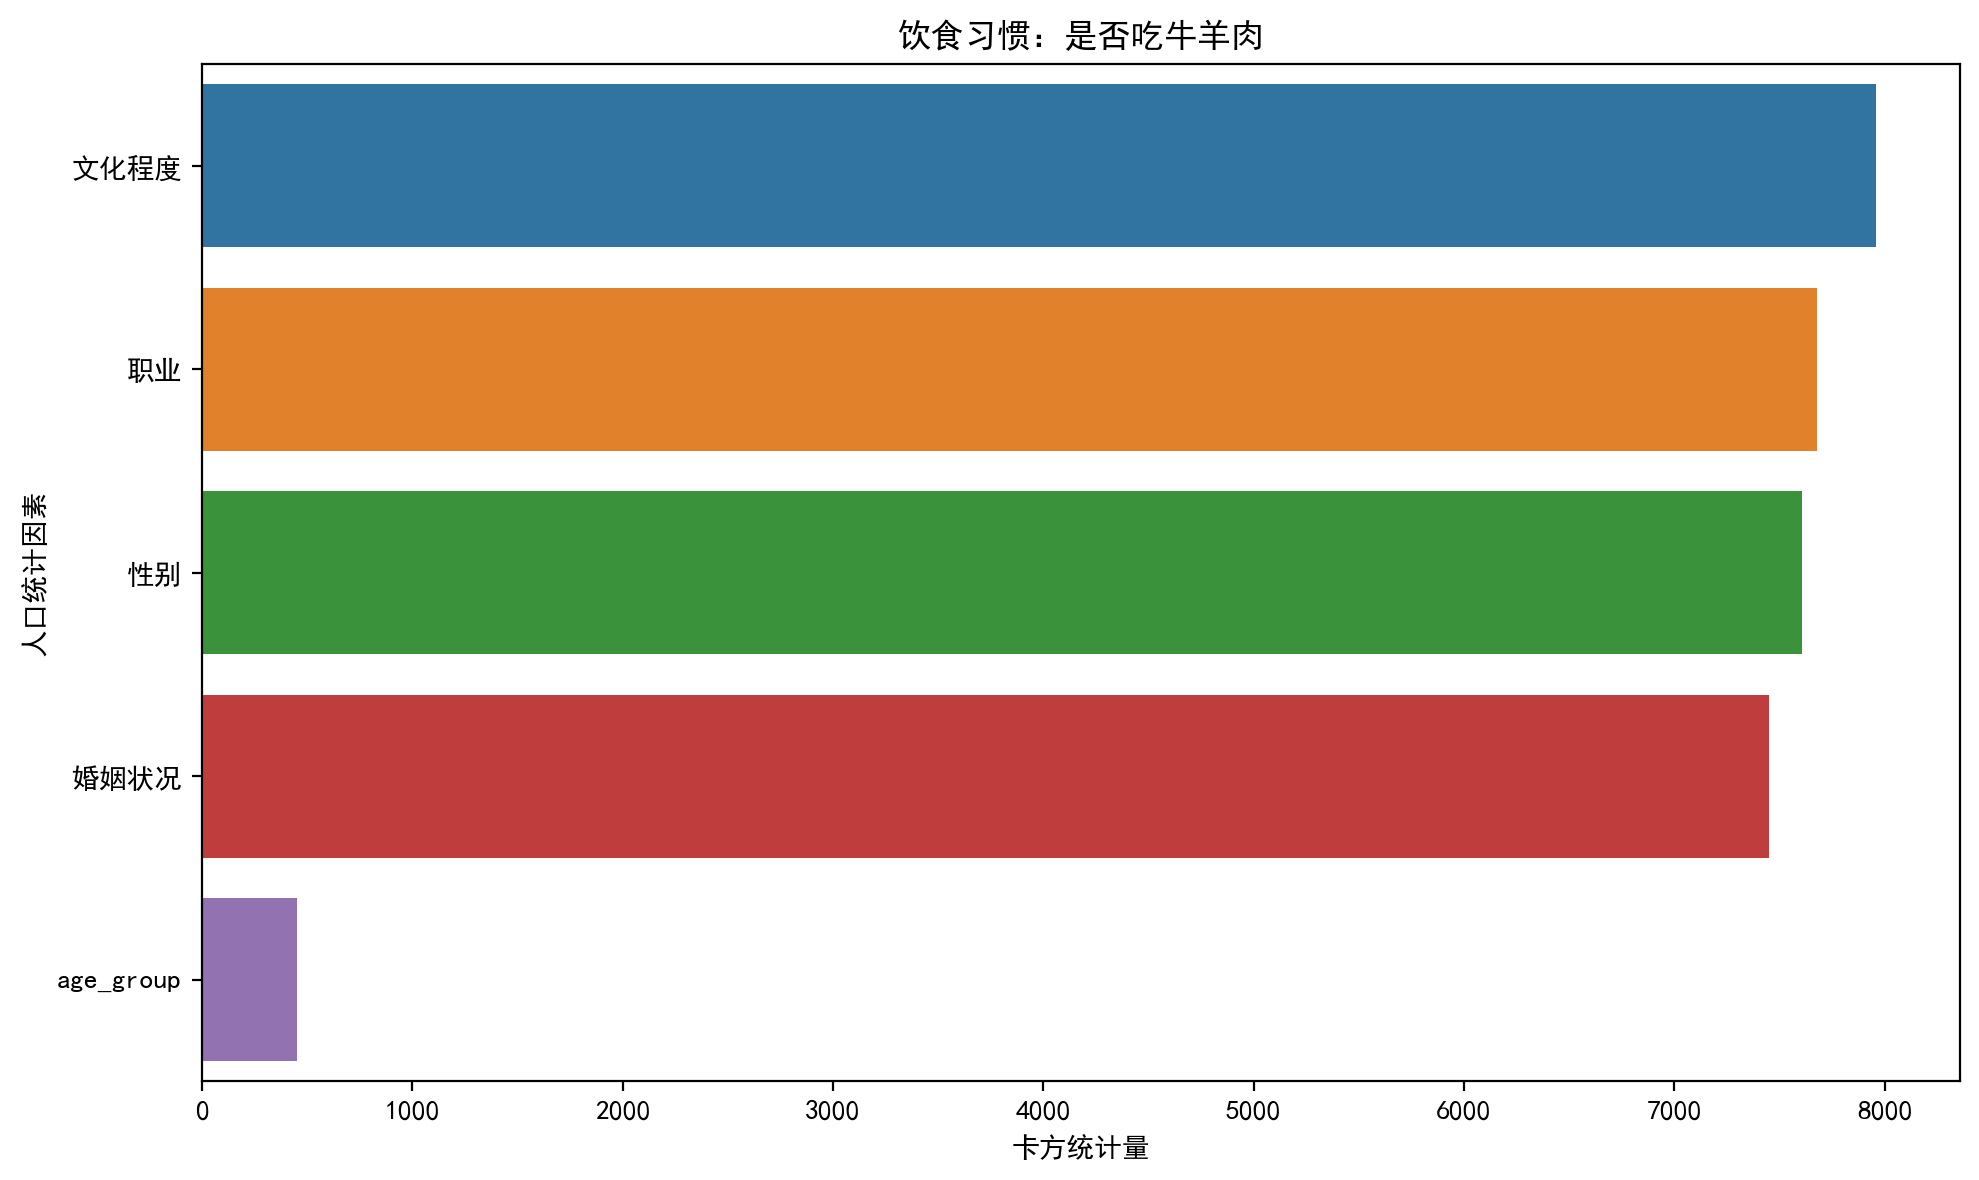

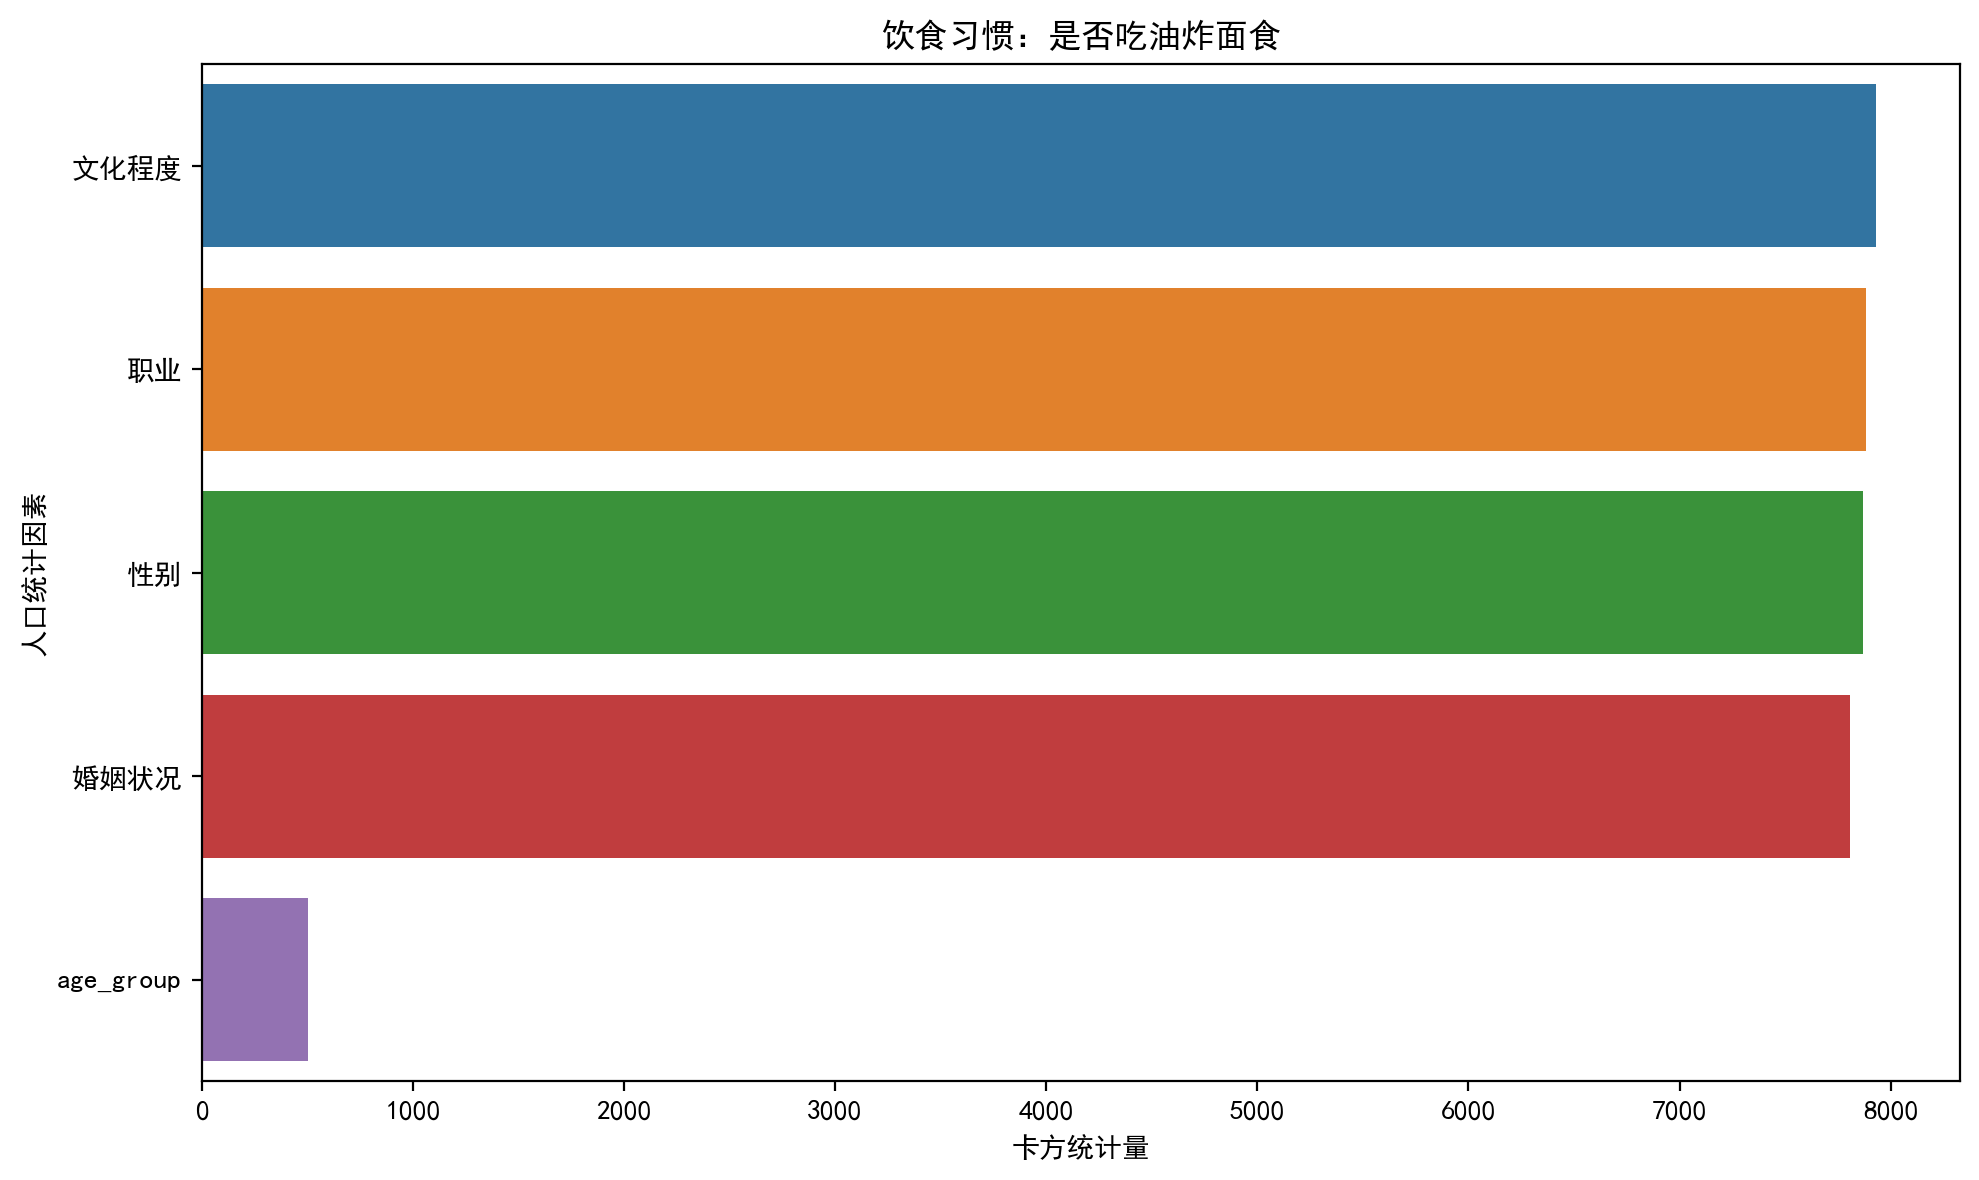

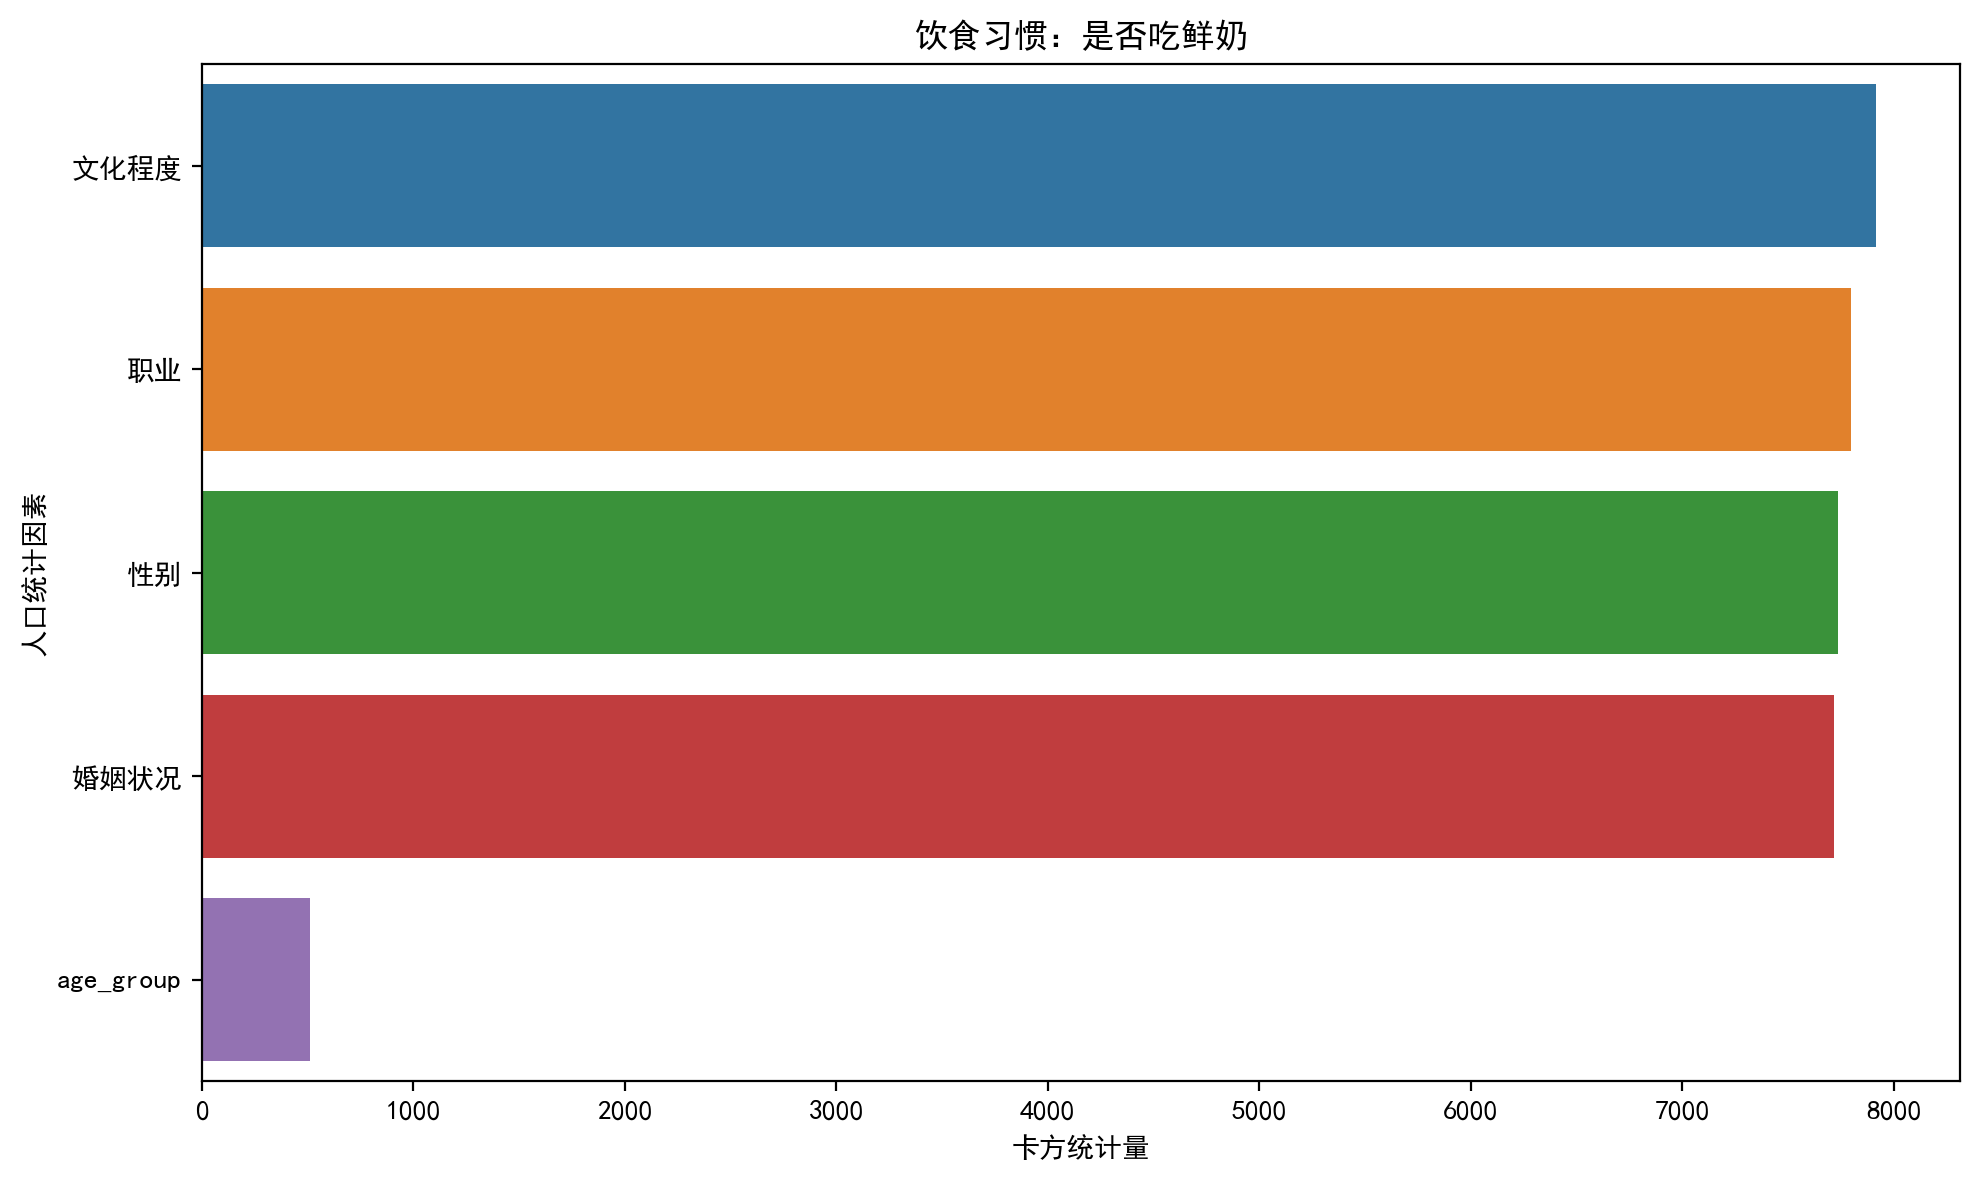

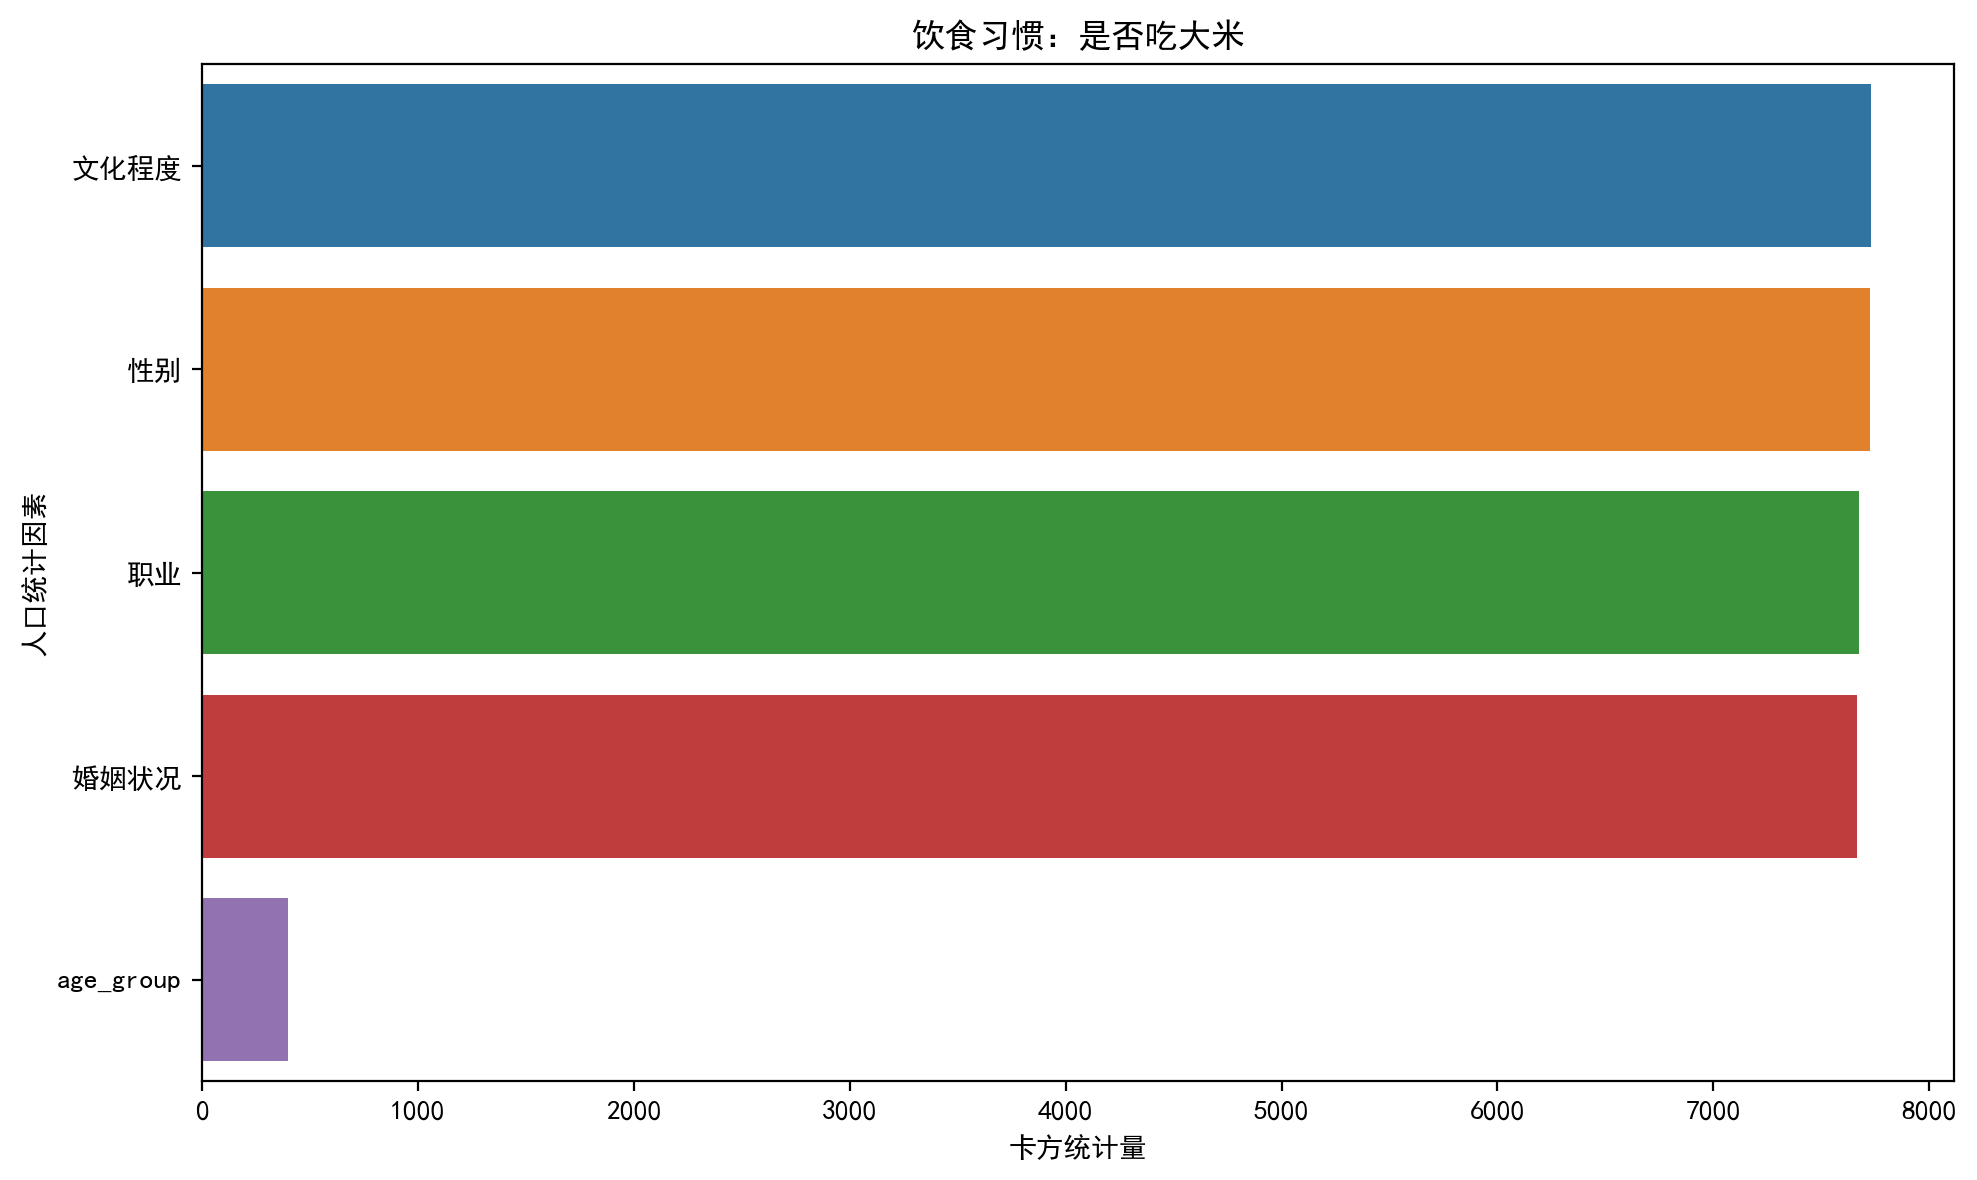

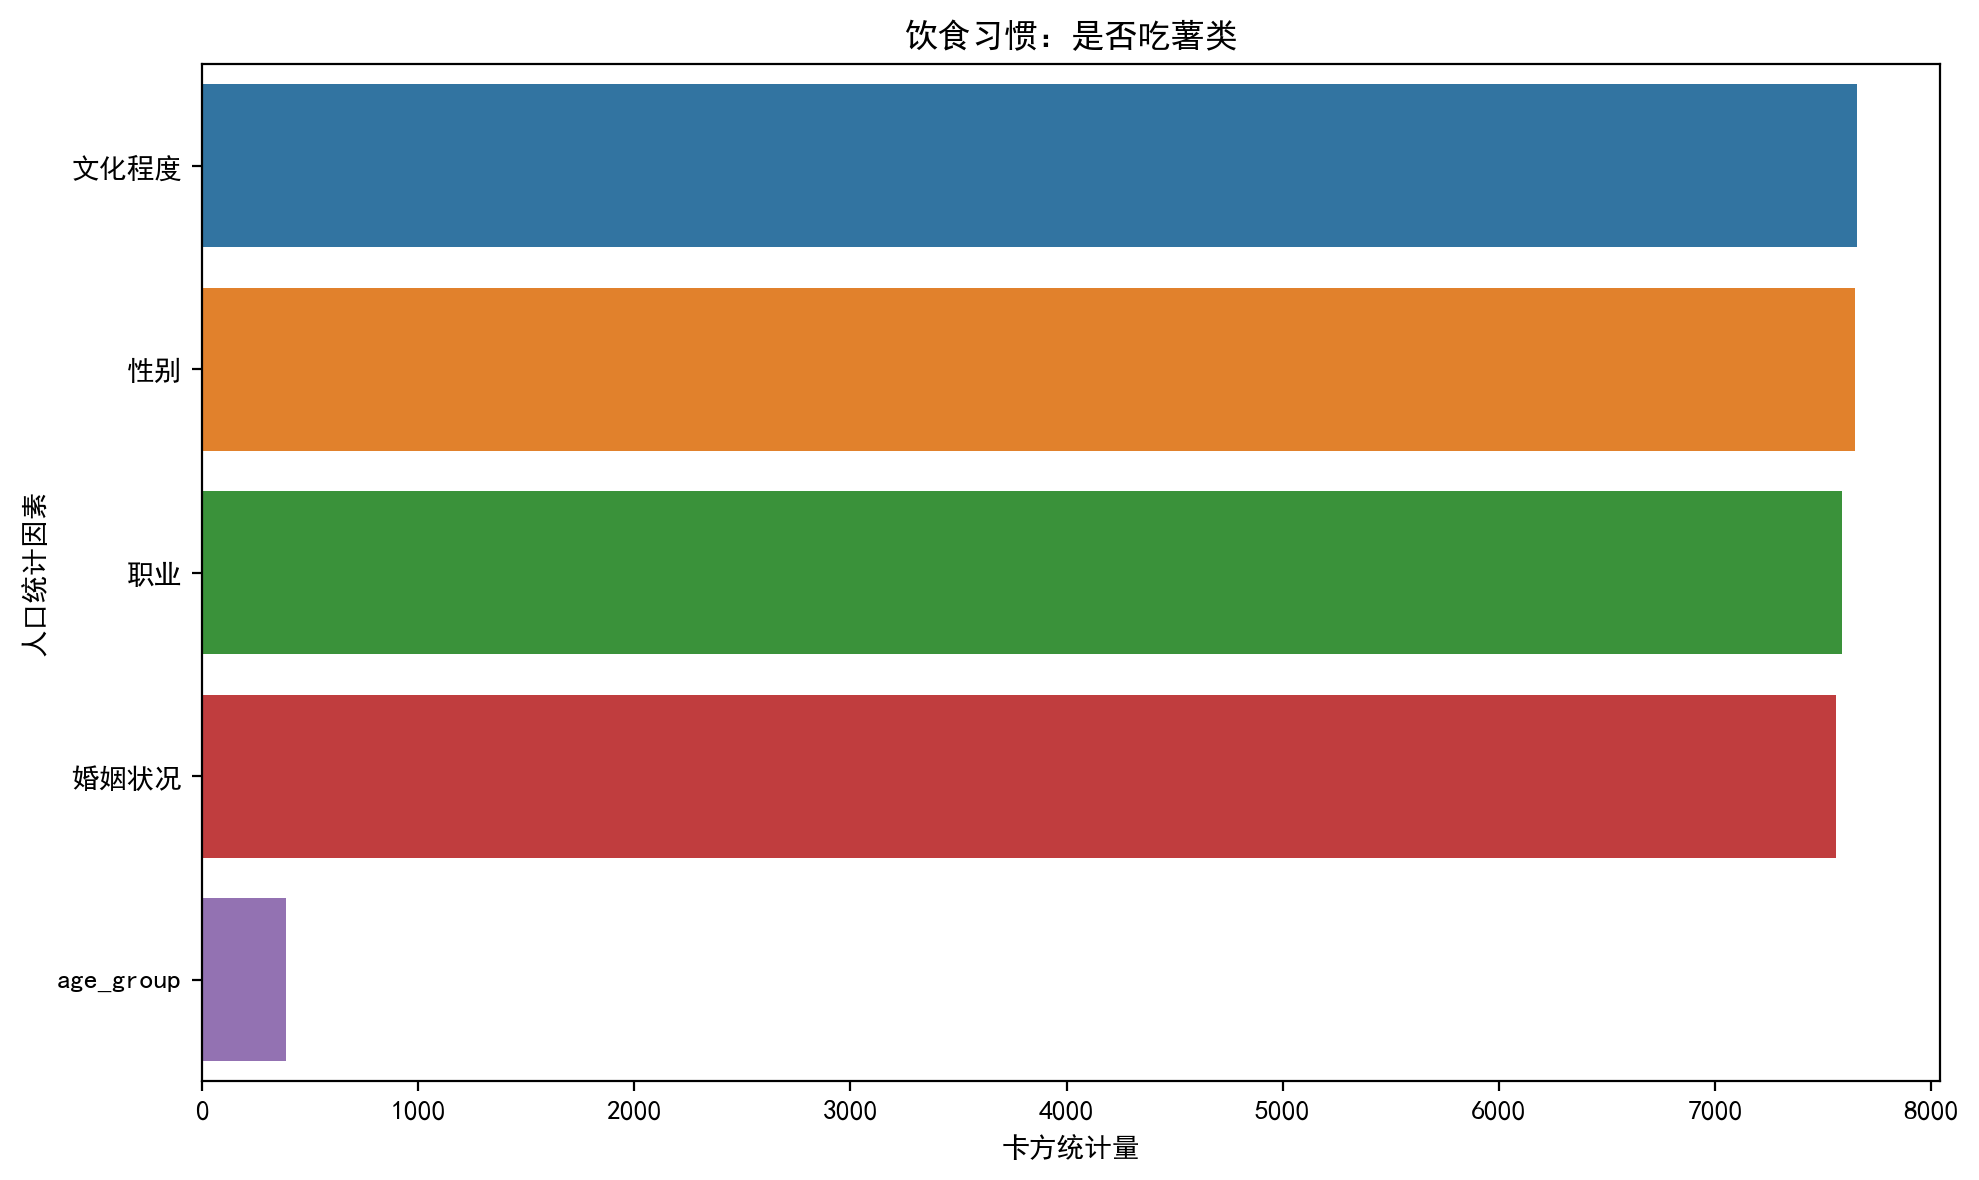

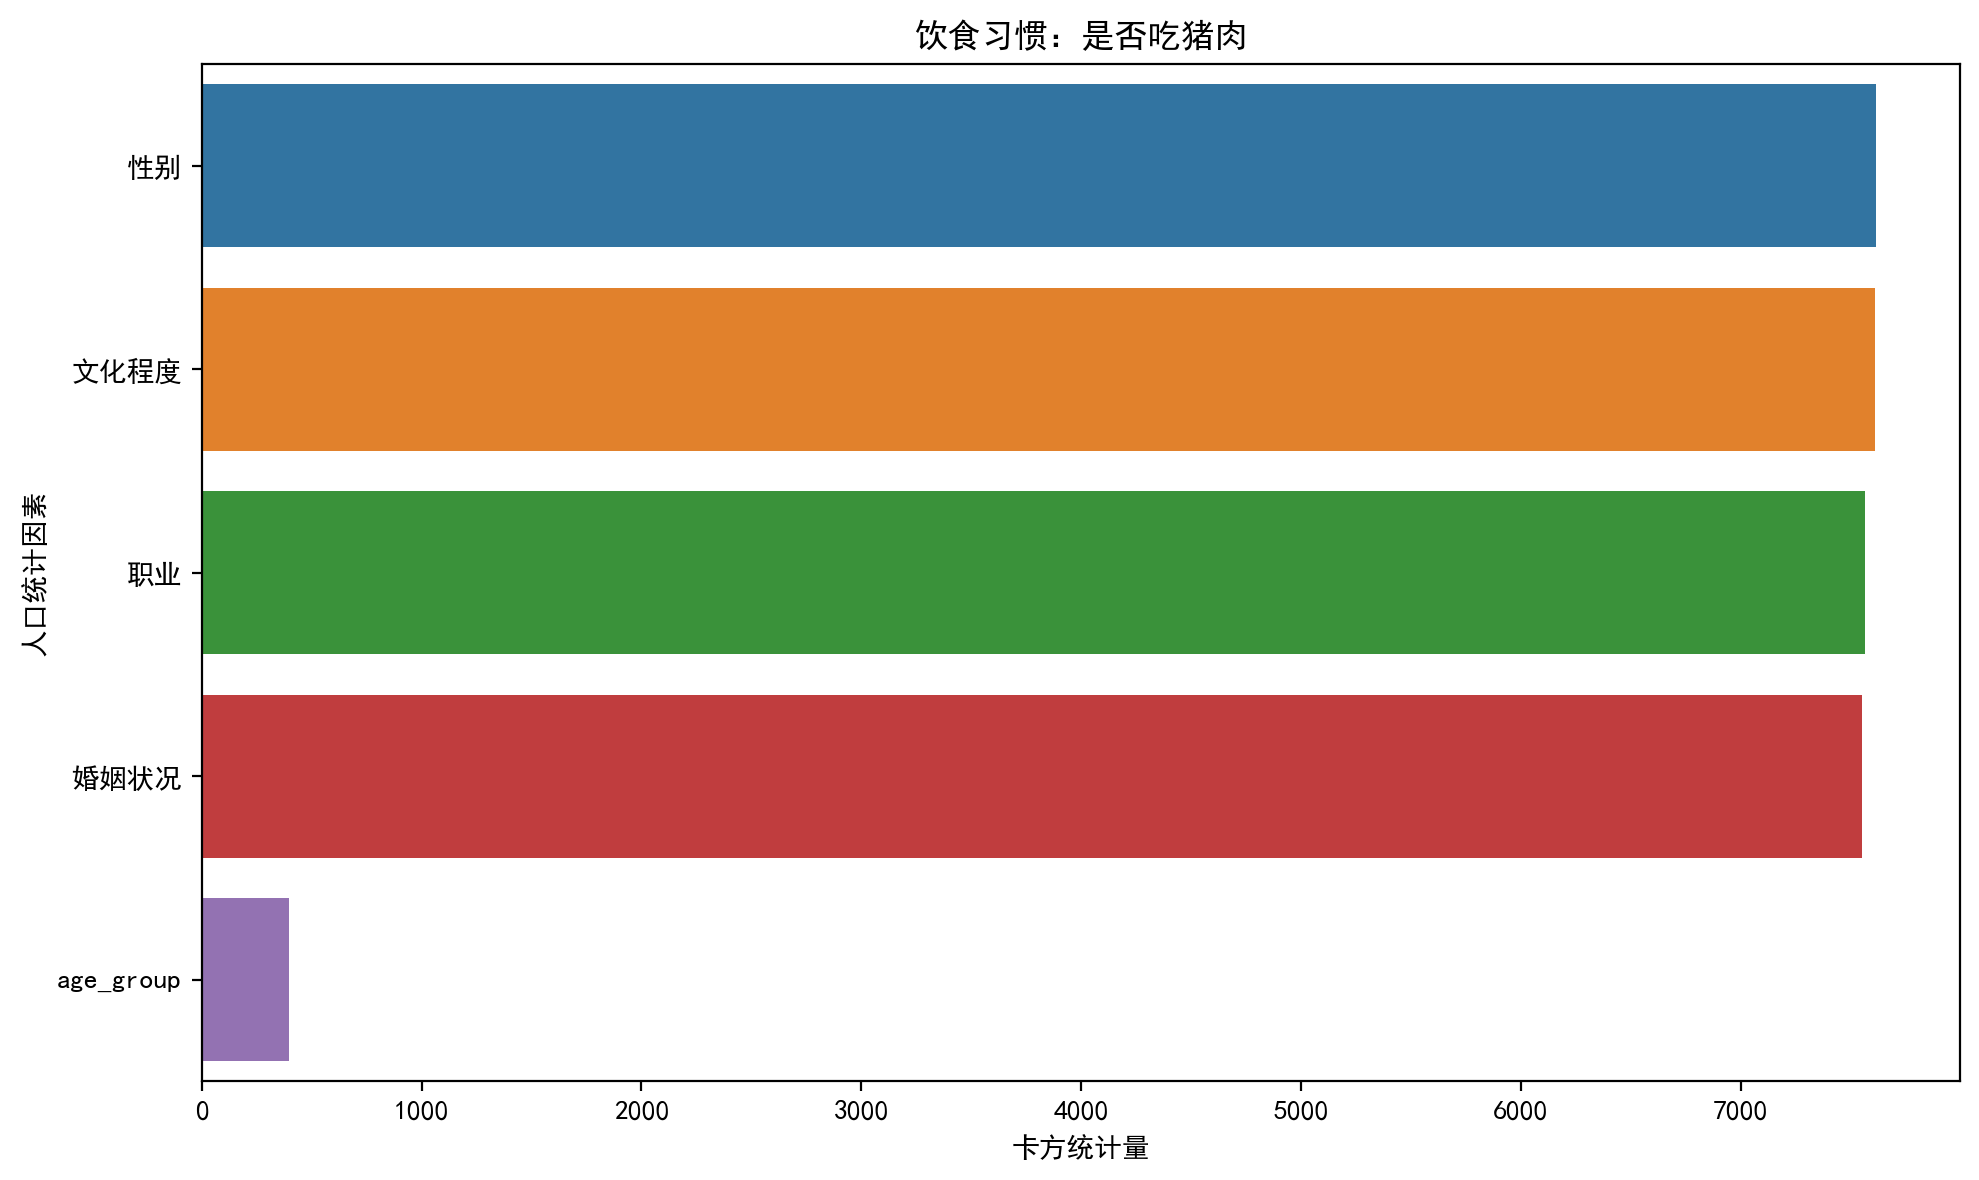

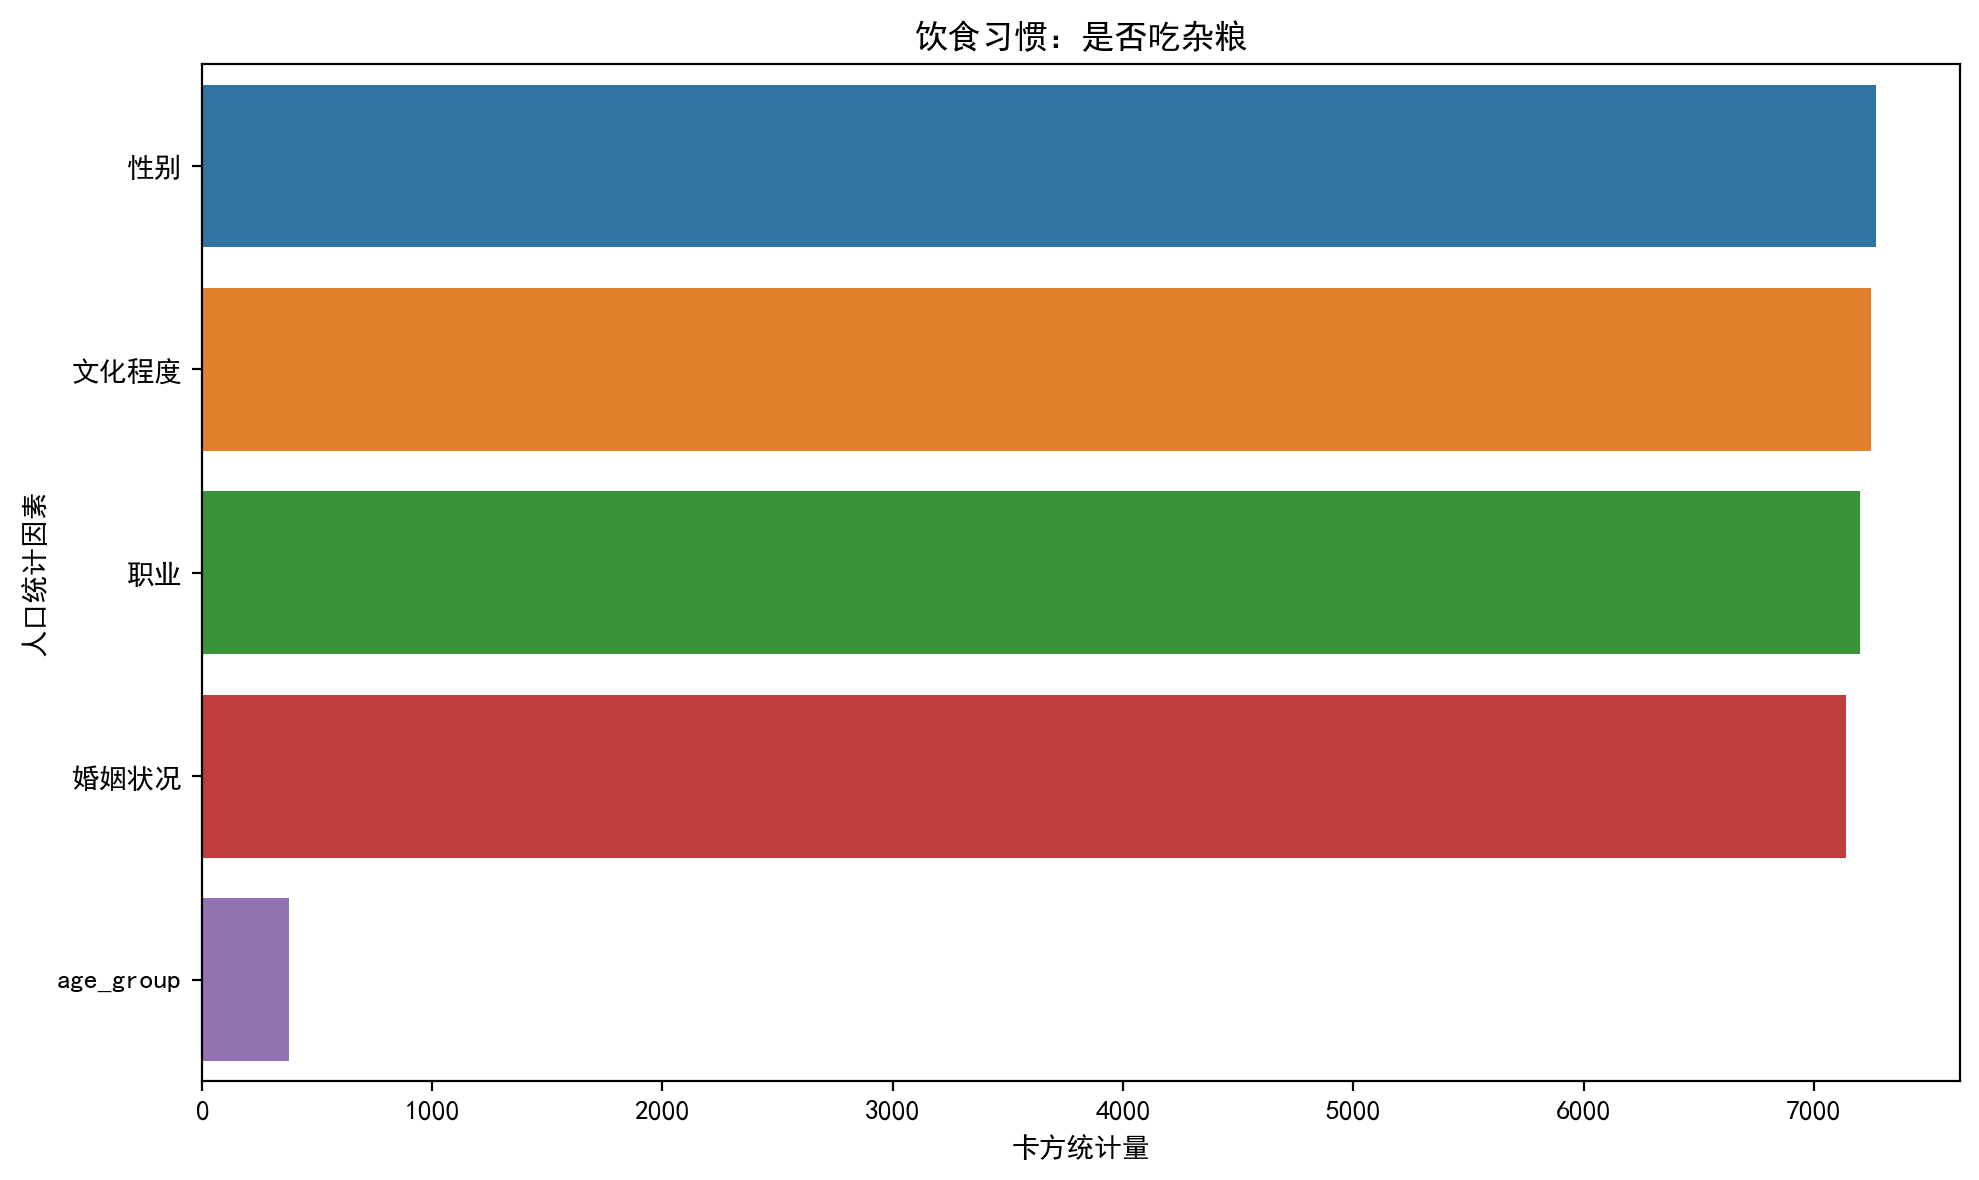

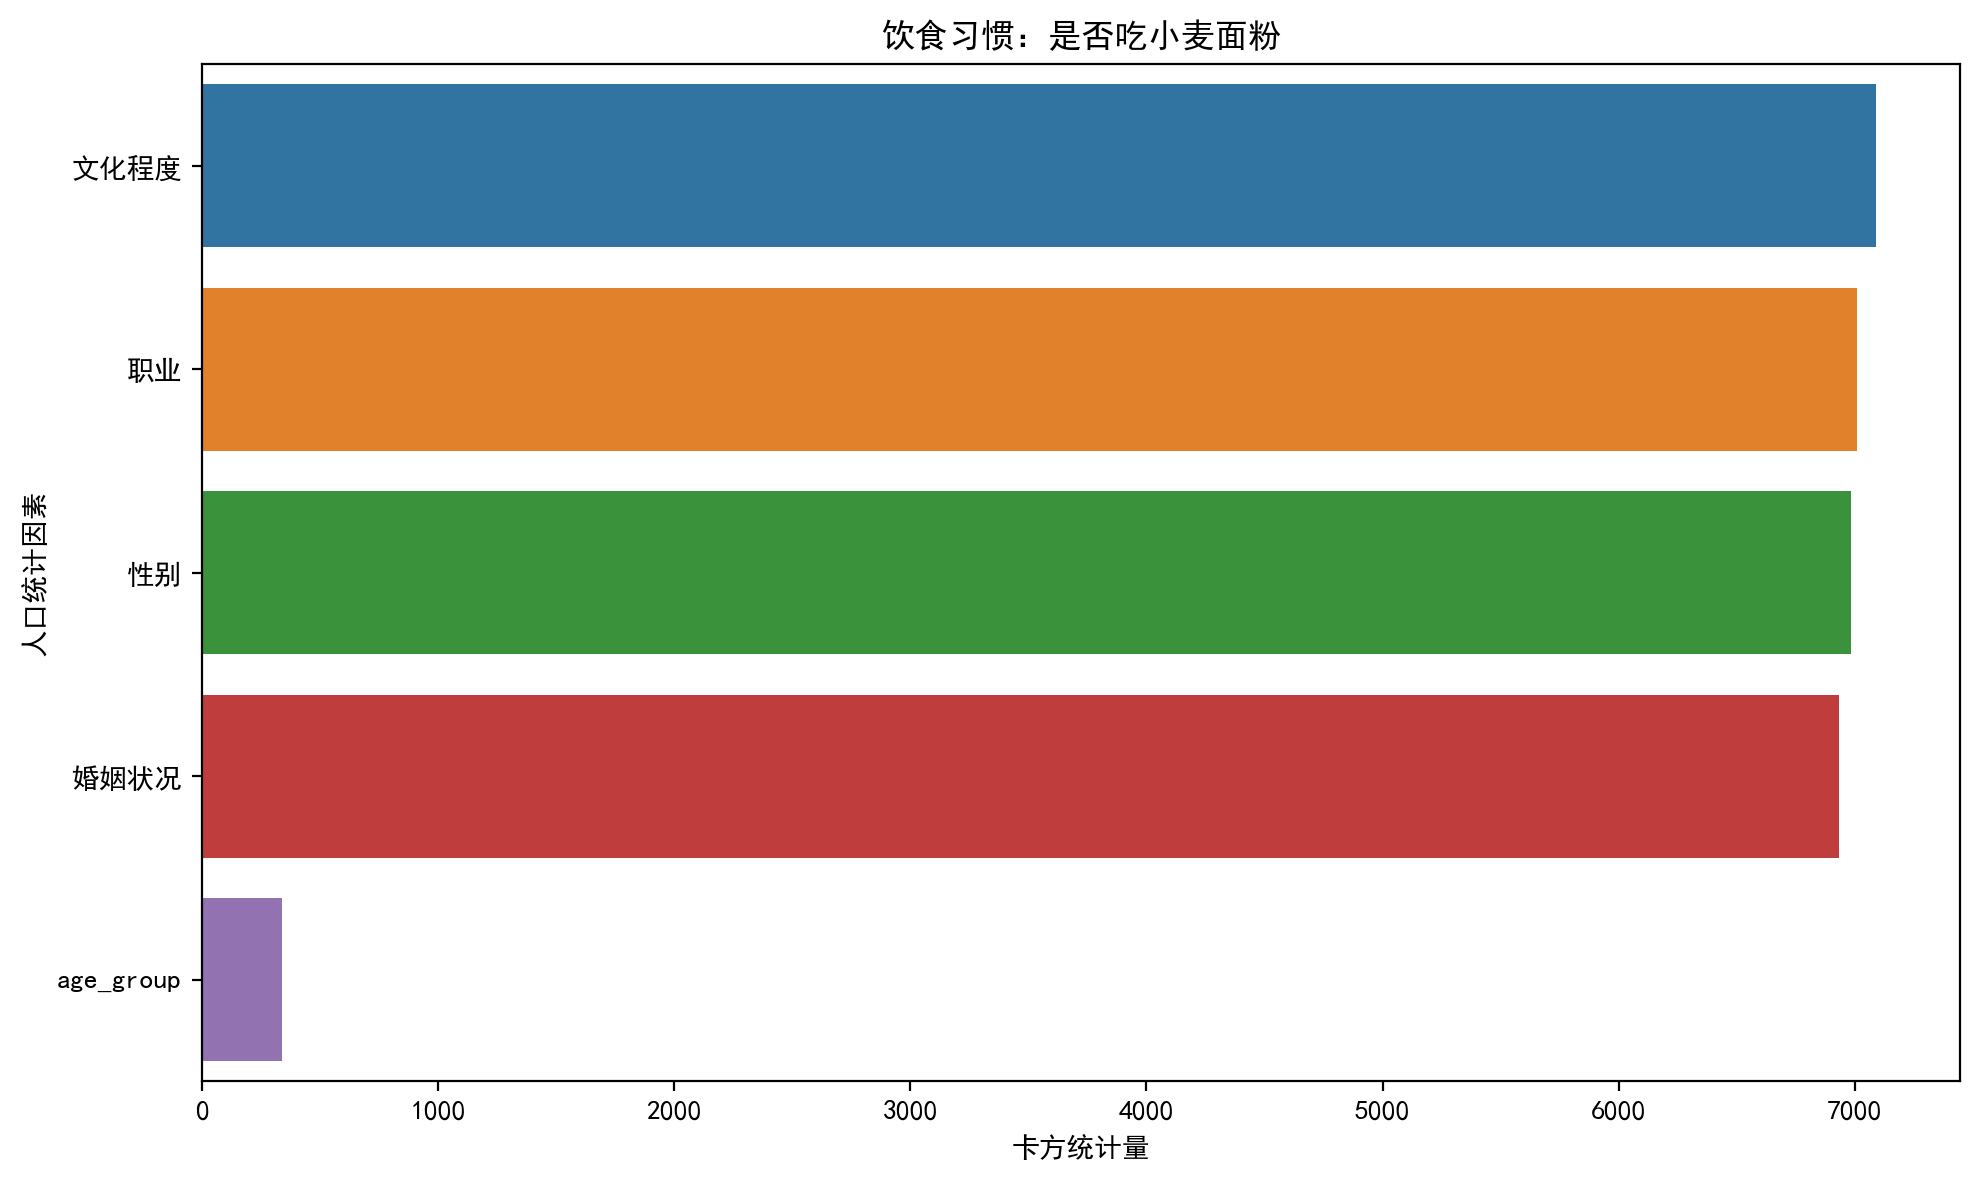

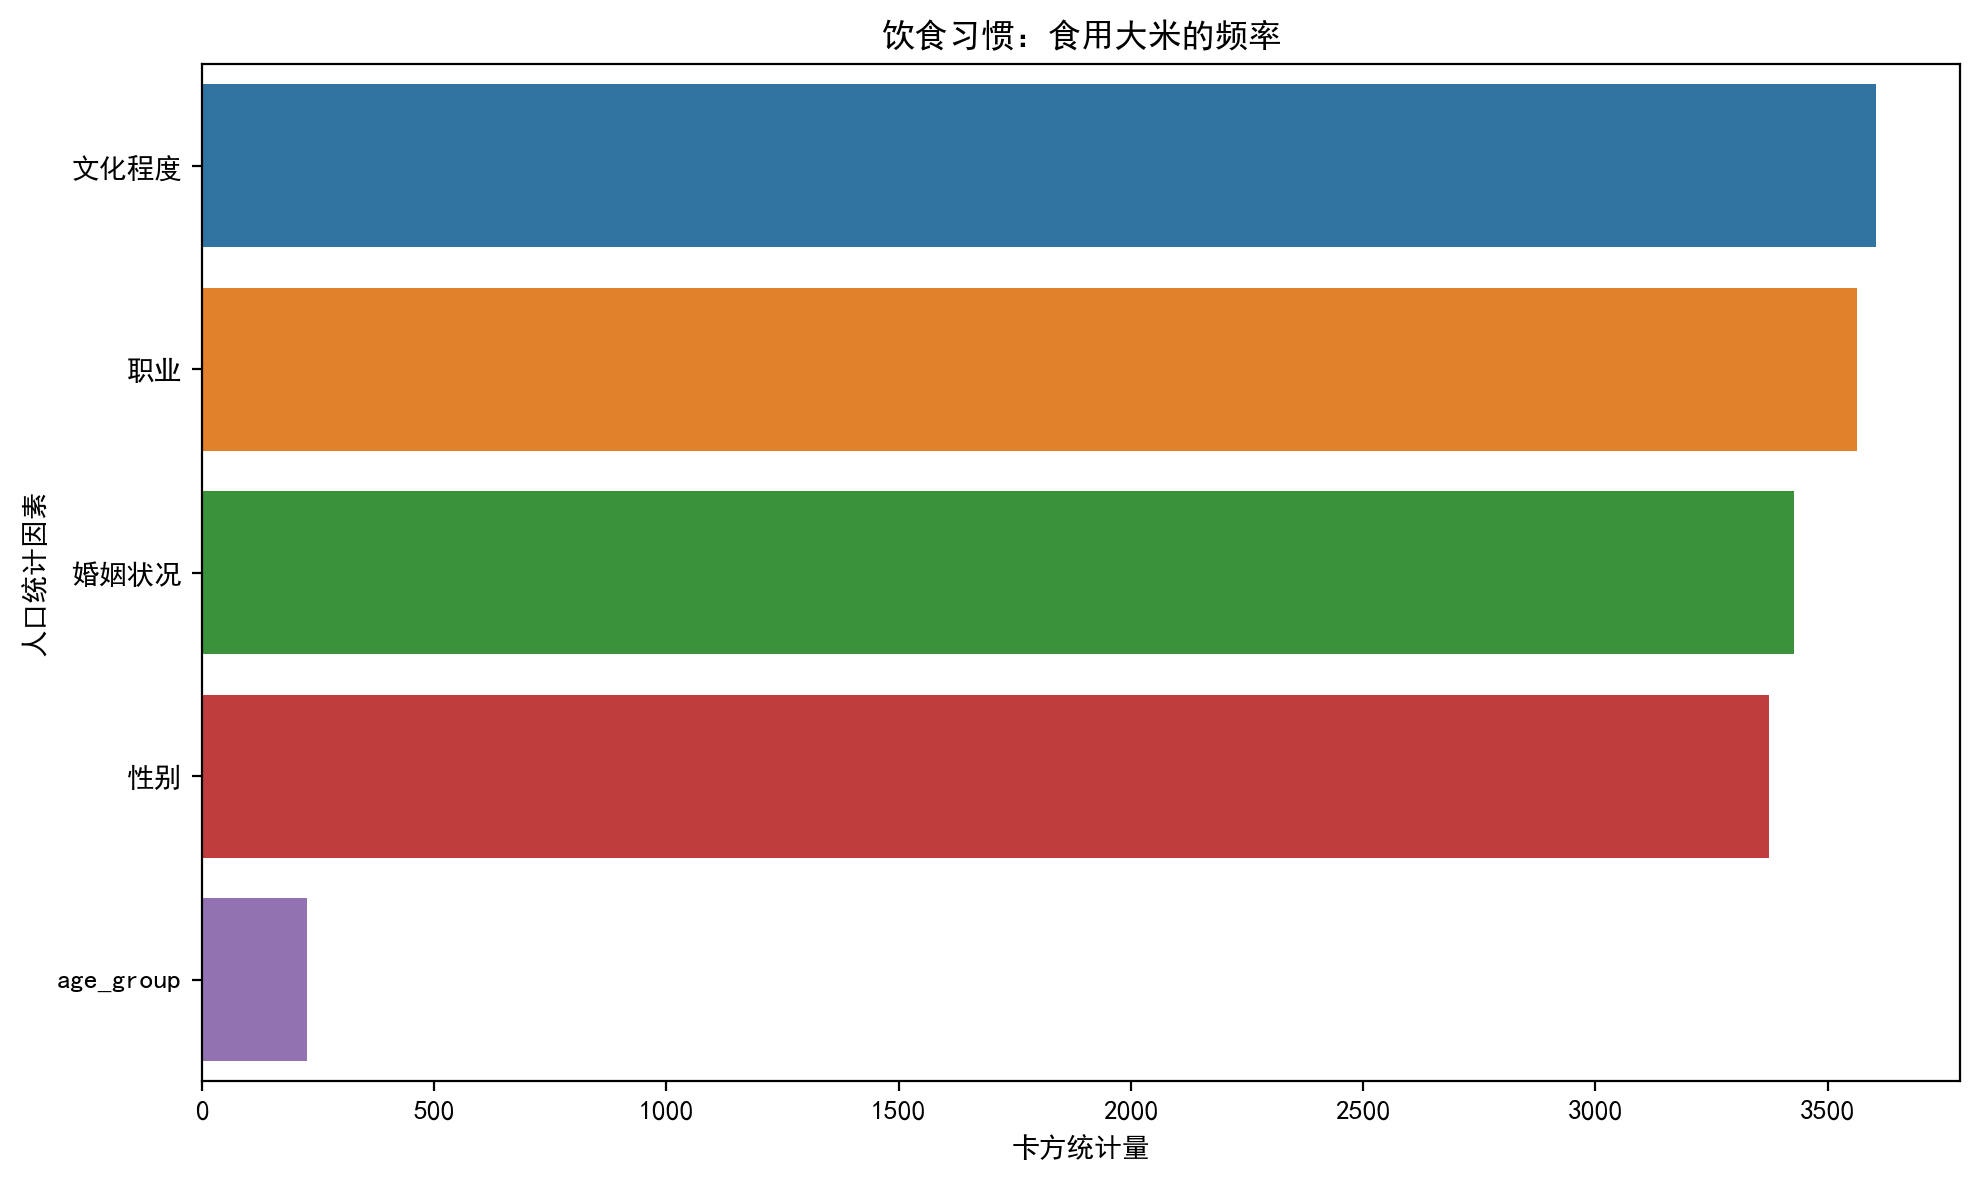

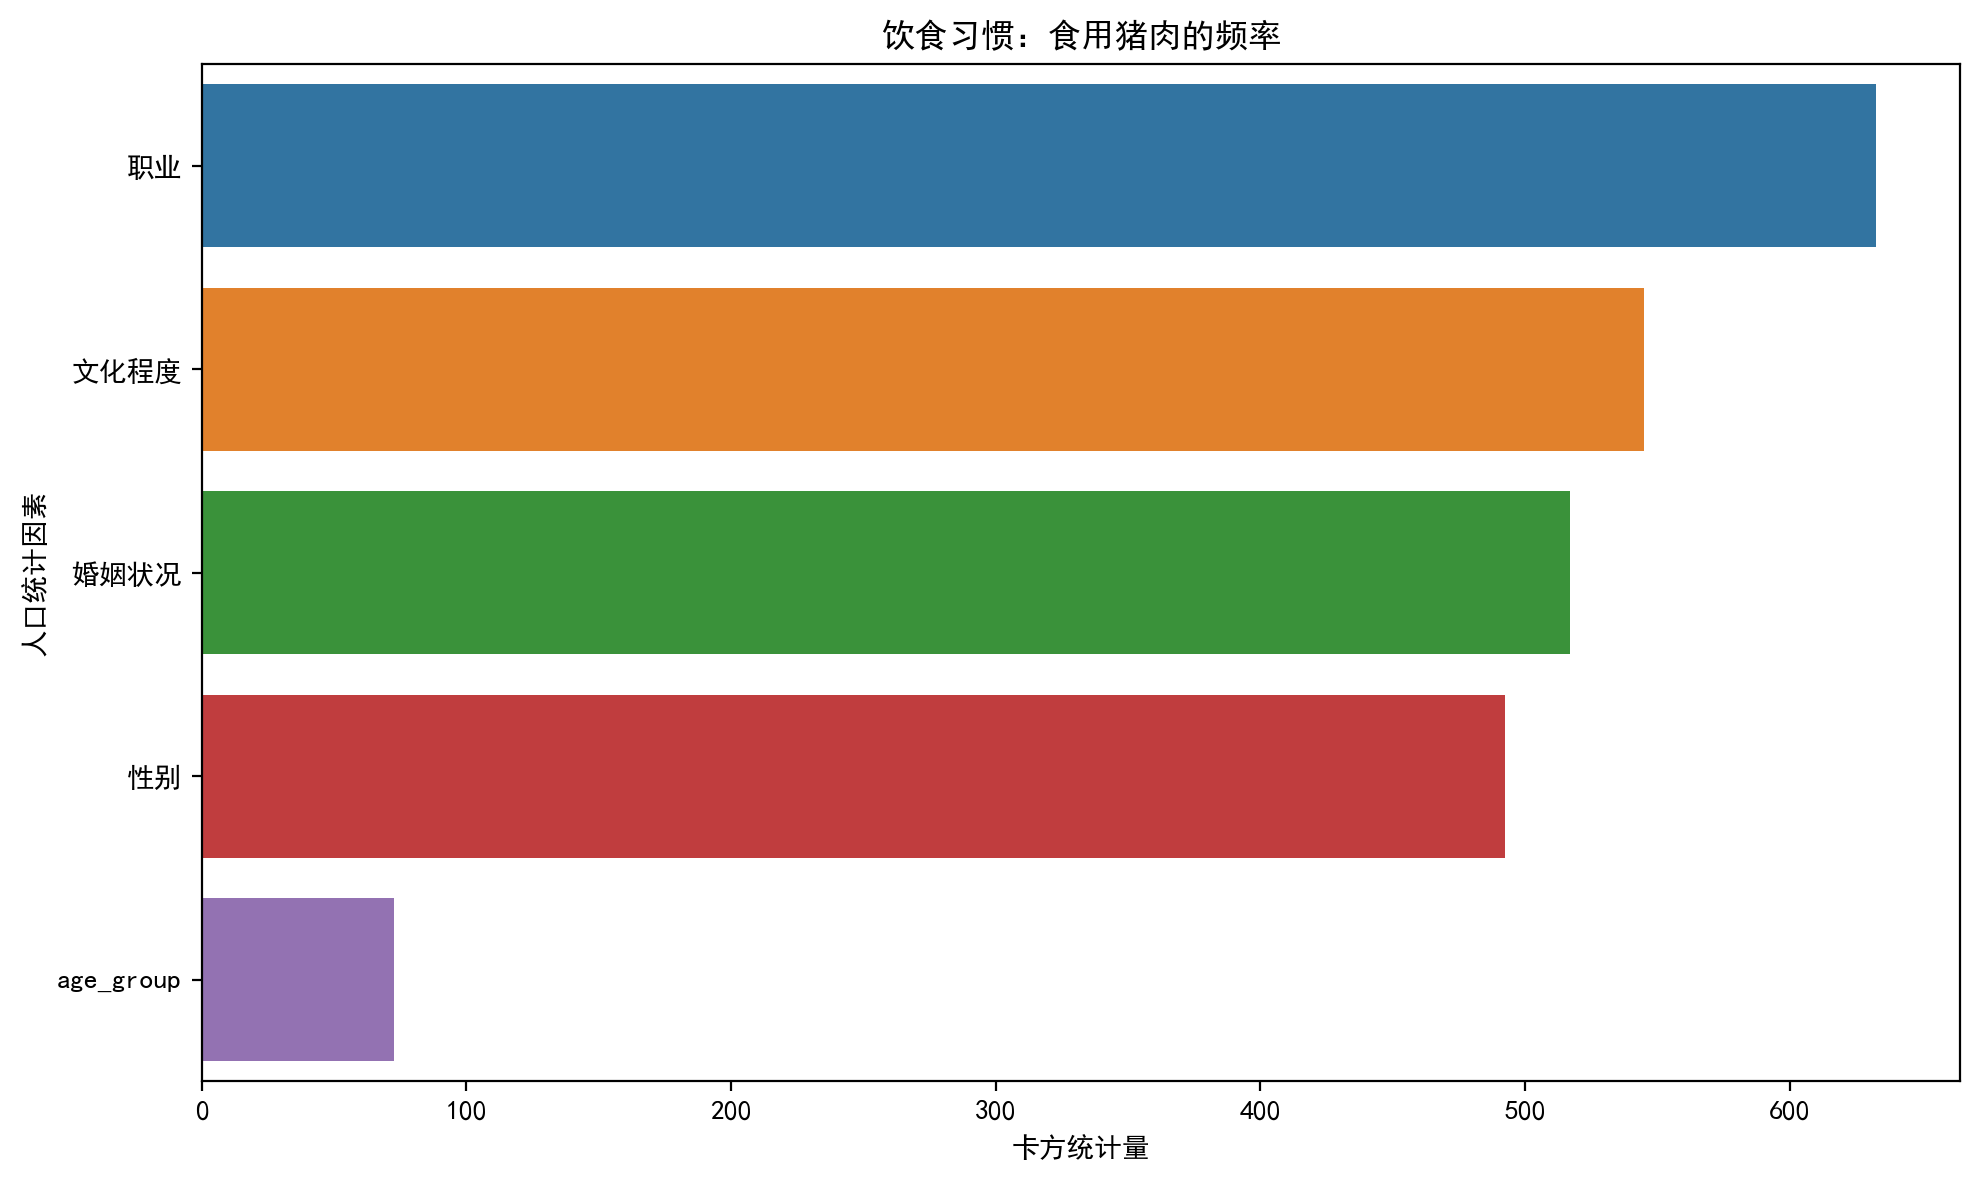

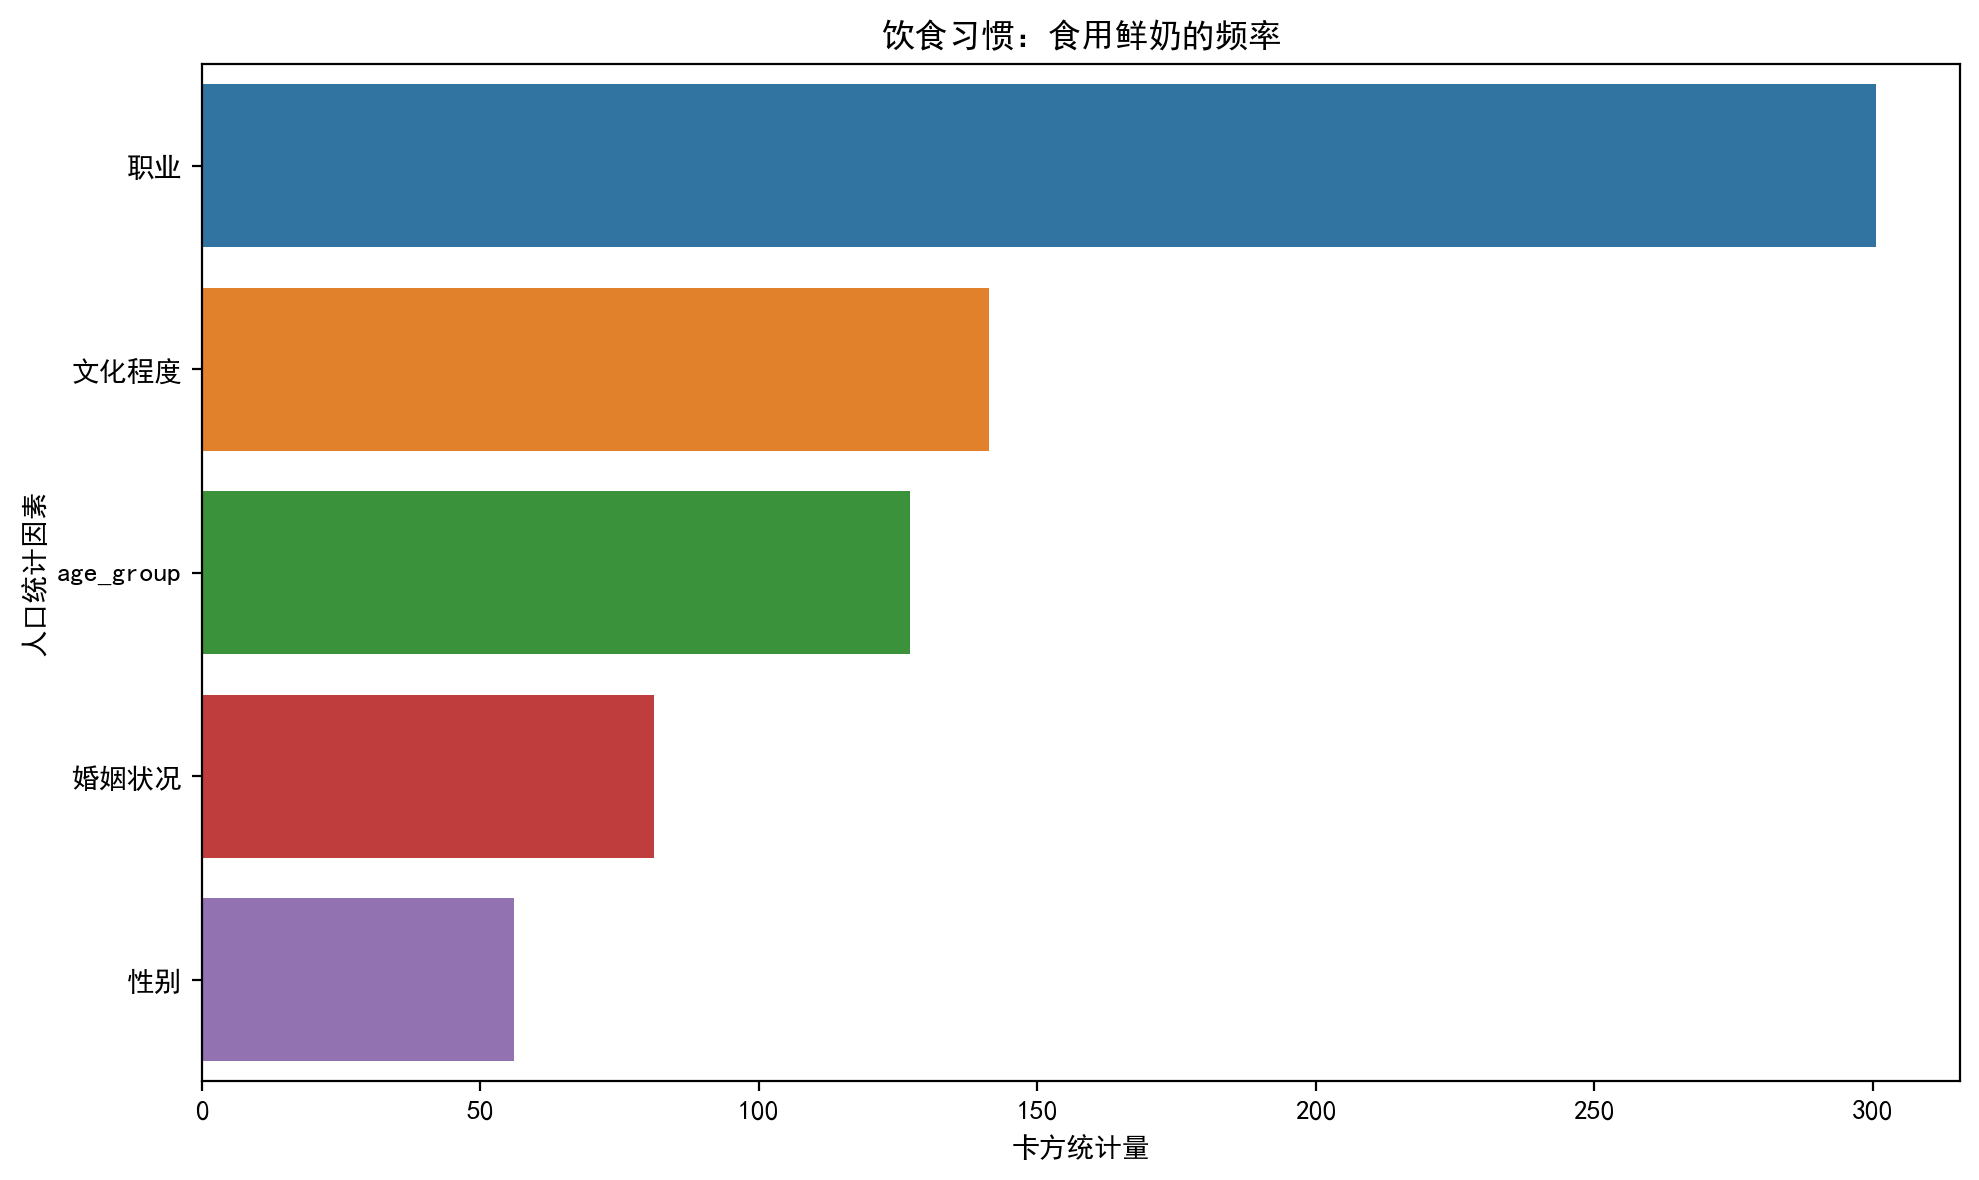

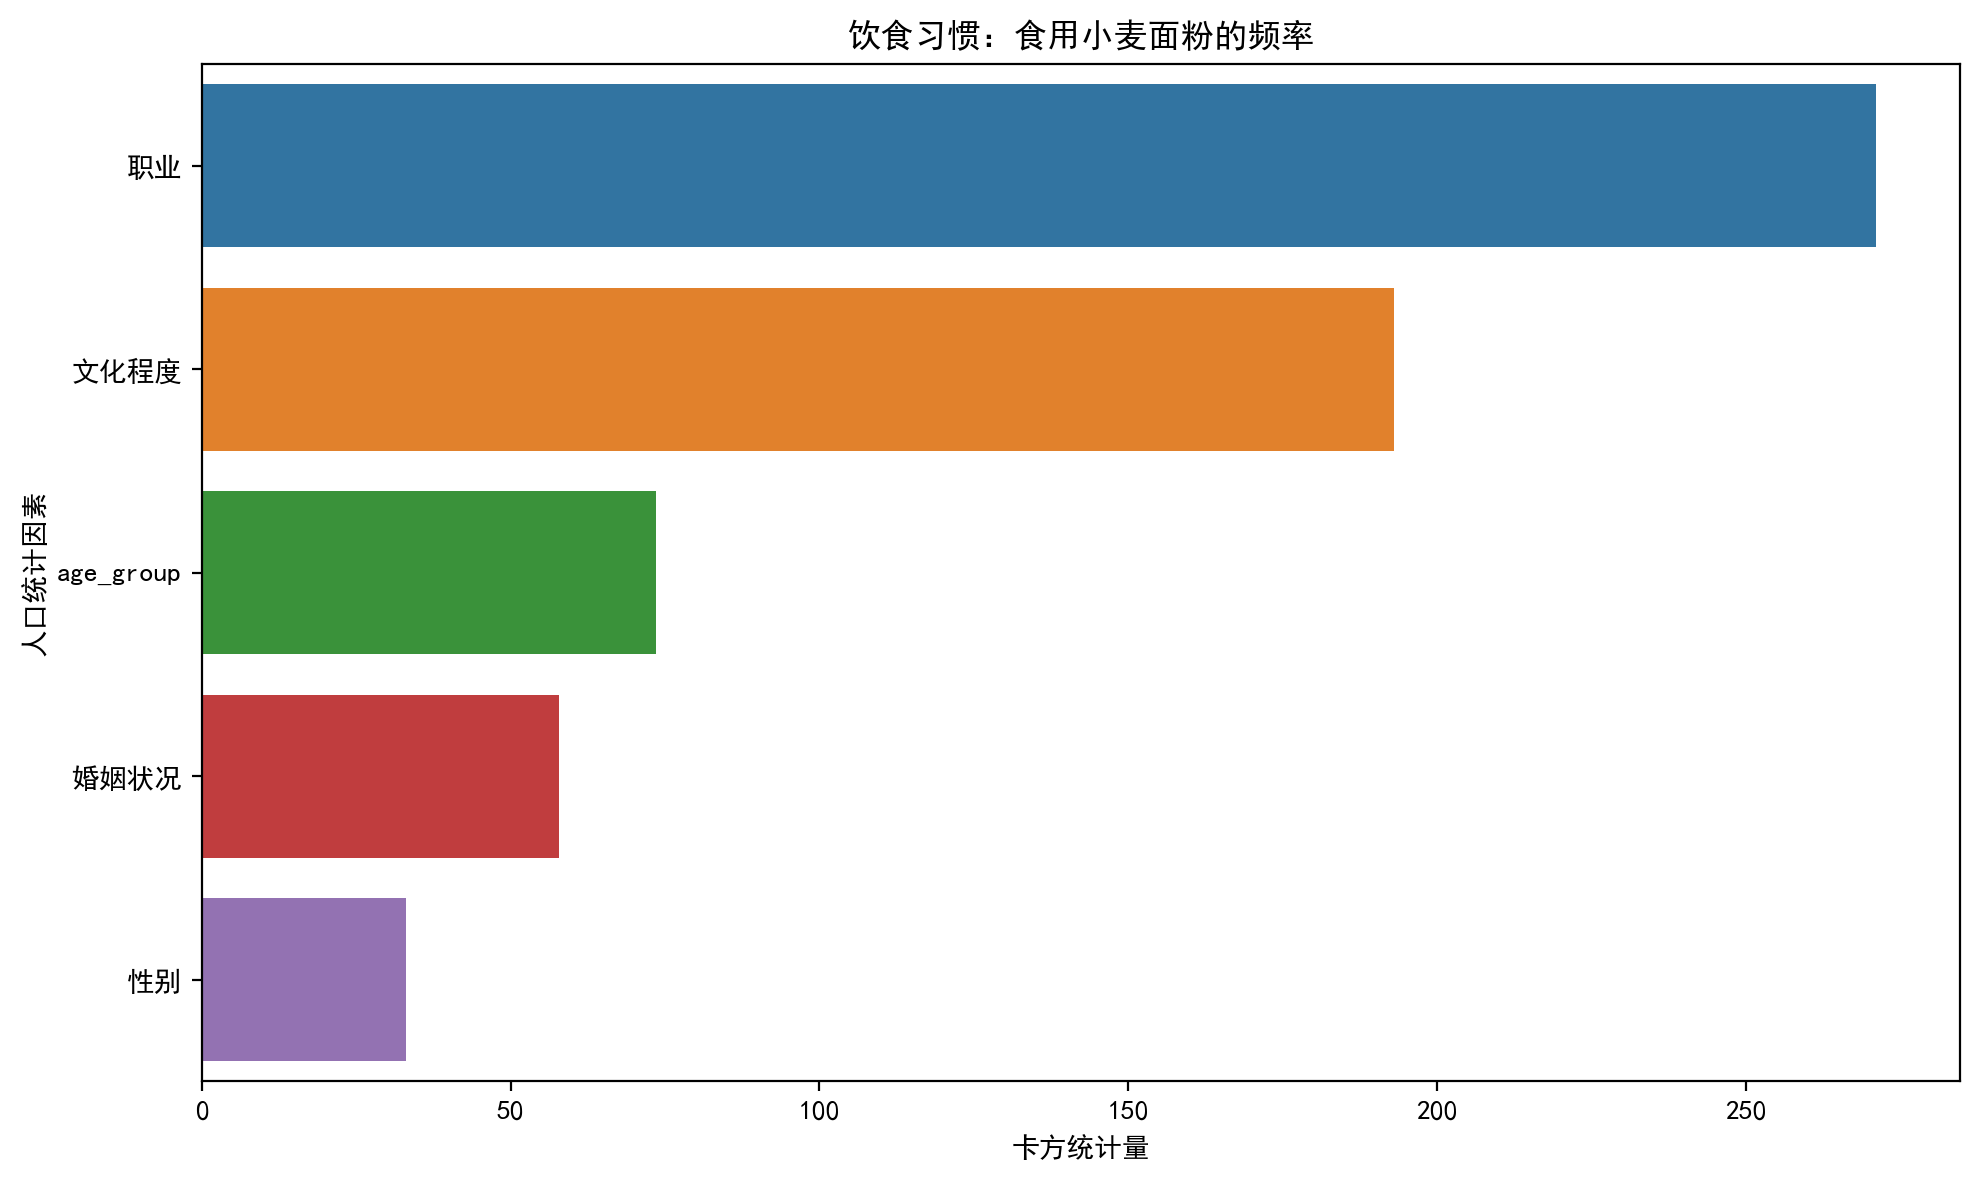

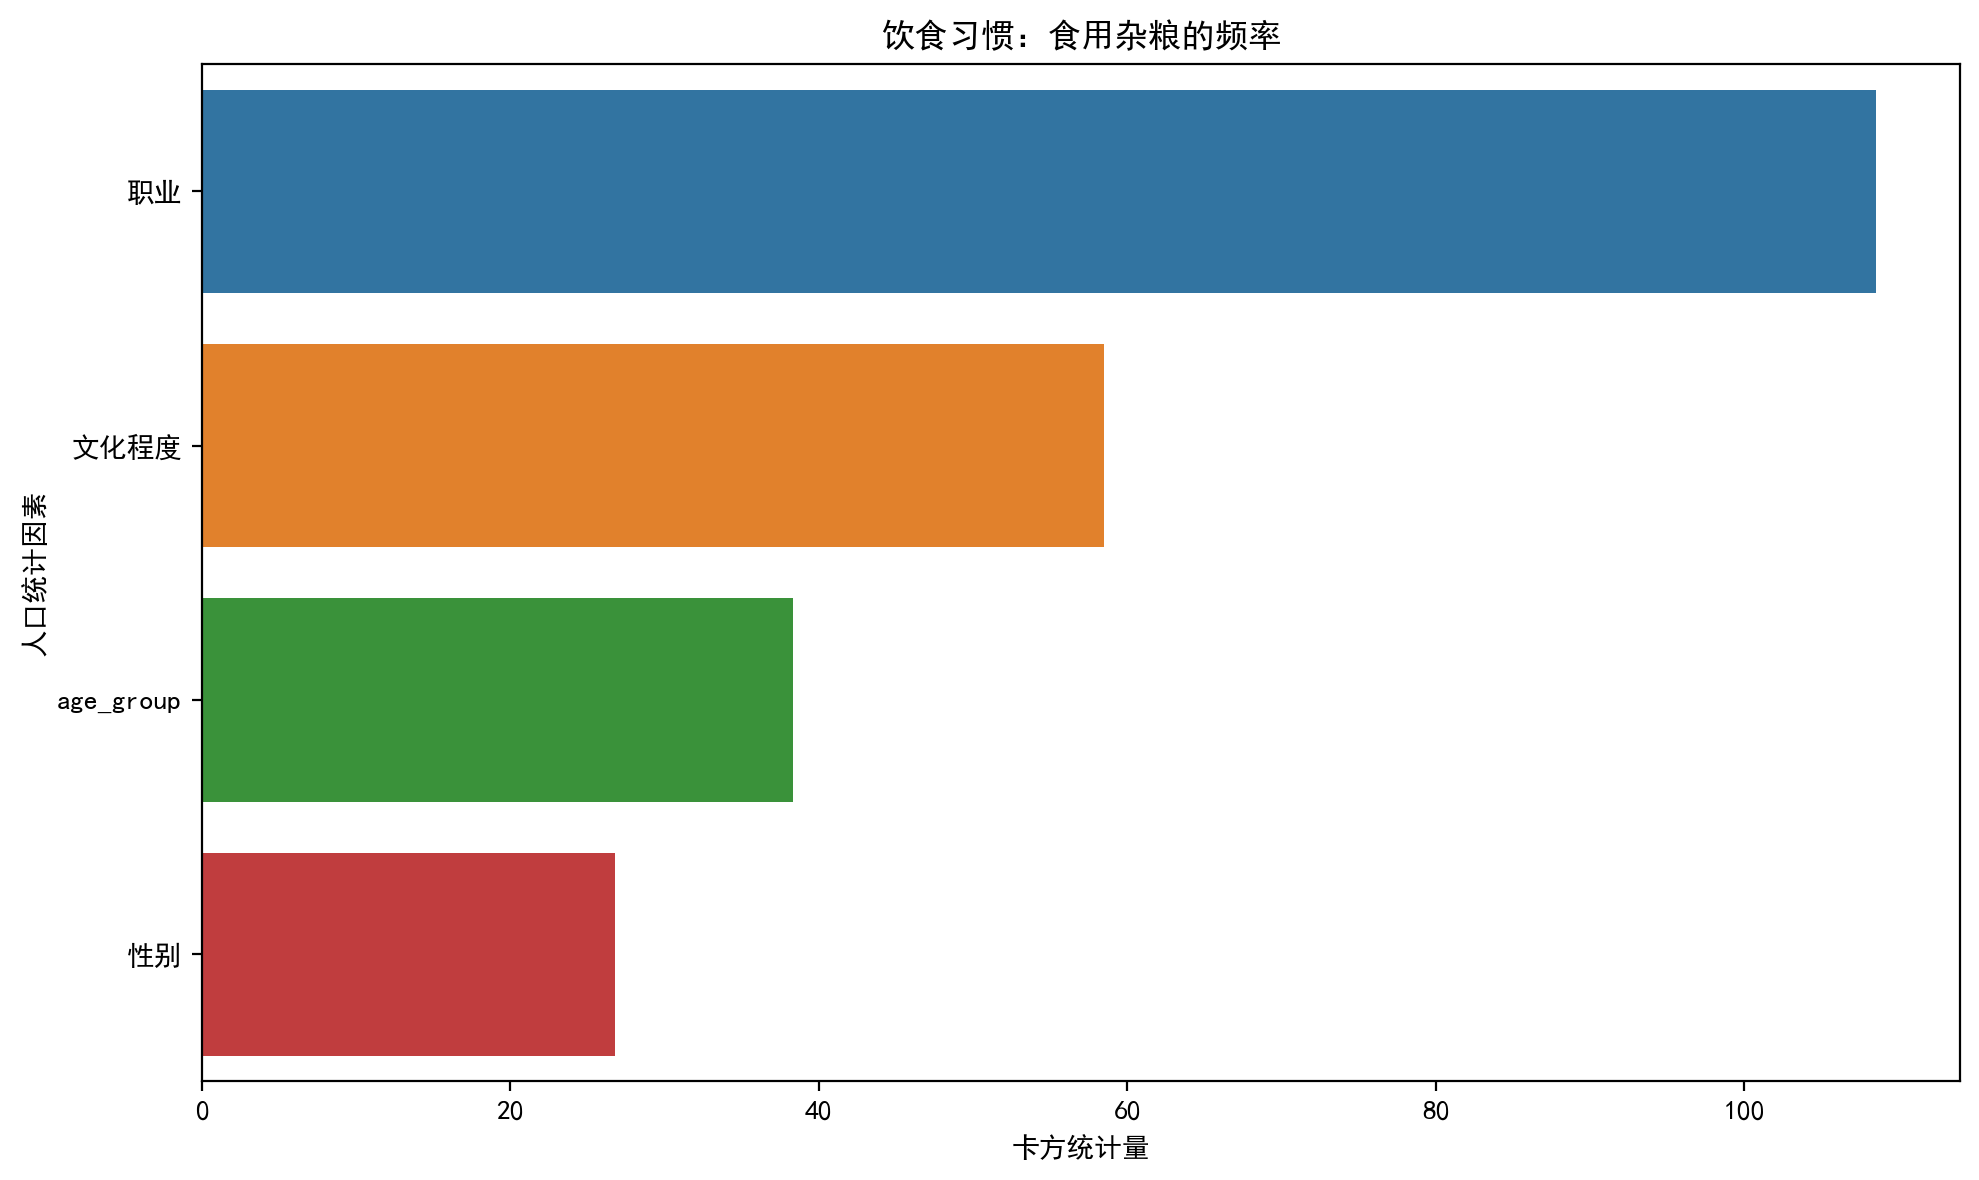

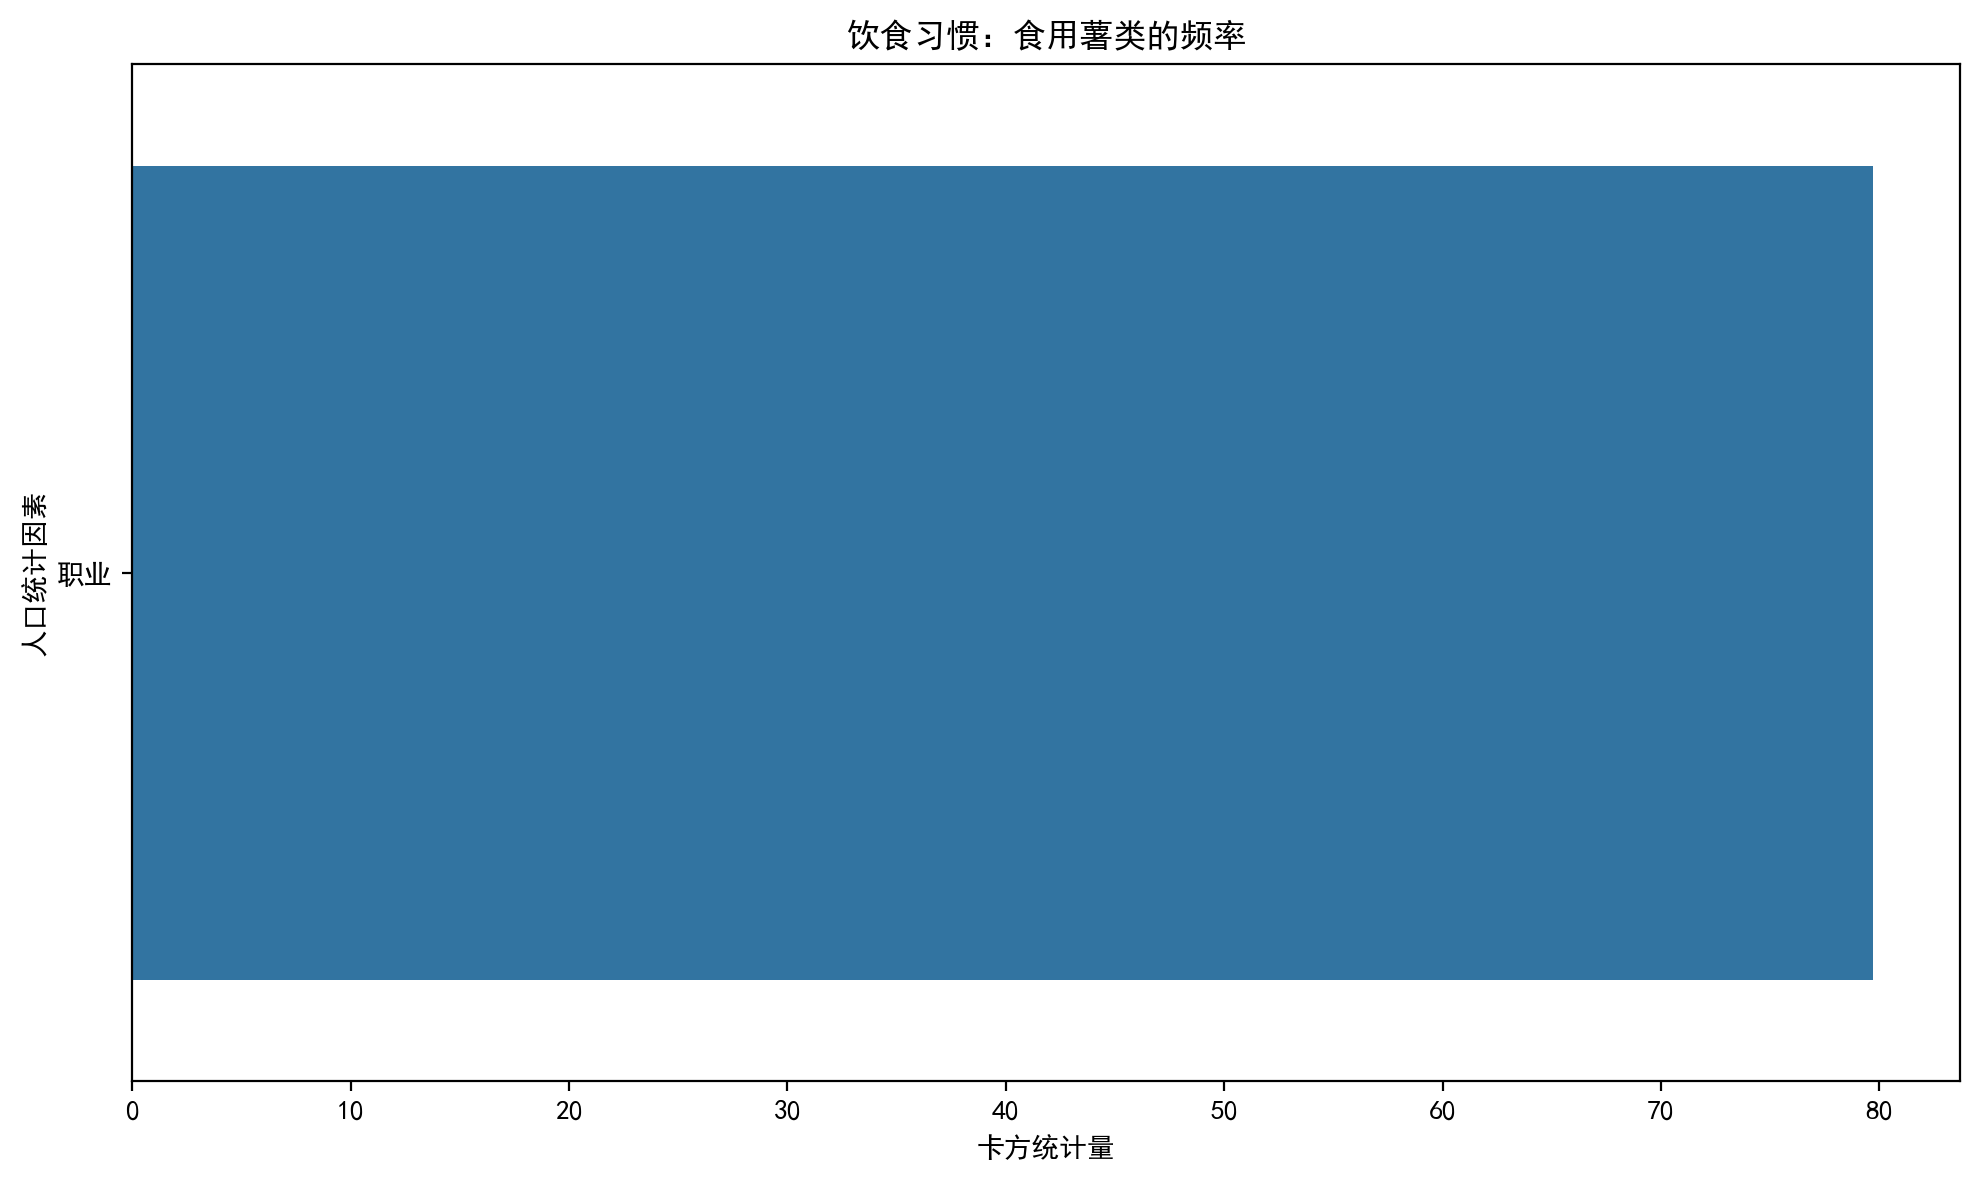

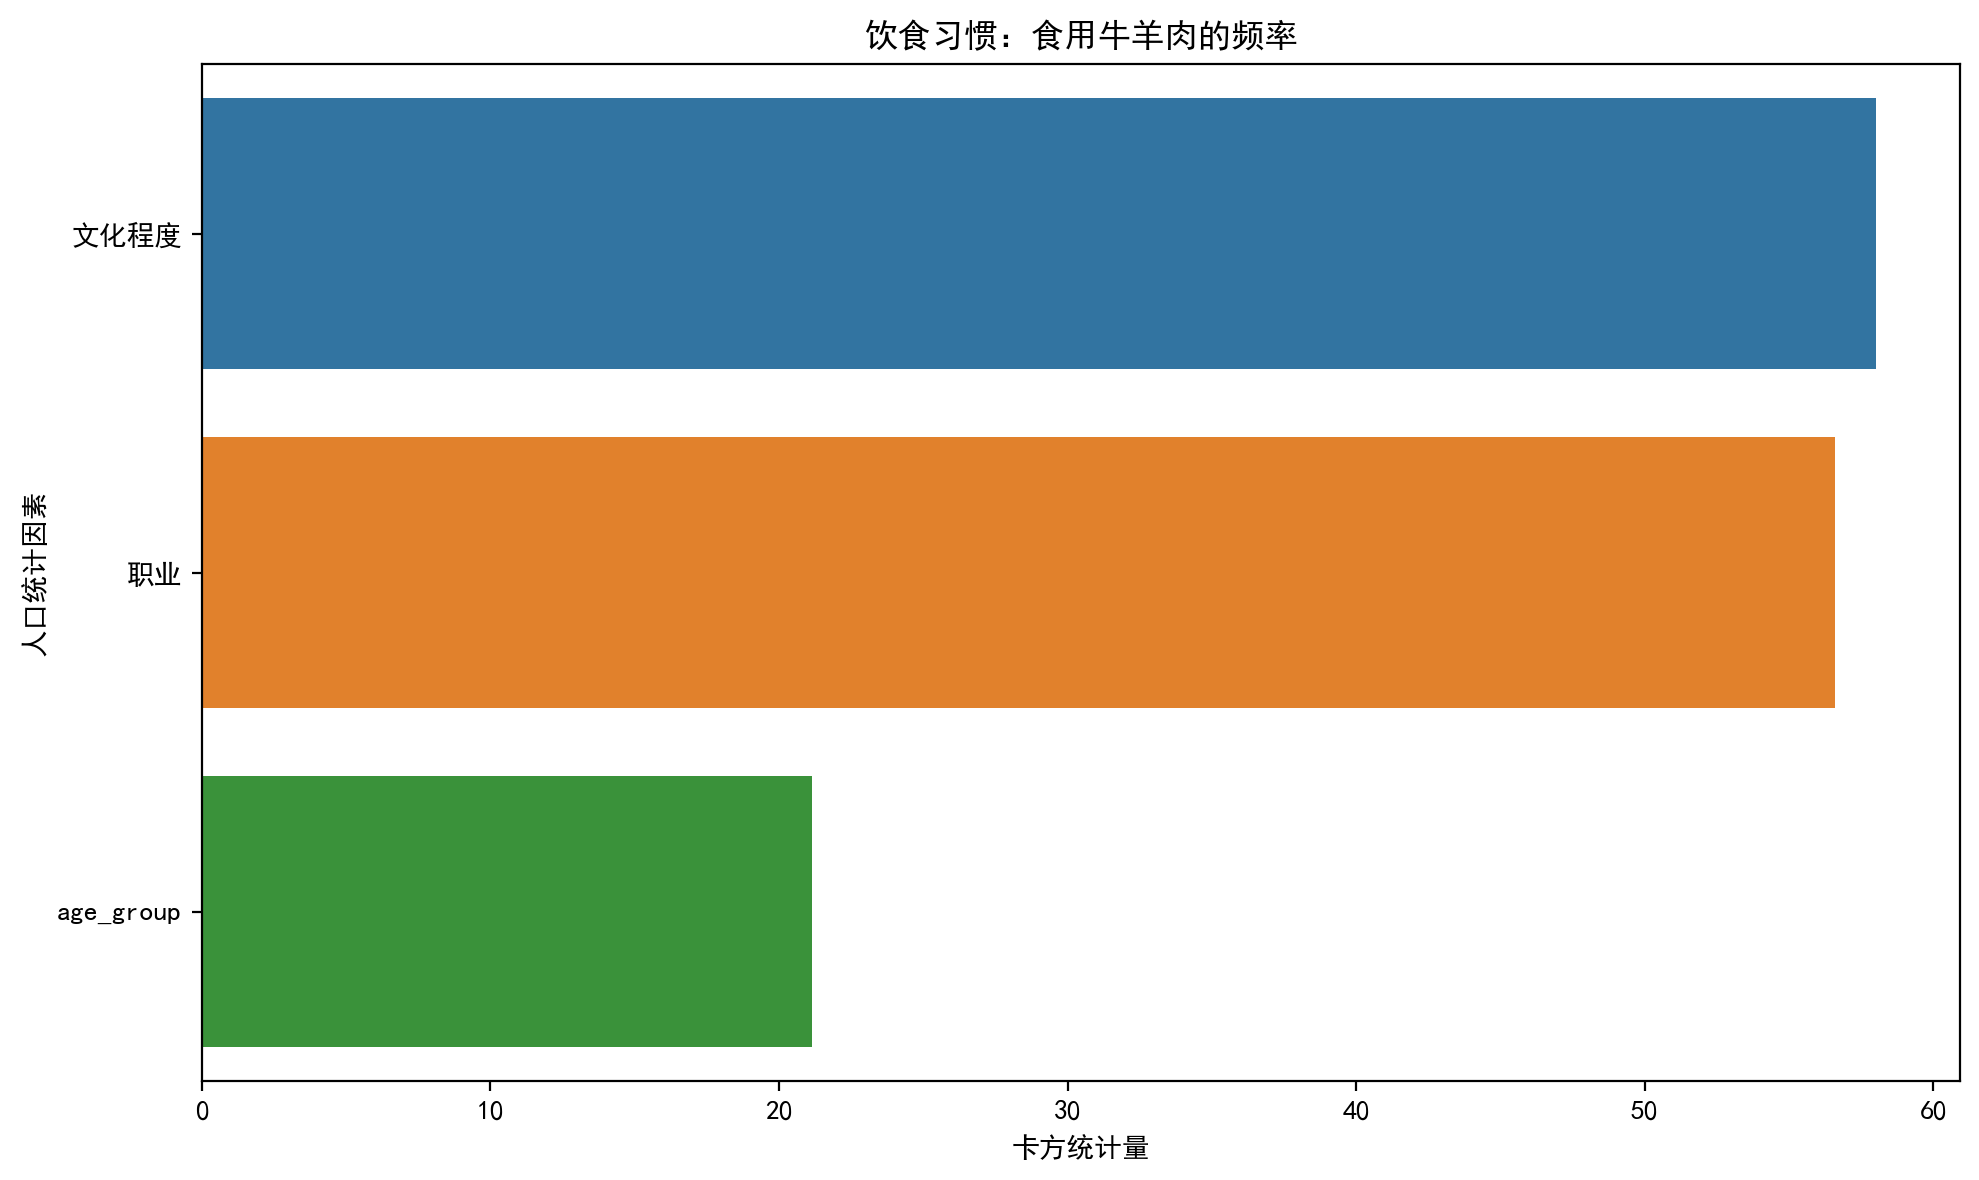

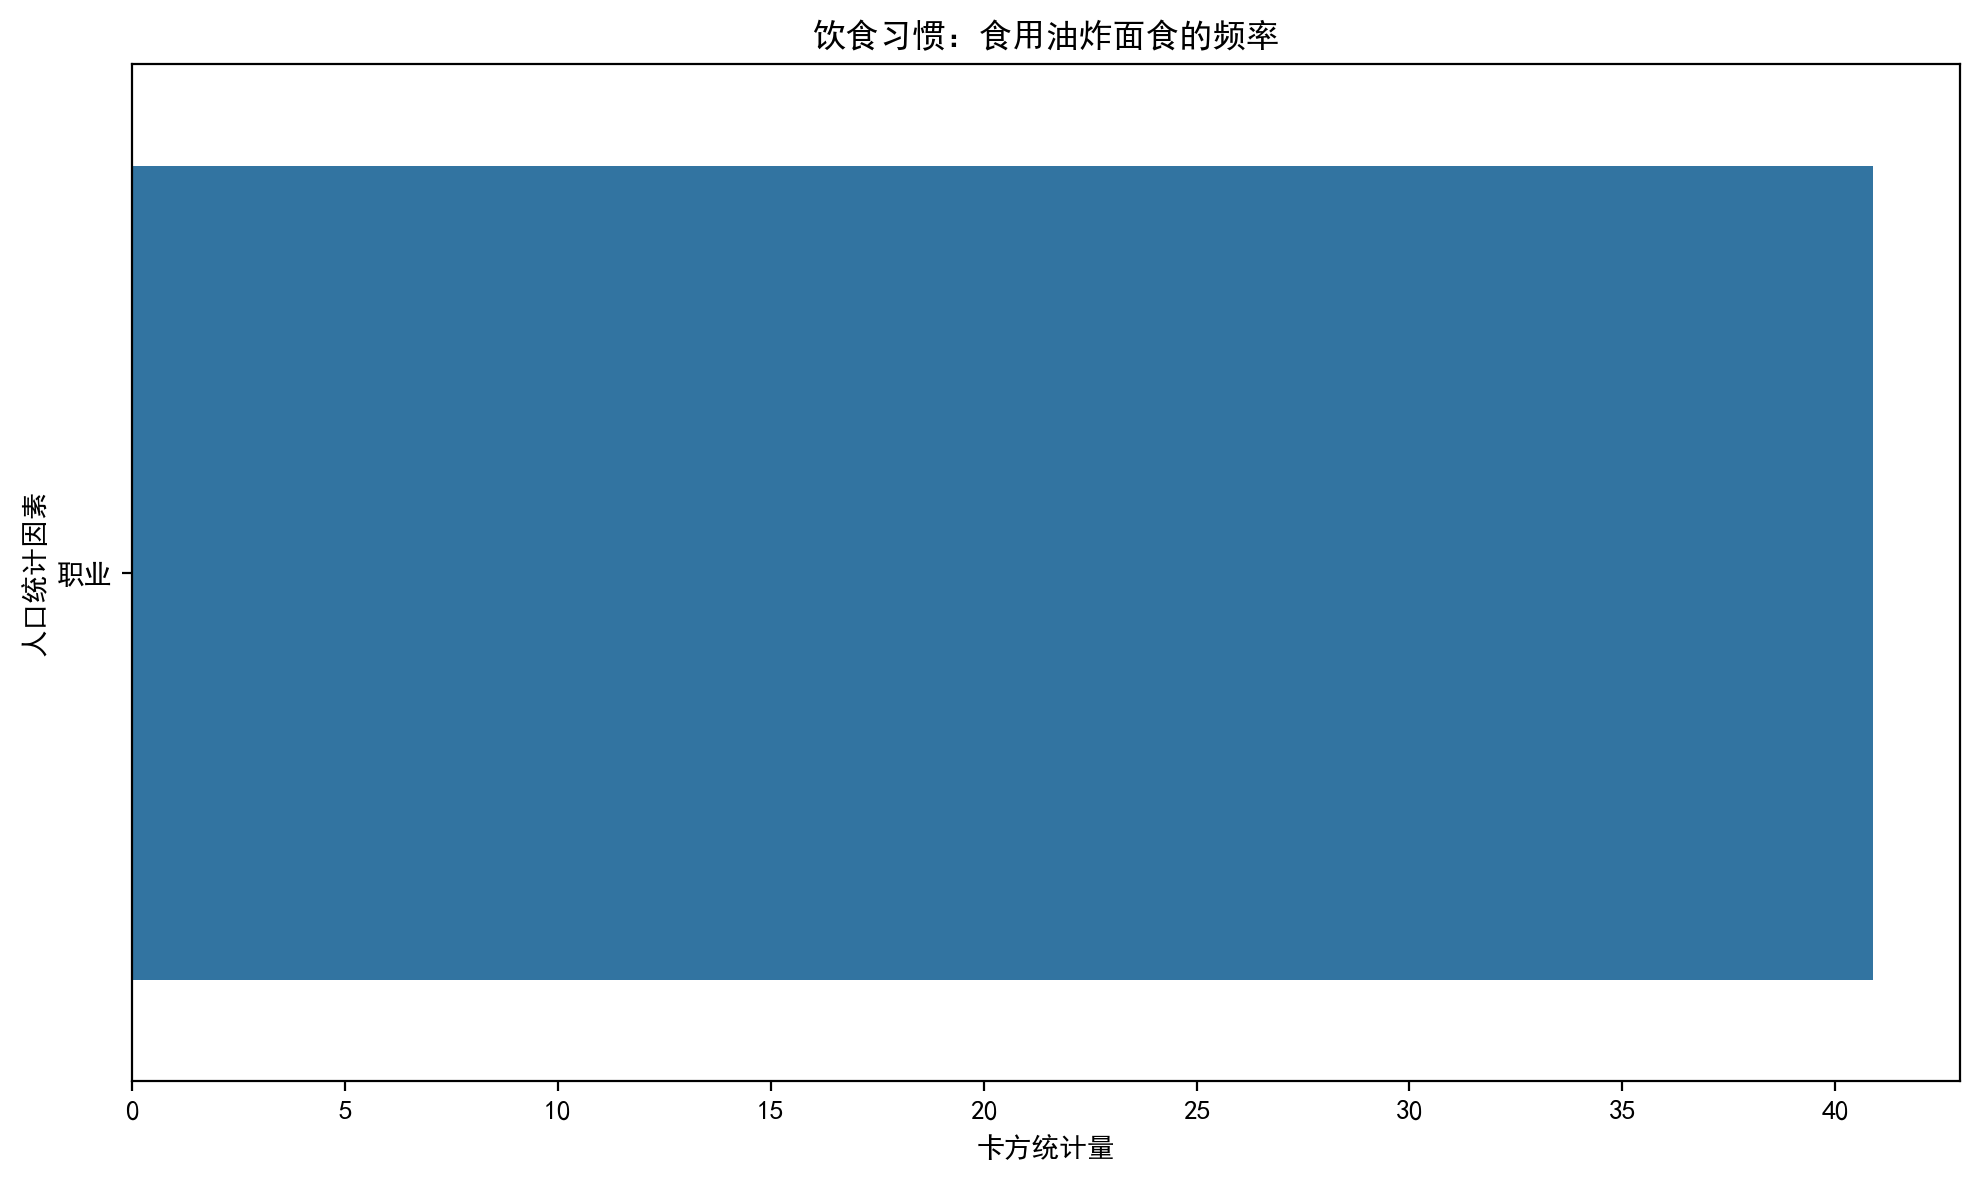

In [39]:
plt.figure(figsize=(10,6),dpi = 200)
for i,var in enumerate(subset_foodstyle["variable1"].unique(),start = 1):
    ##plt.subplot(n_subplots,1,i)
    data_to_plot = subset_foodstyle[subset_foodstyle["variable1"] == var]
    if data_to_plot.empty:
        pass
    else:
        plt.figure(figsize=(10,6),dpi = 200)
        sns.barplot(data = data_to_plot,x = "chi2",y ="variable2")  # 保存图片 注意 在show()之前  不然show会重新创建新的 图片
        plt.xlabel("卡方统计量")
        plt.ylabel("人口统计因素")
        plt.title(f"饮食习惯：{var}")
        plt.tight_layout()
        plt.show()


In [40]:
n_subplots_1 = len(subset_lifestyle["variable1"].unique())

<Figure size 2000x1200 with 0 Axes>

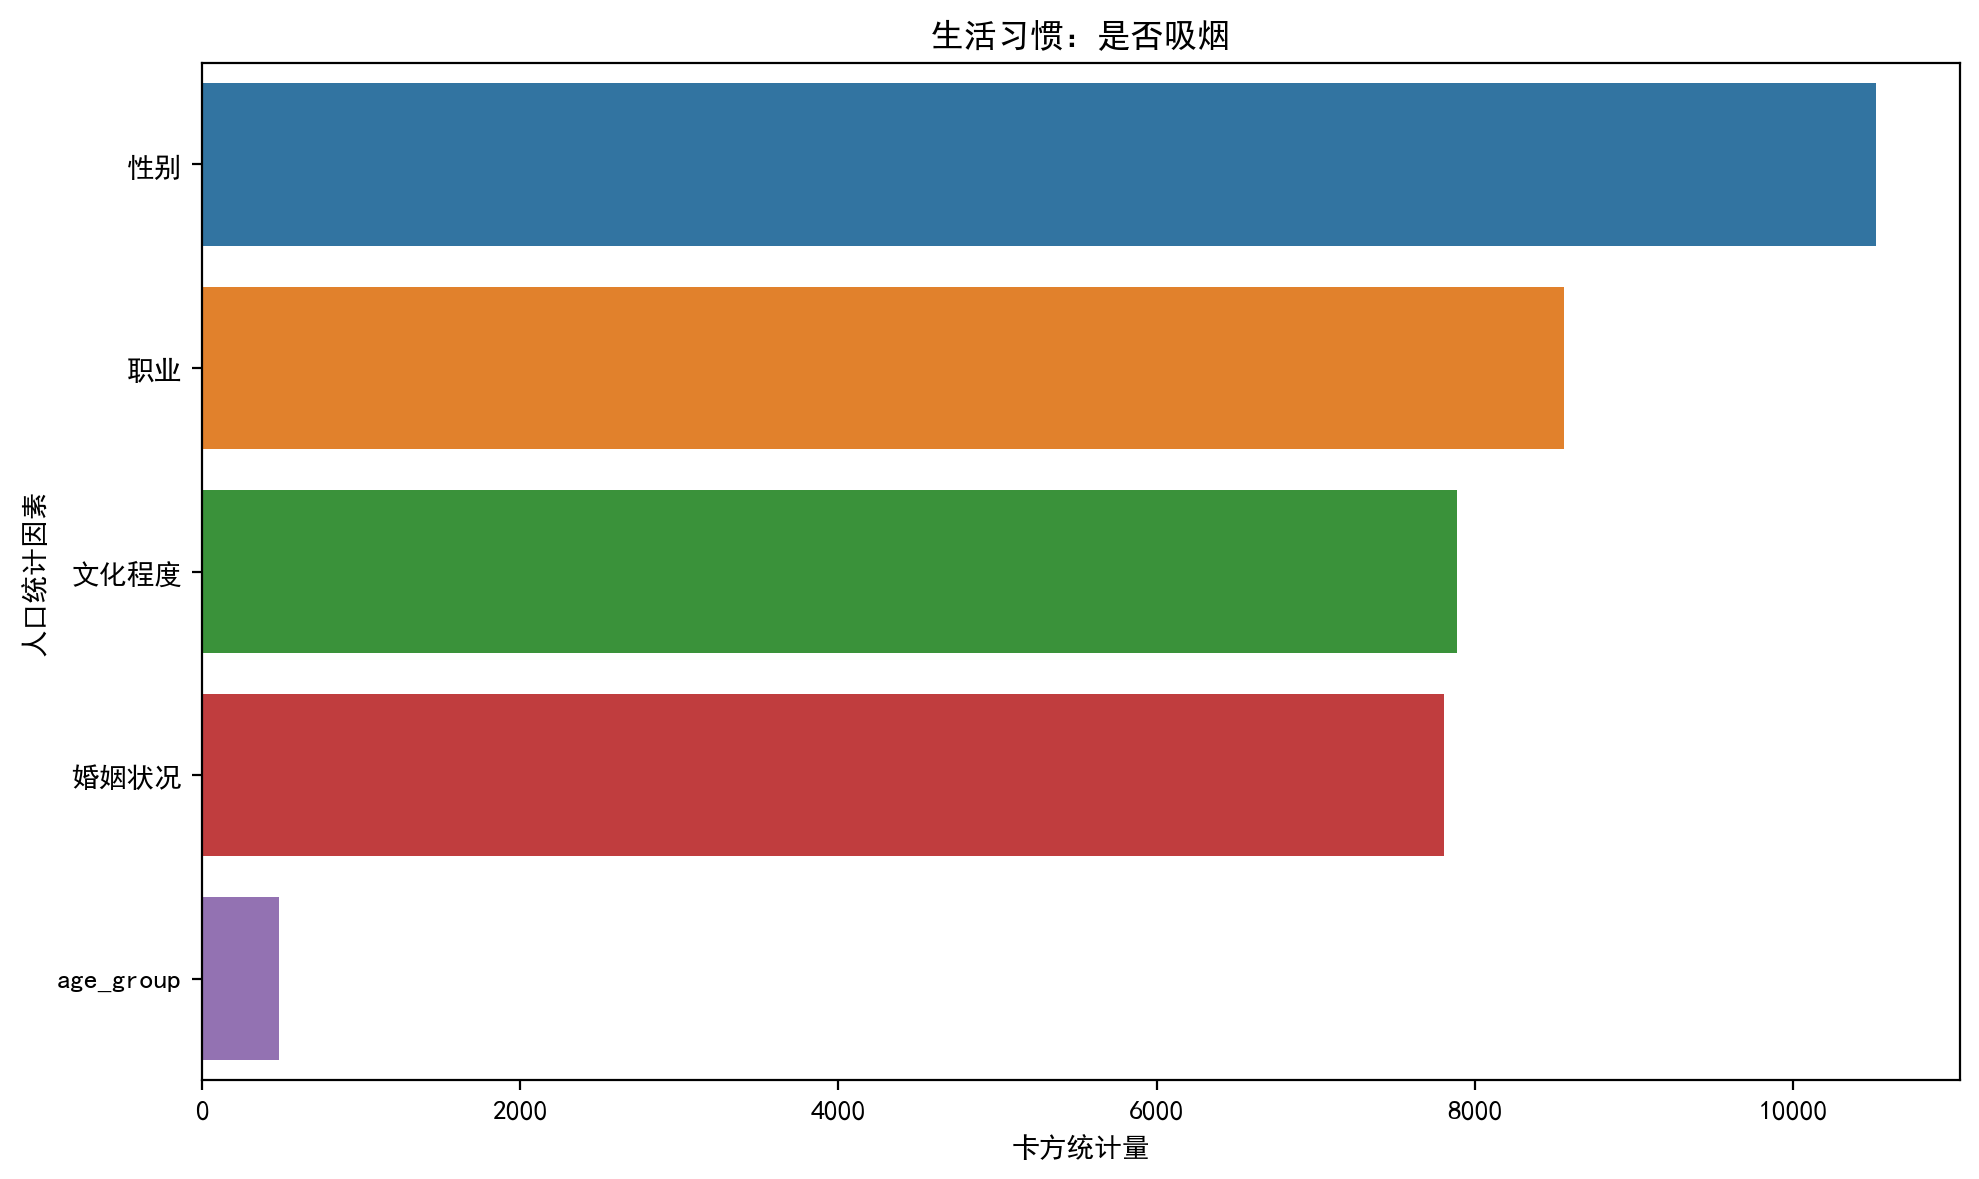

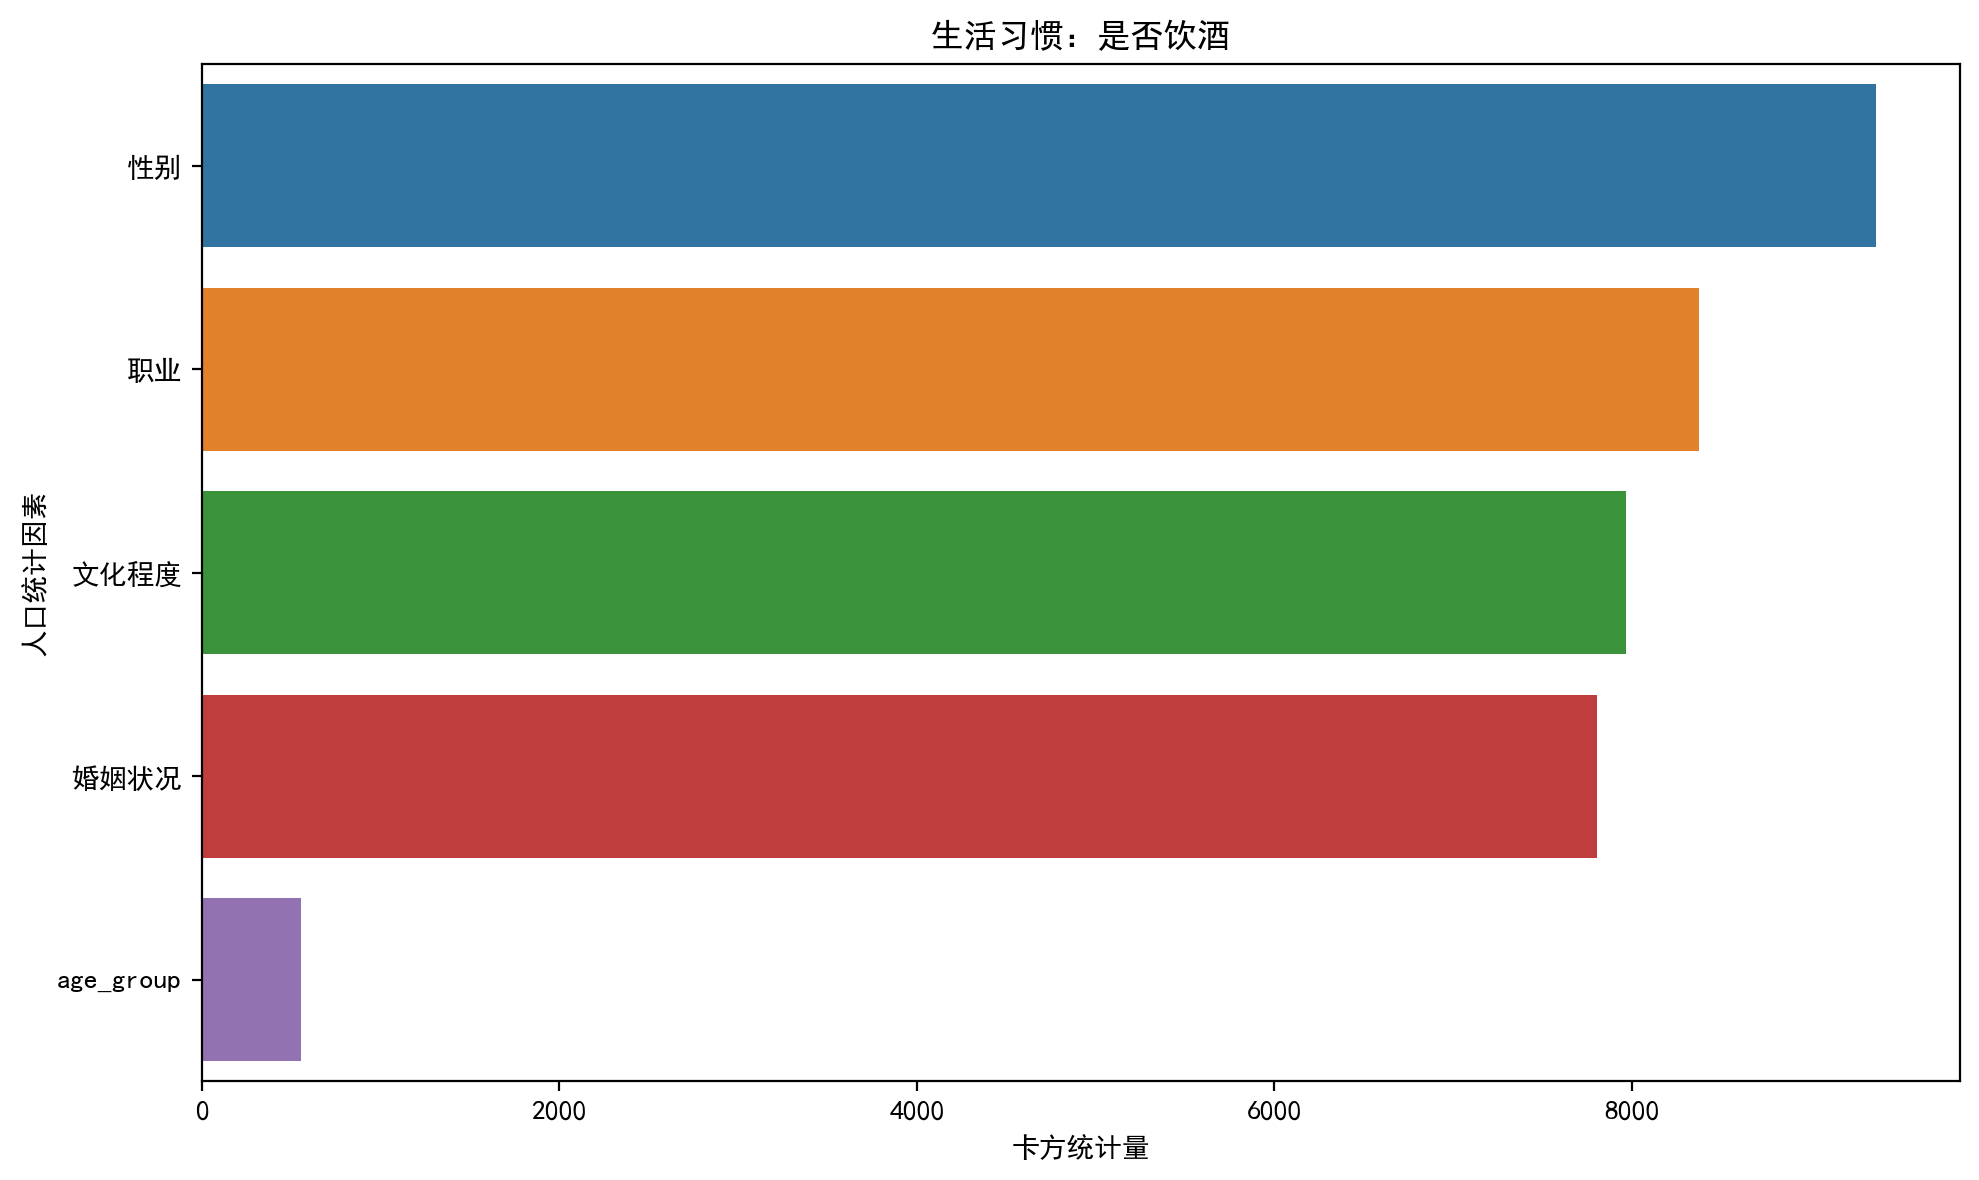

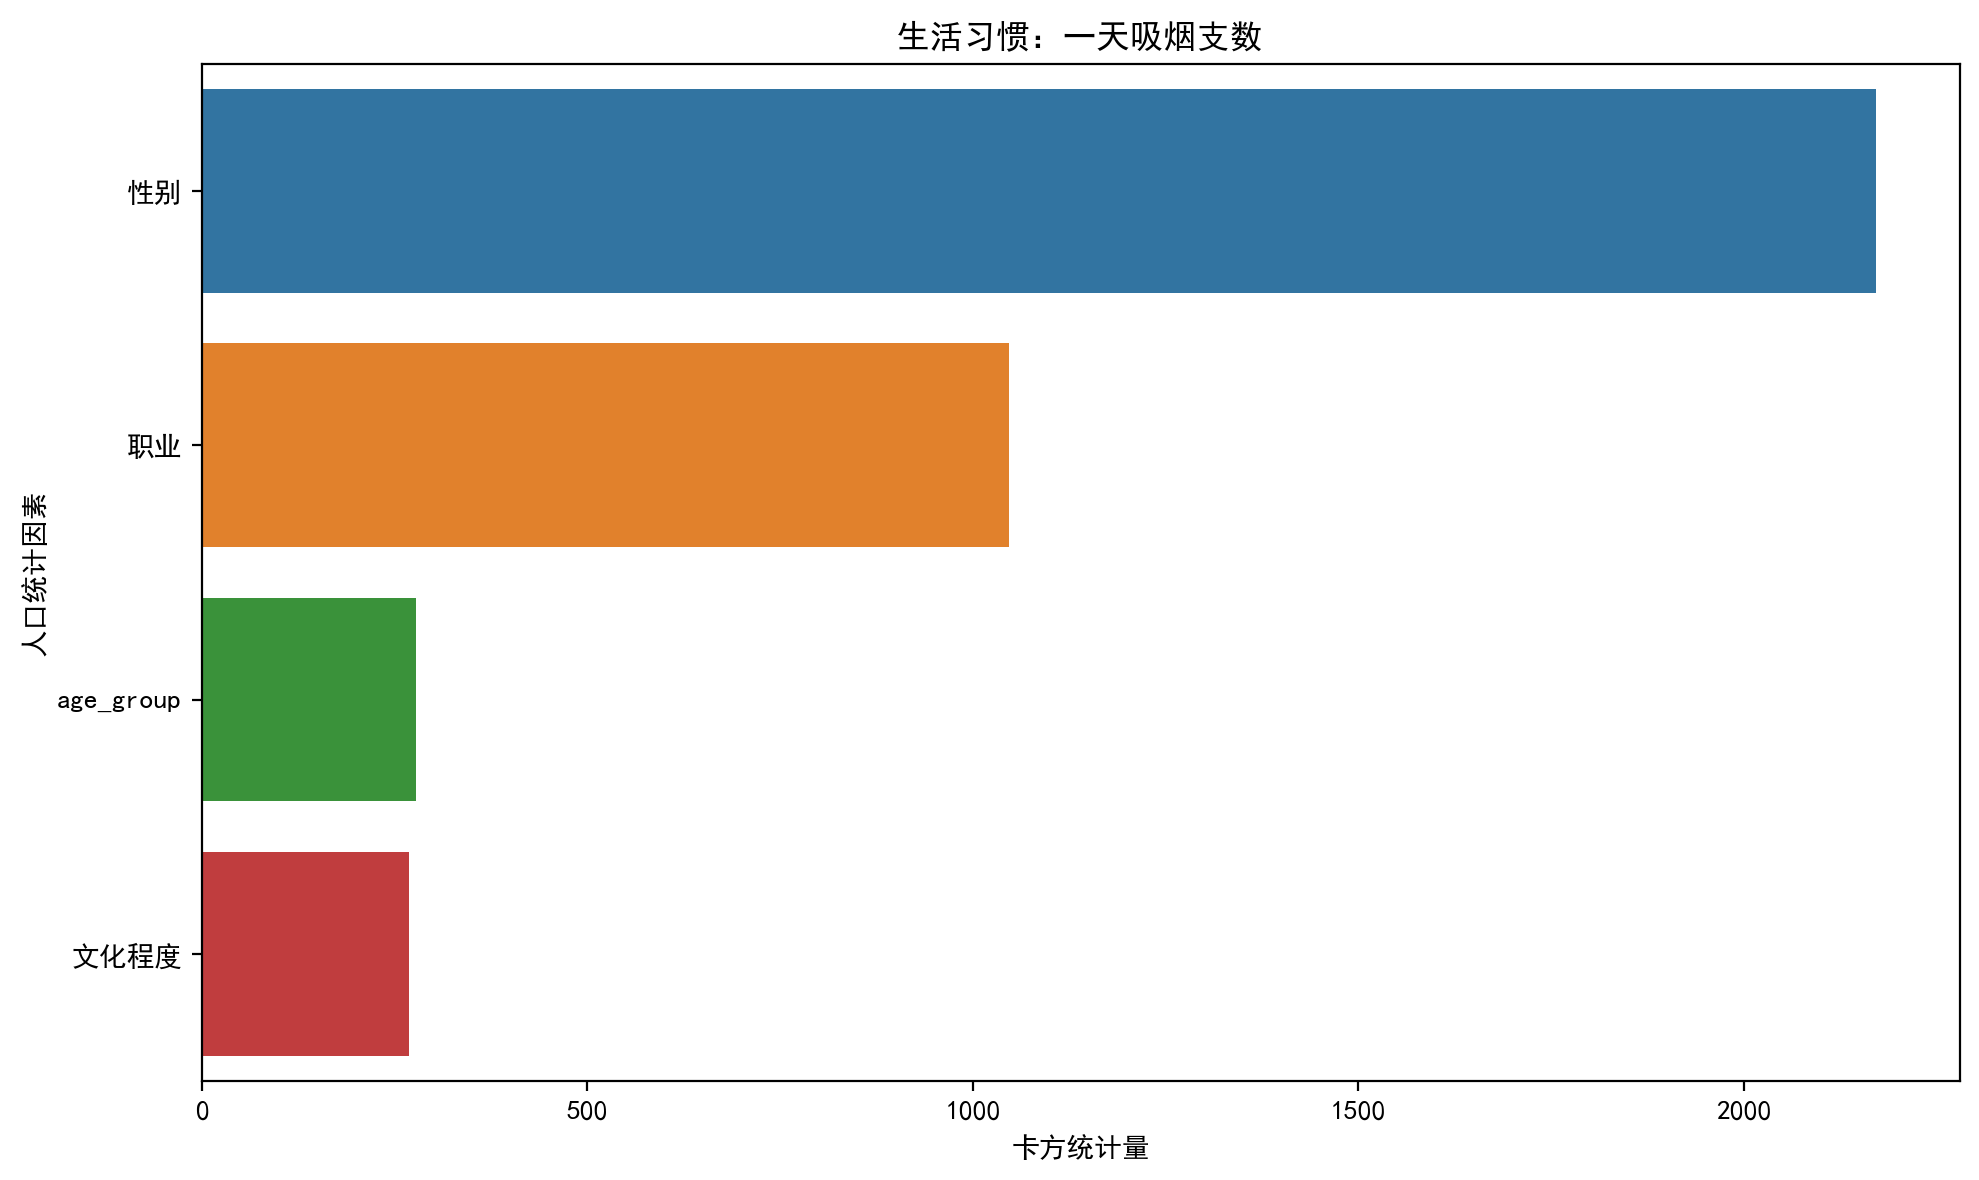

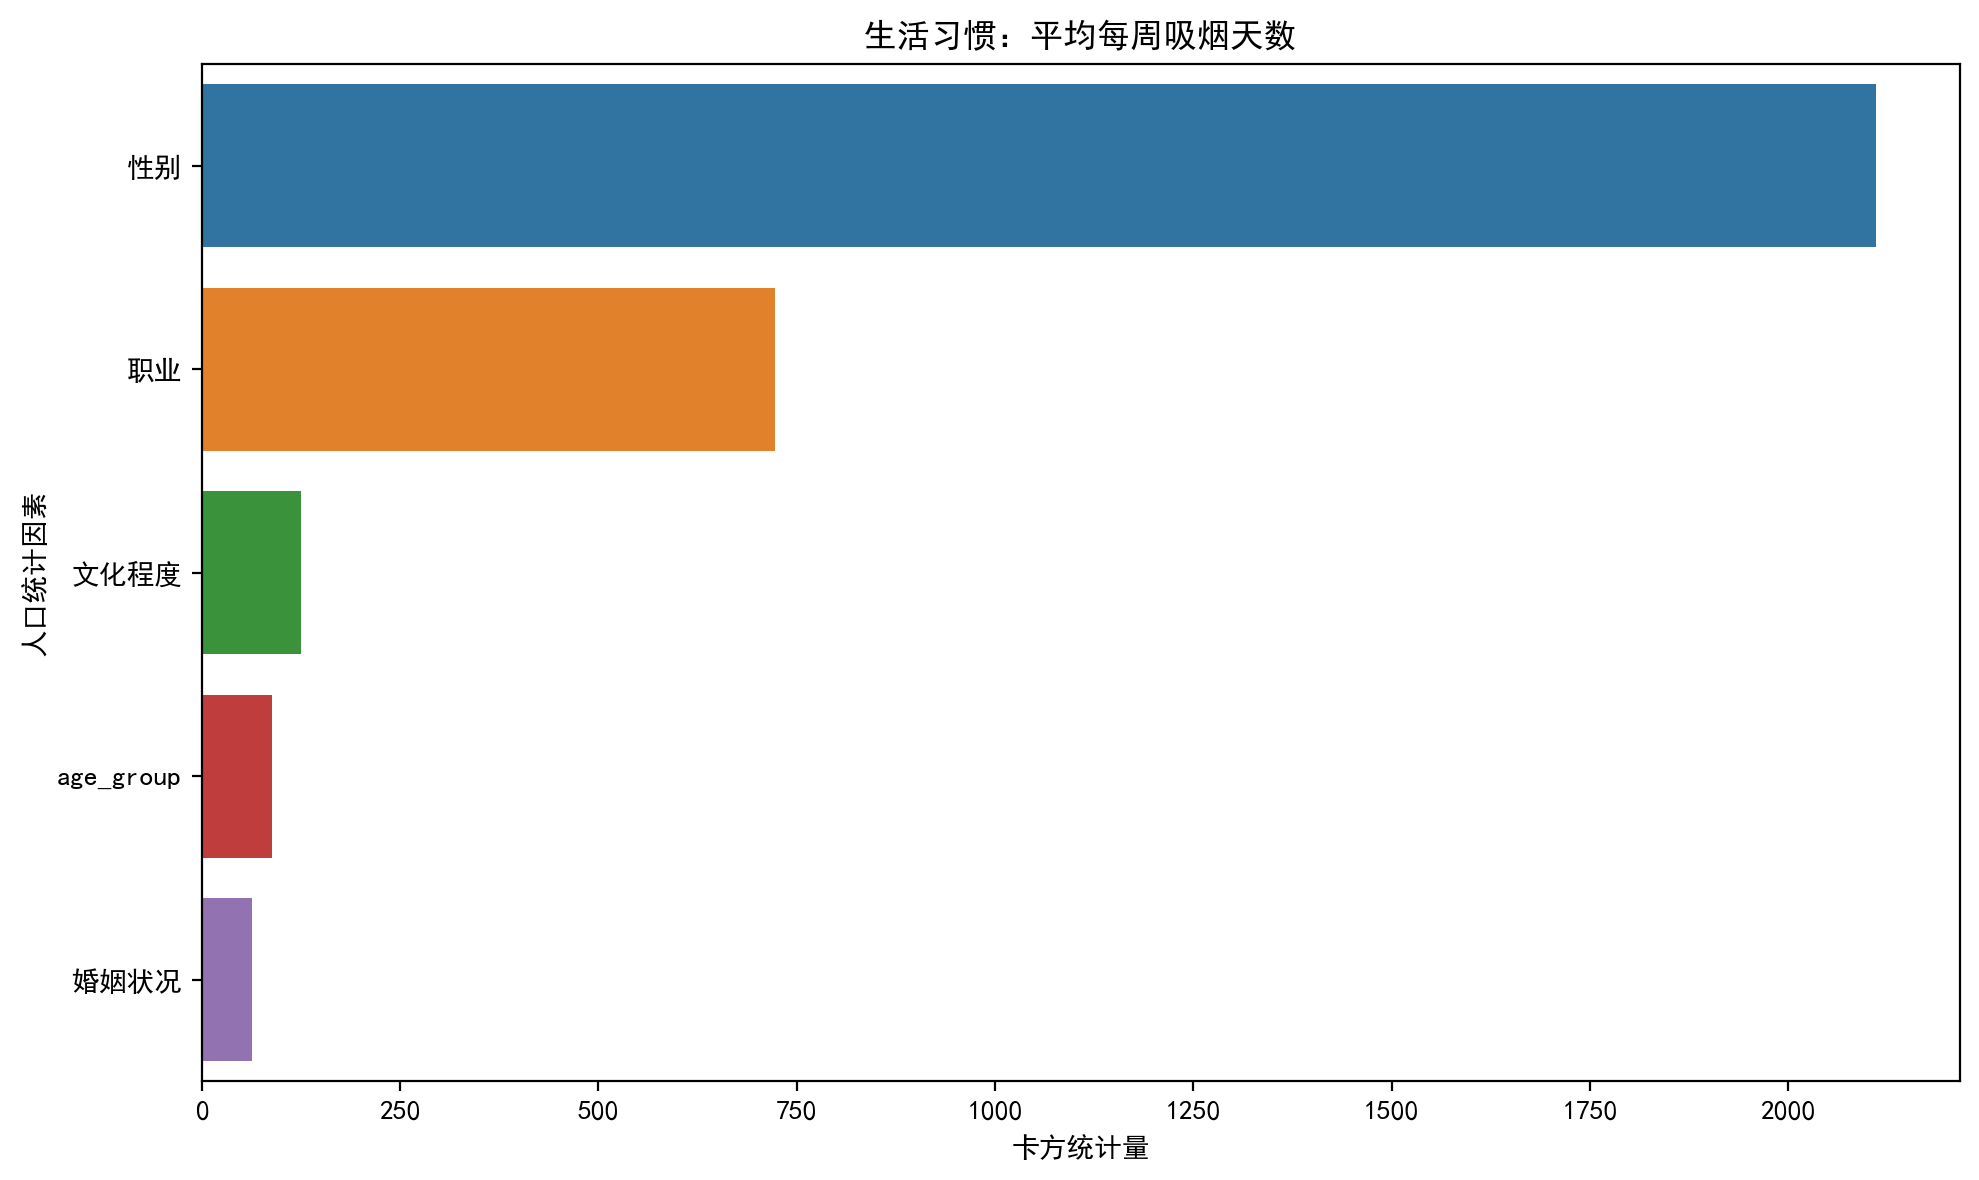

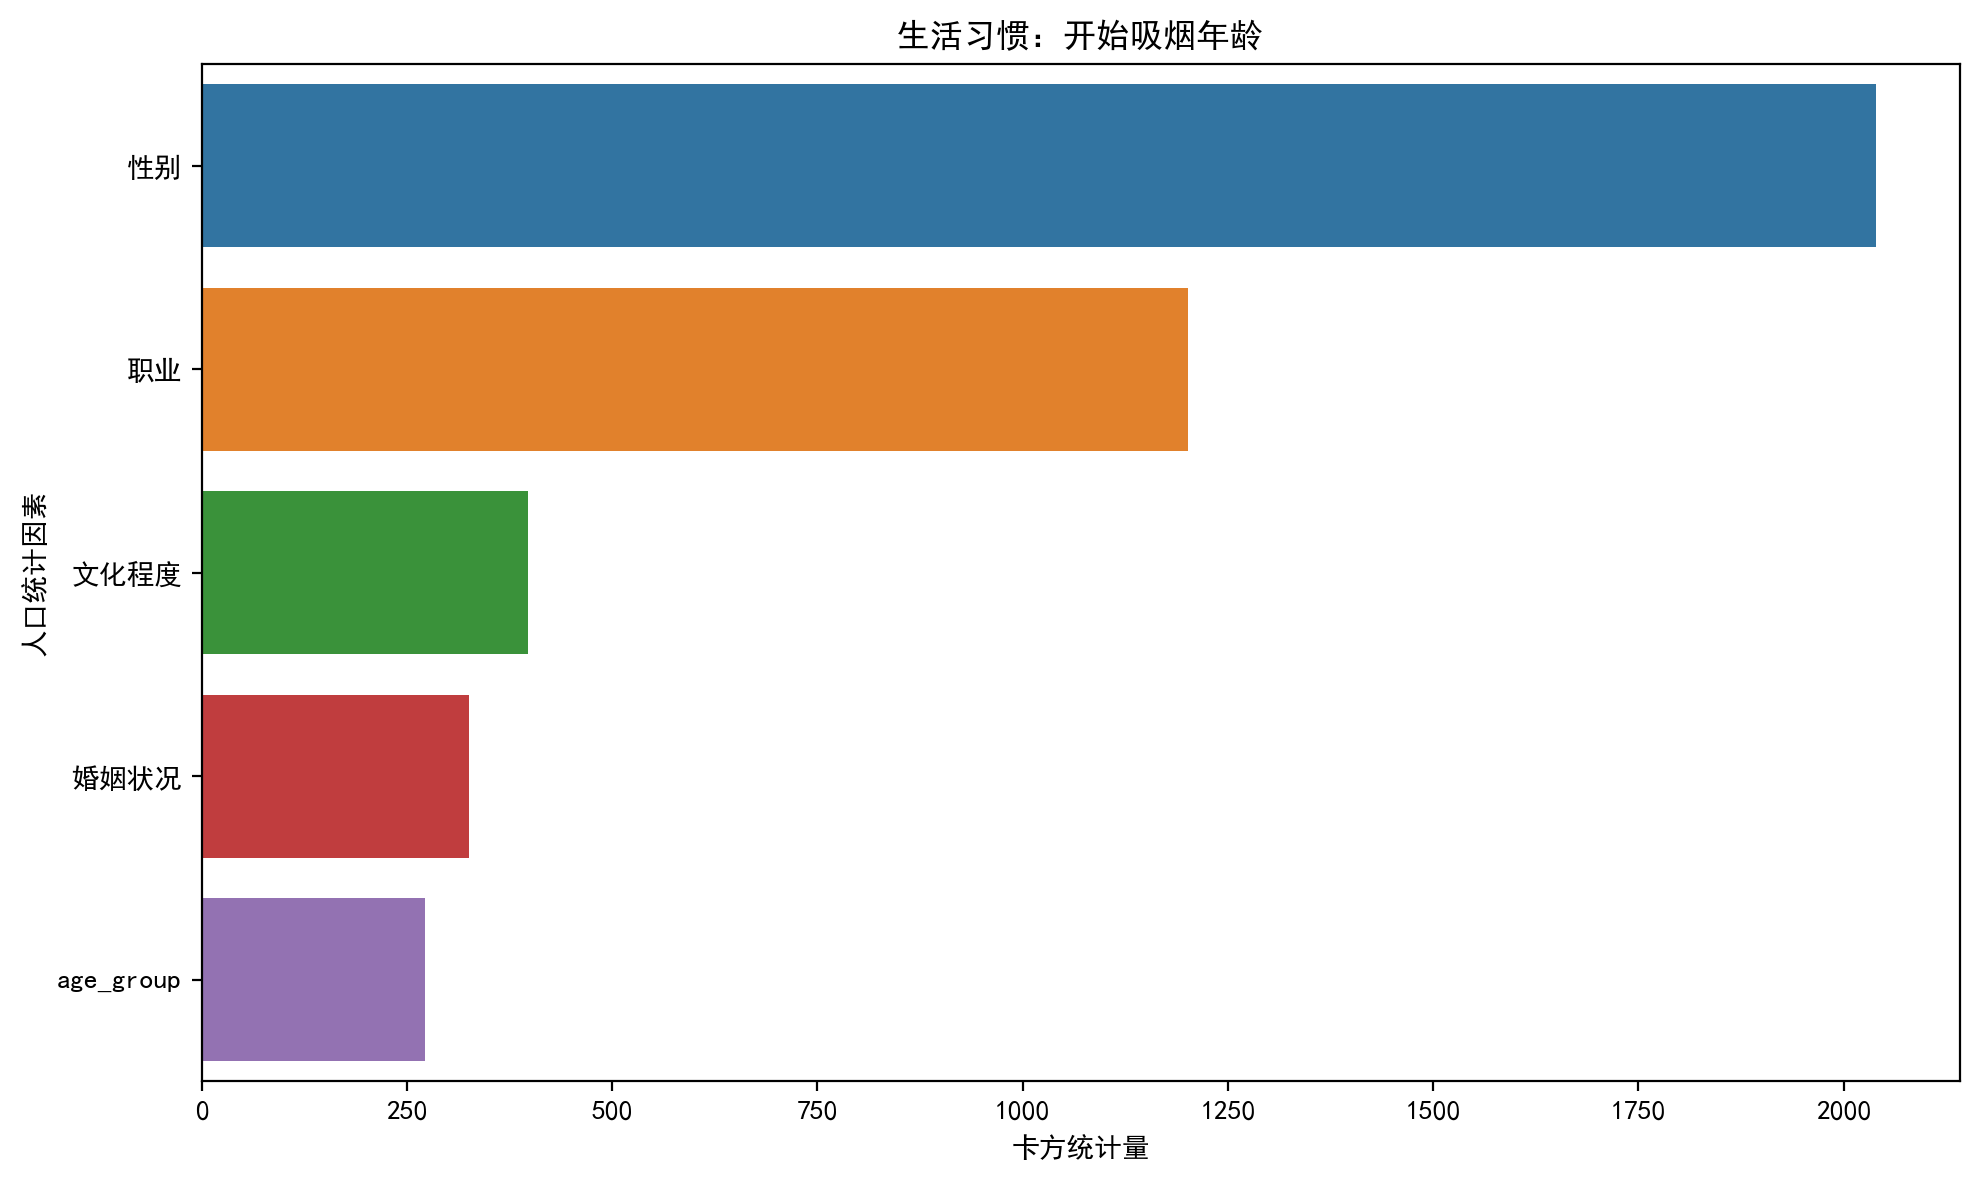

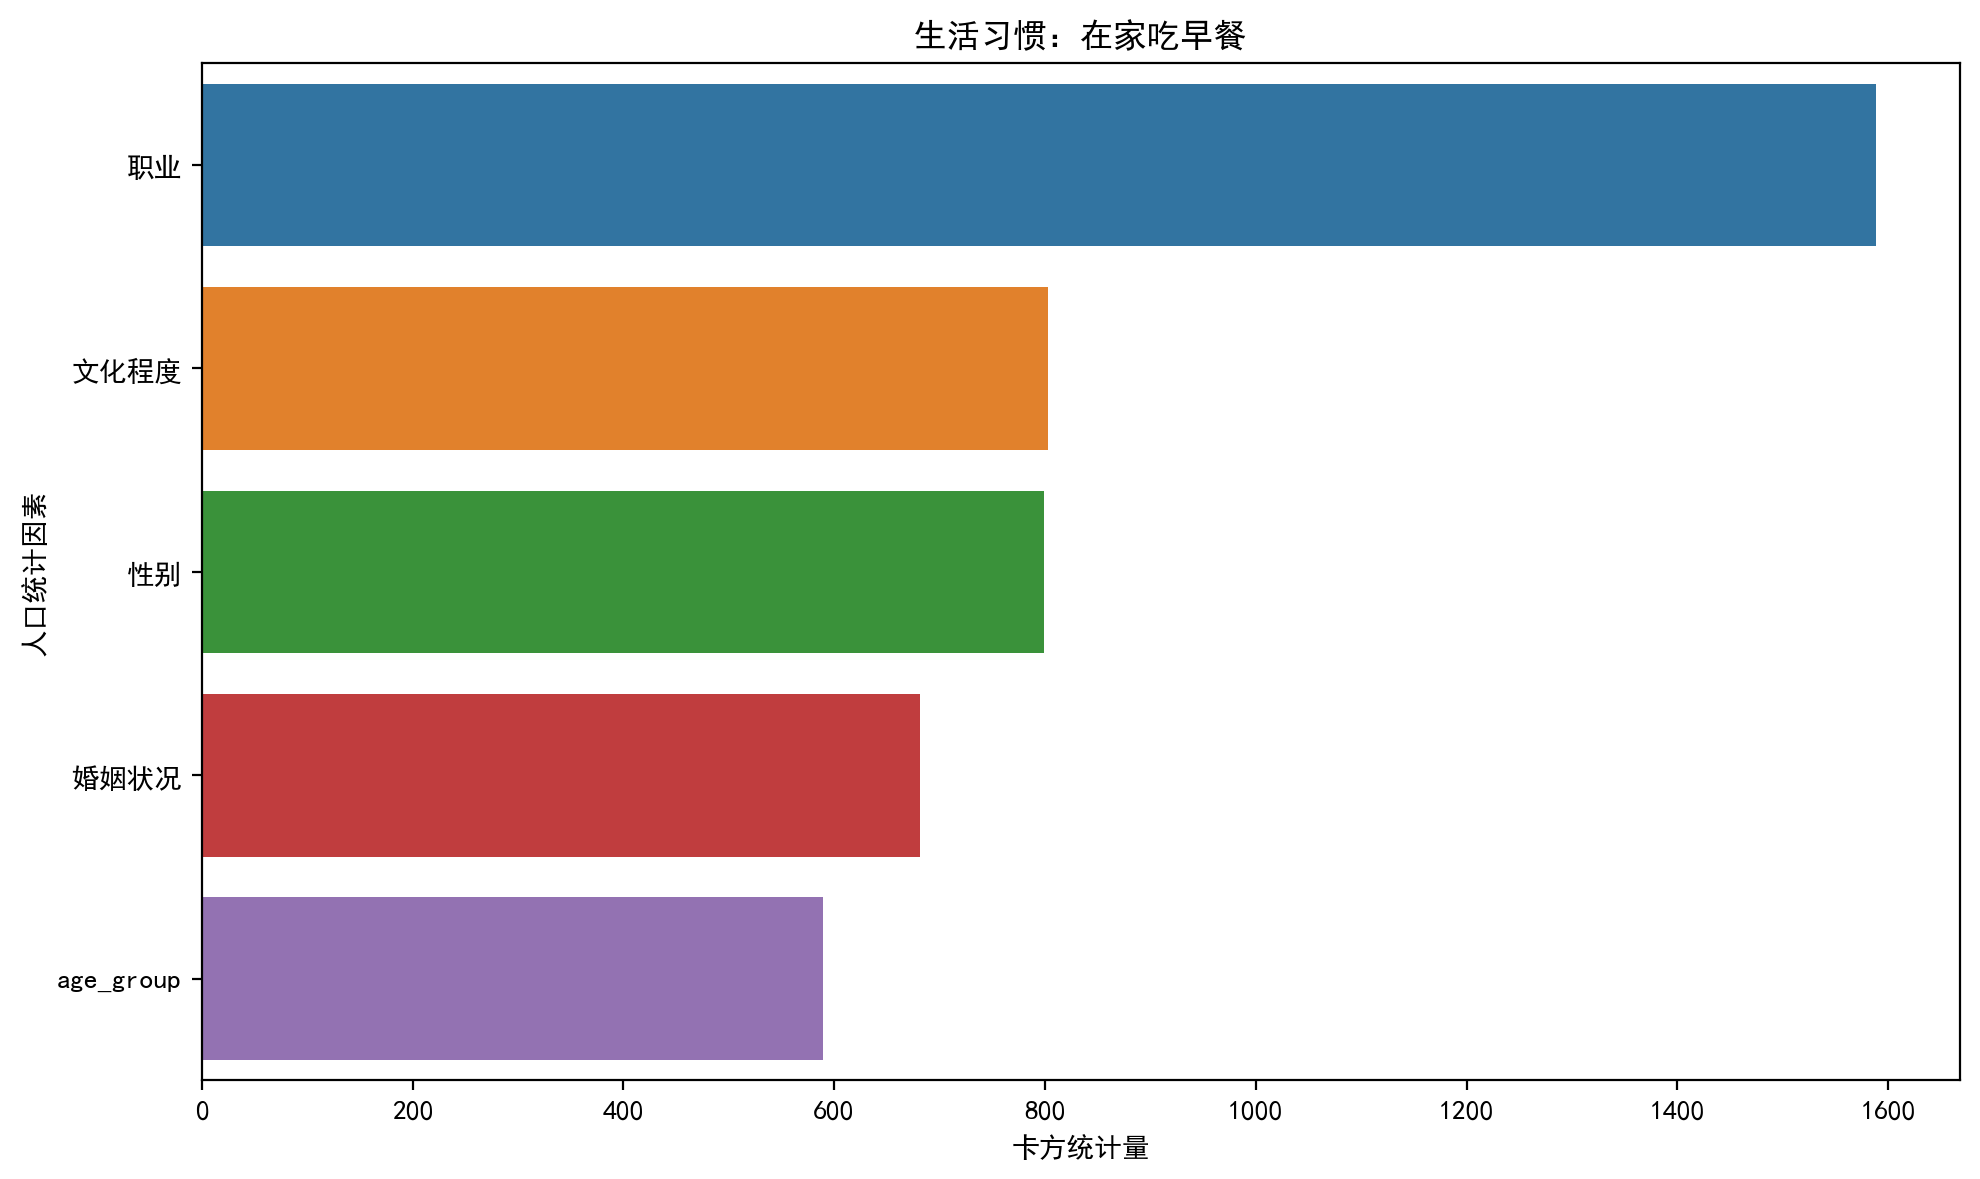

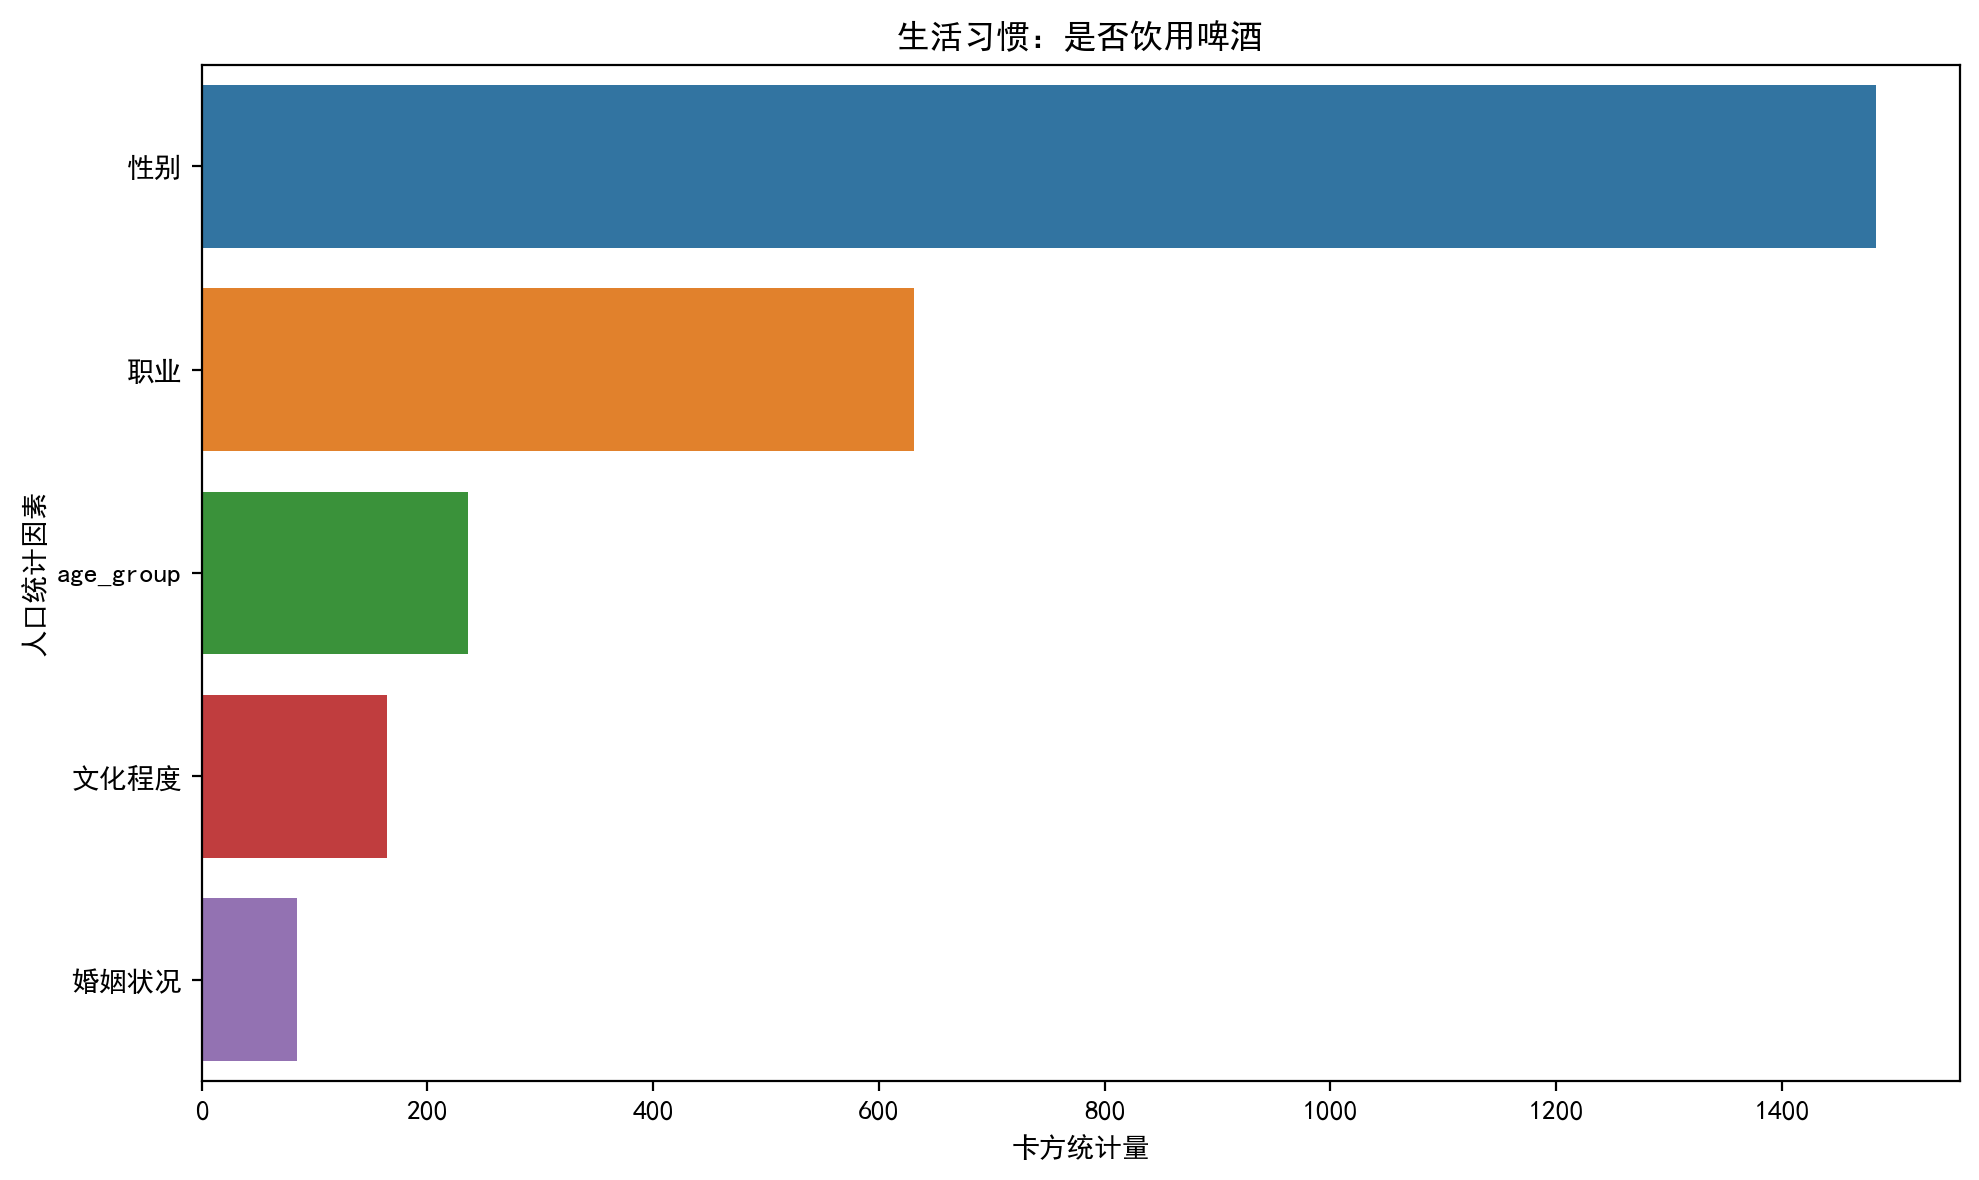

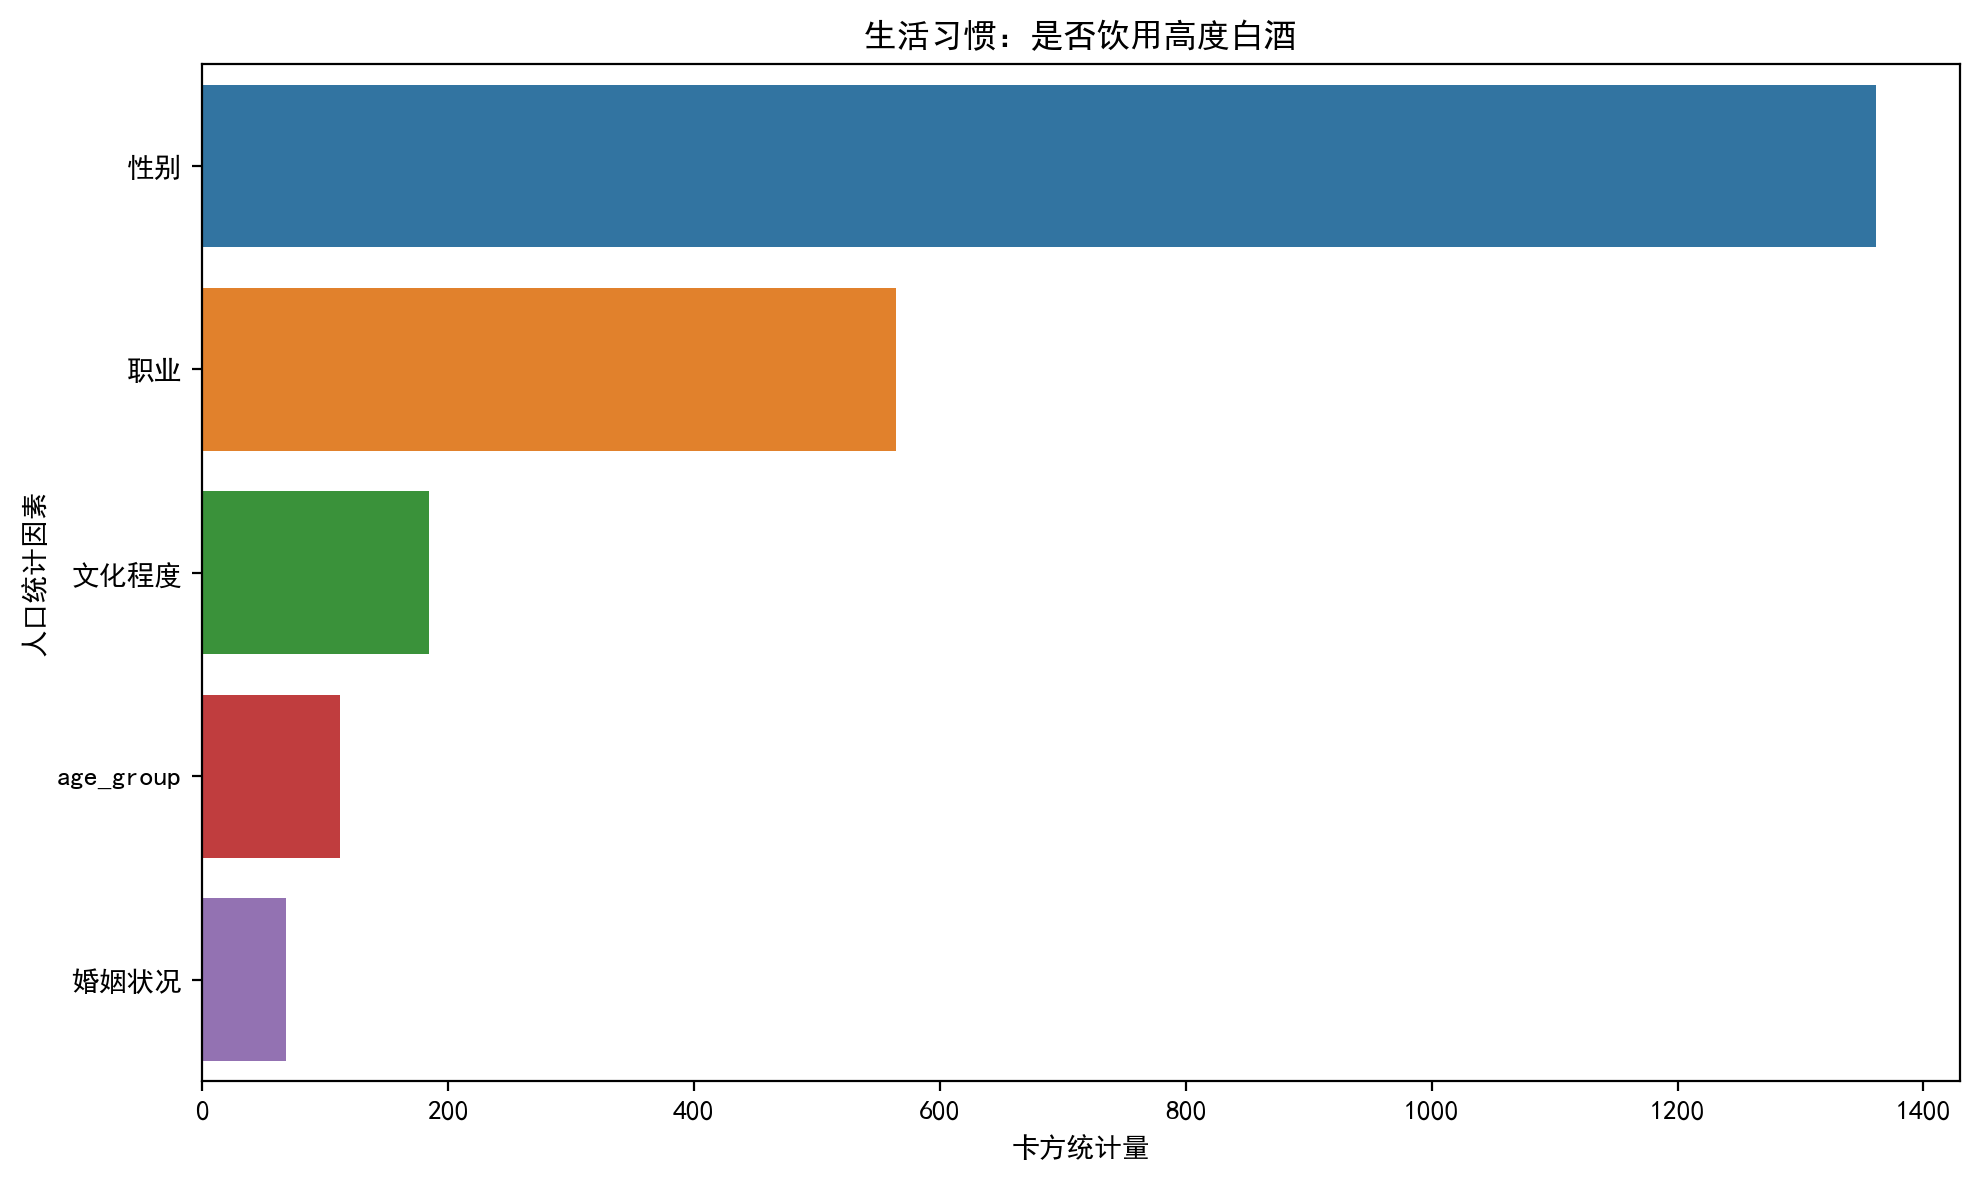

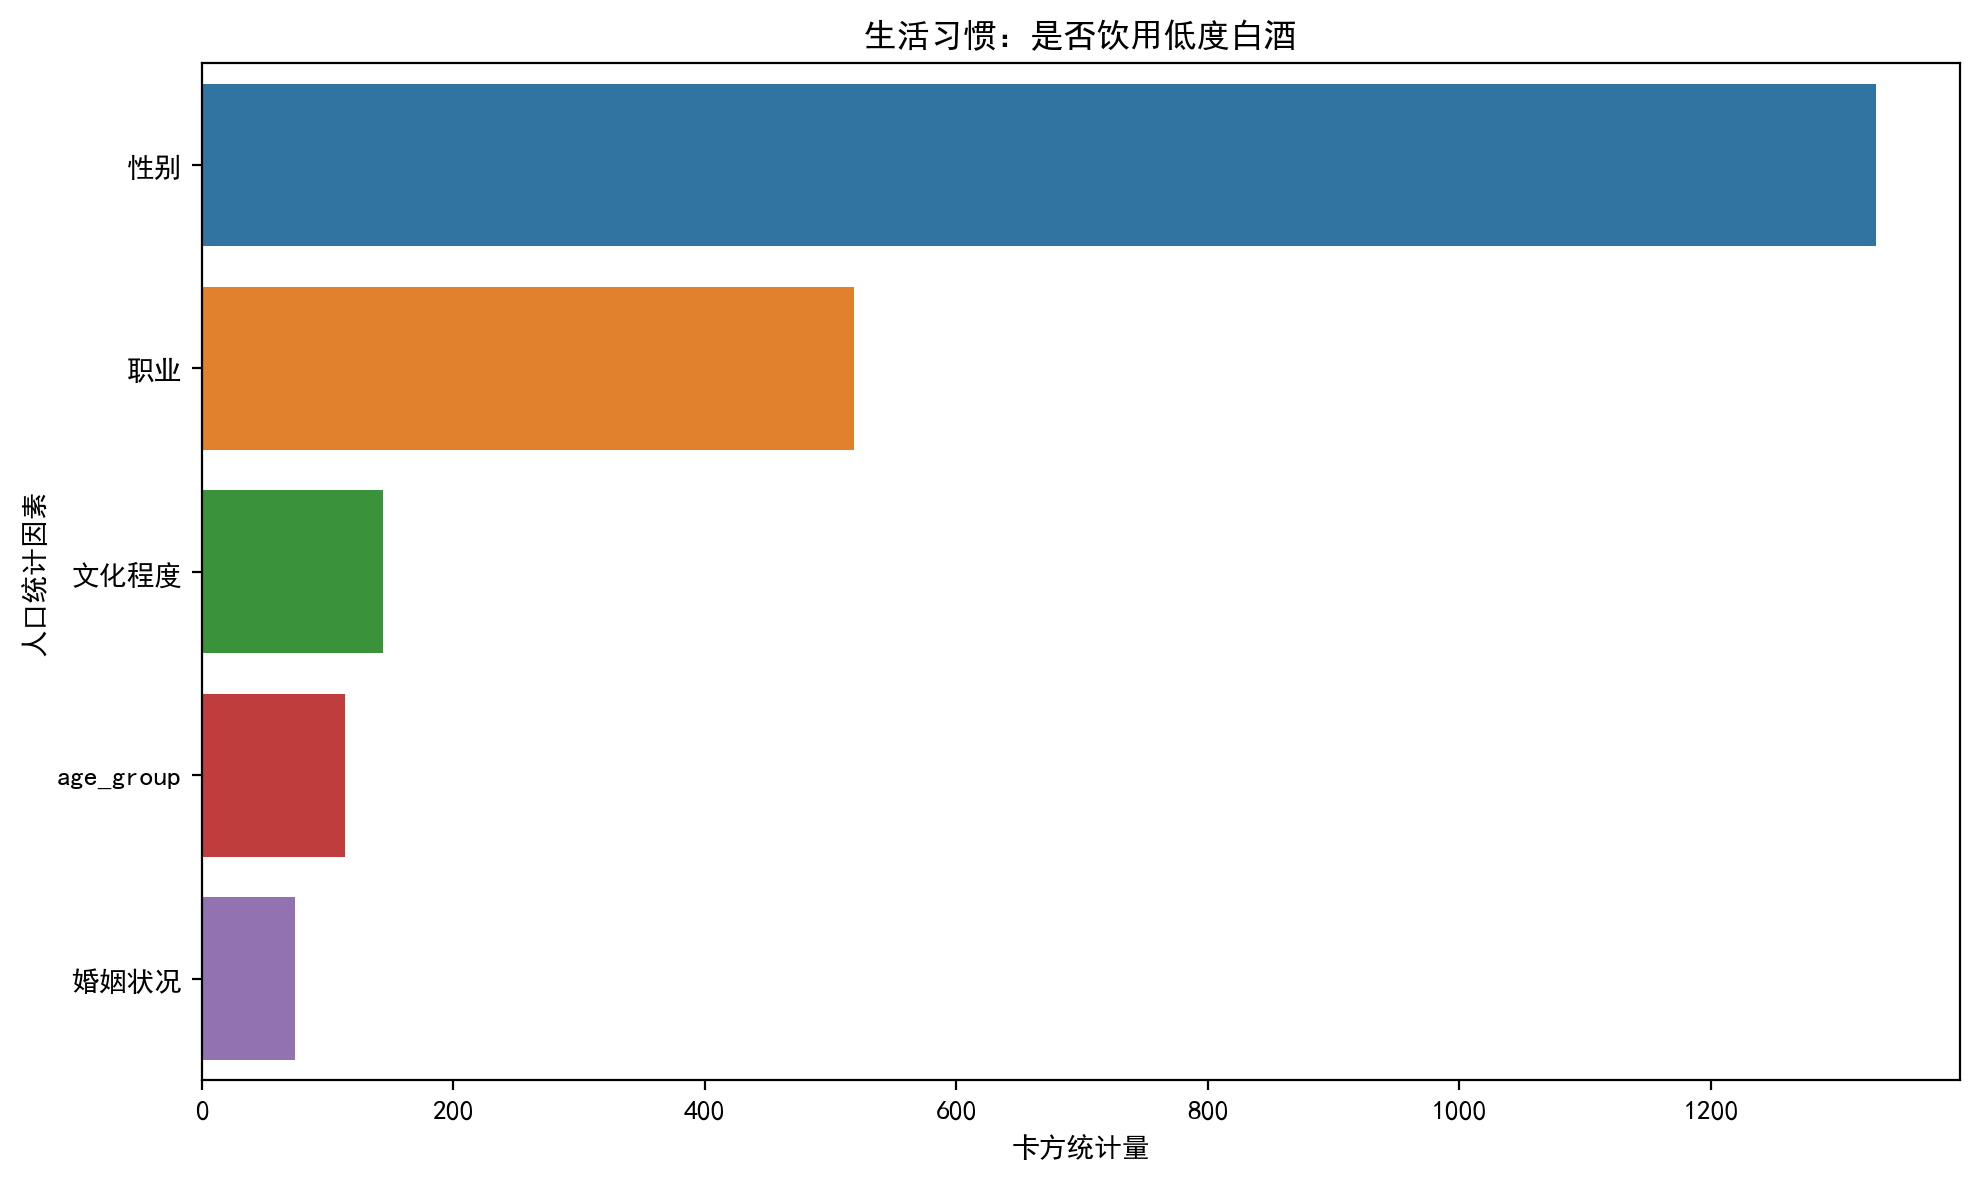

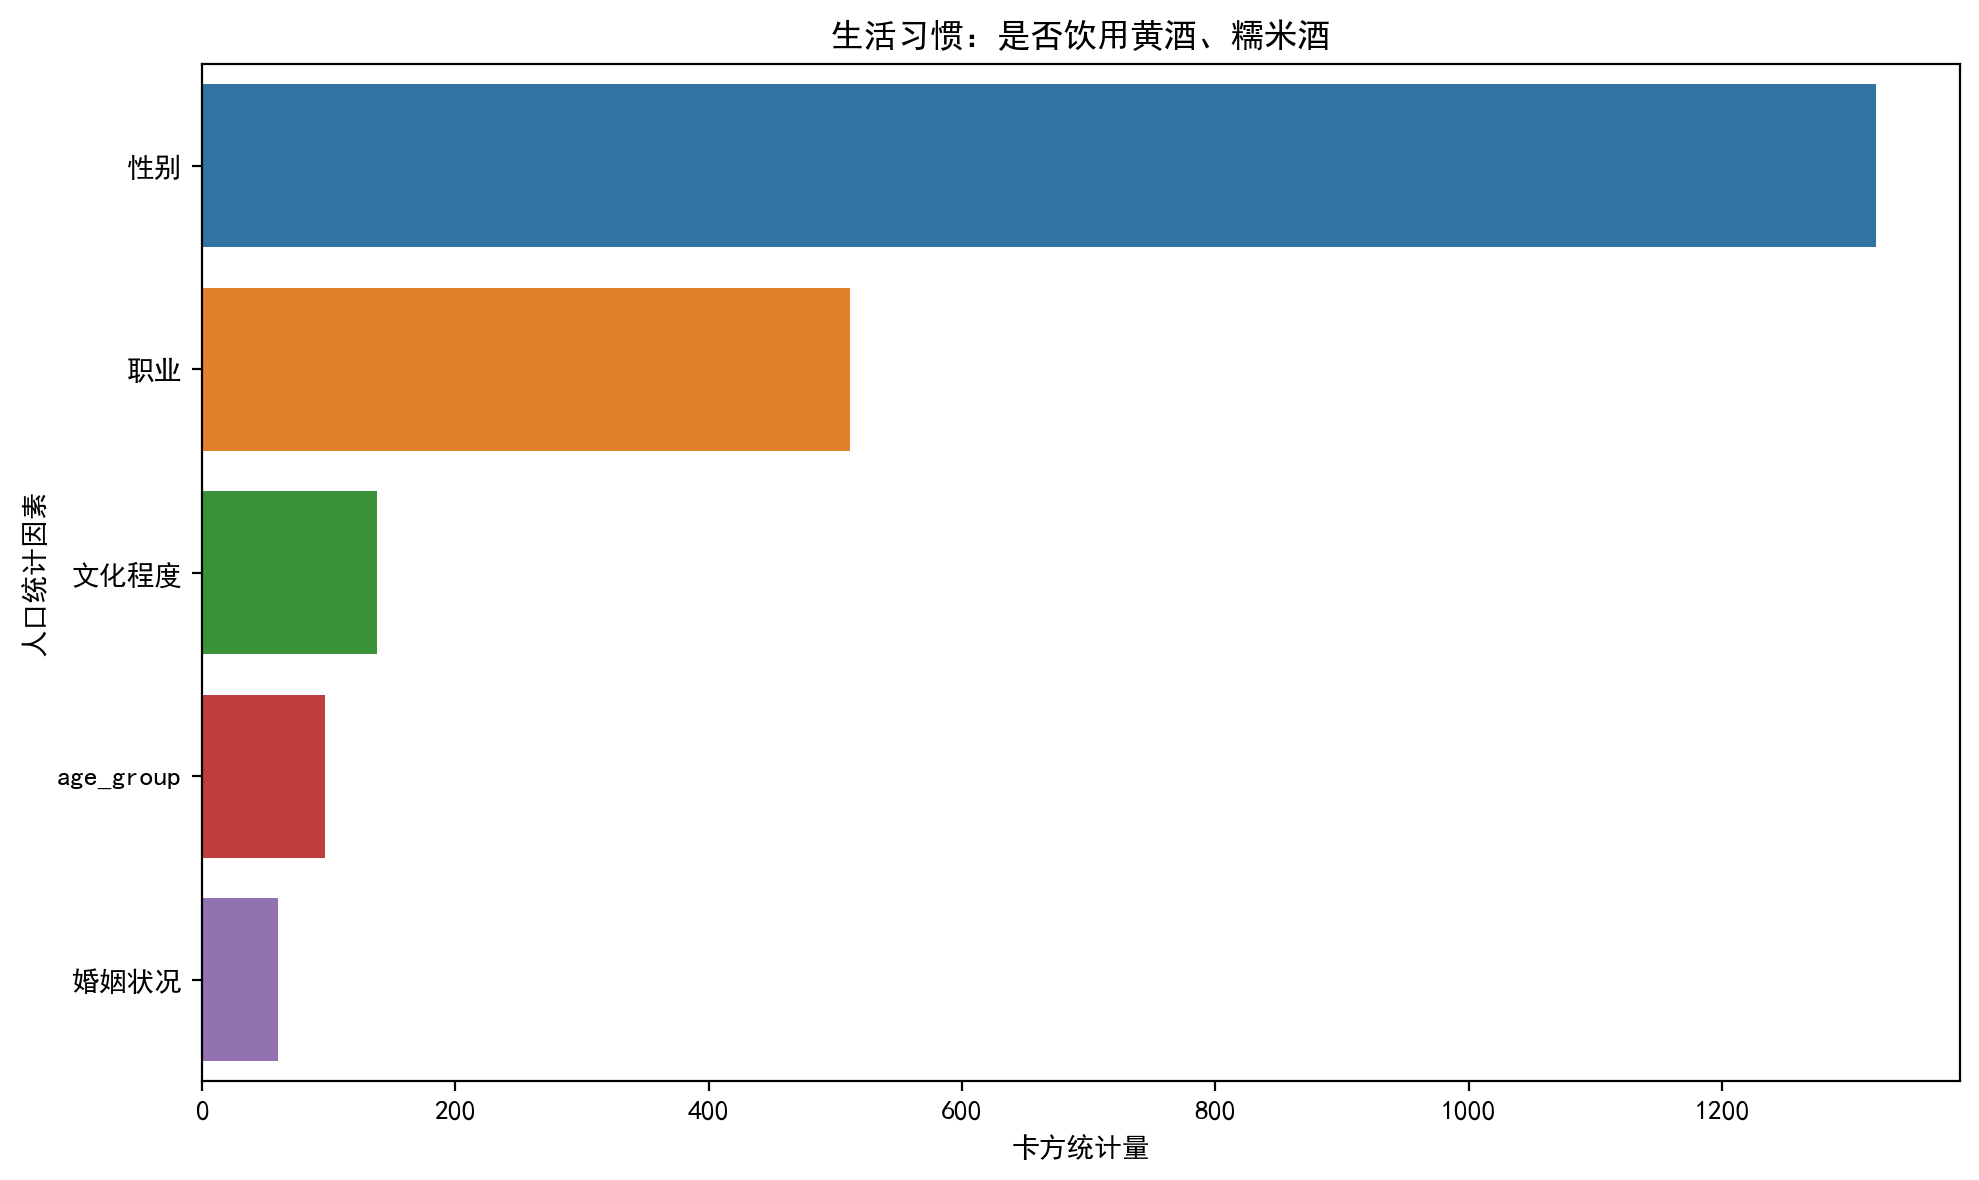

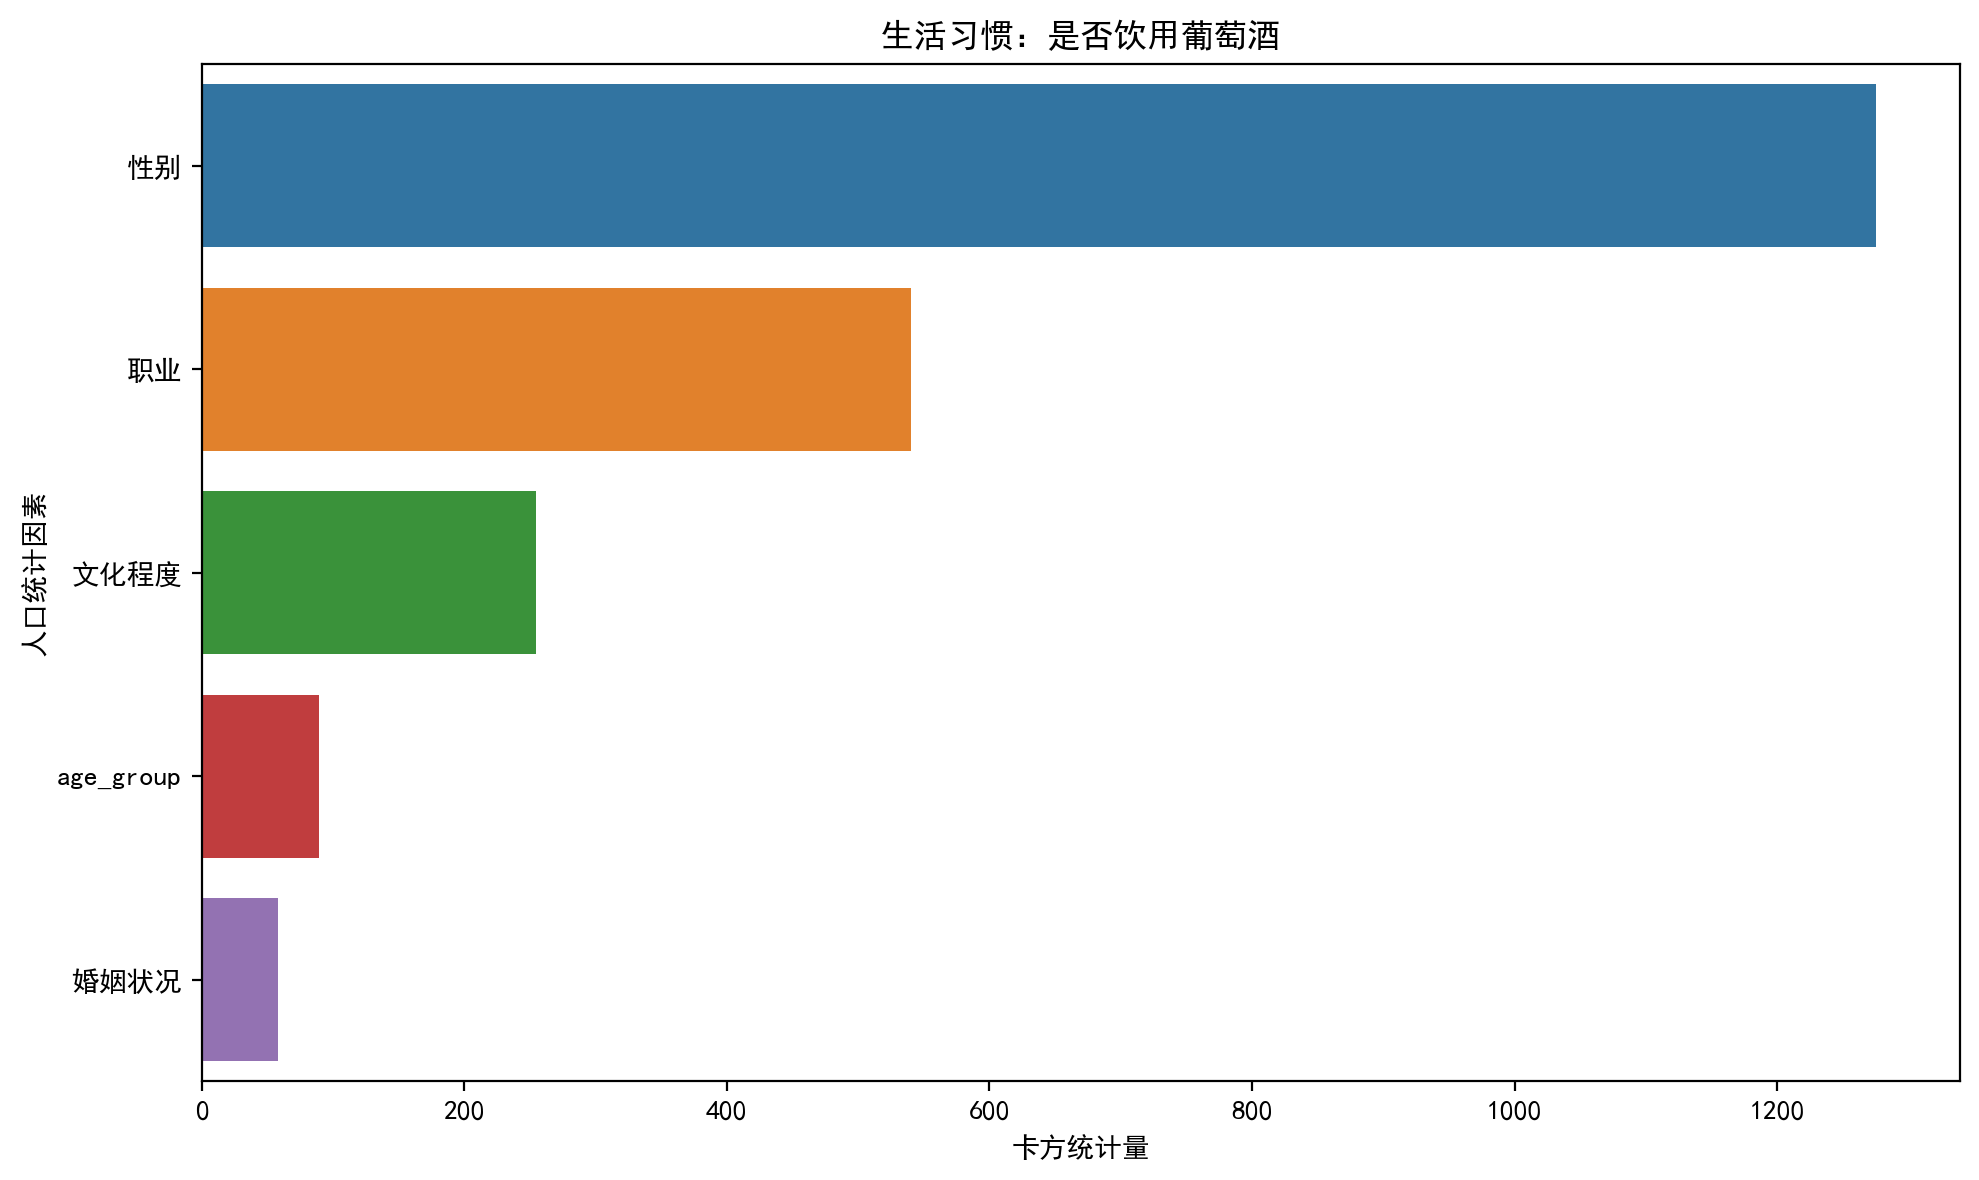

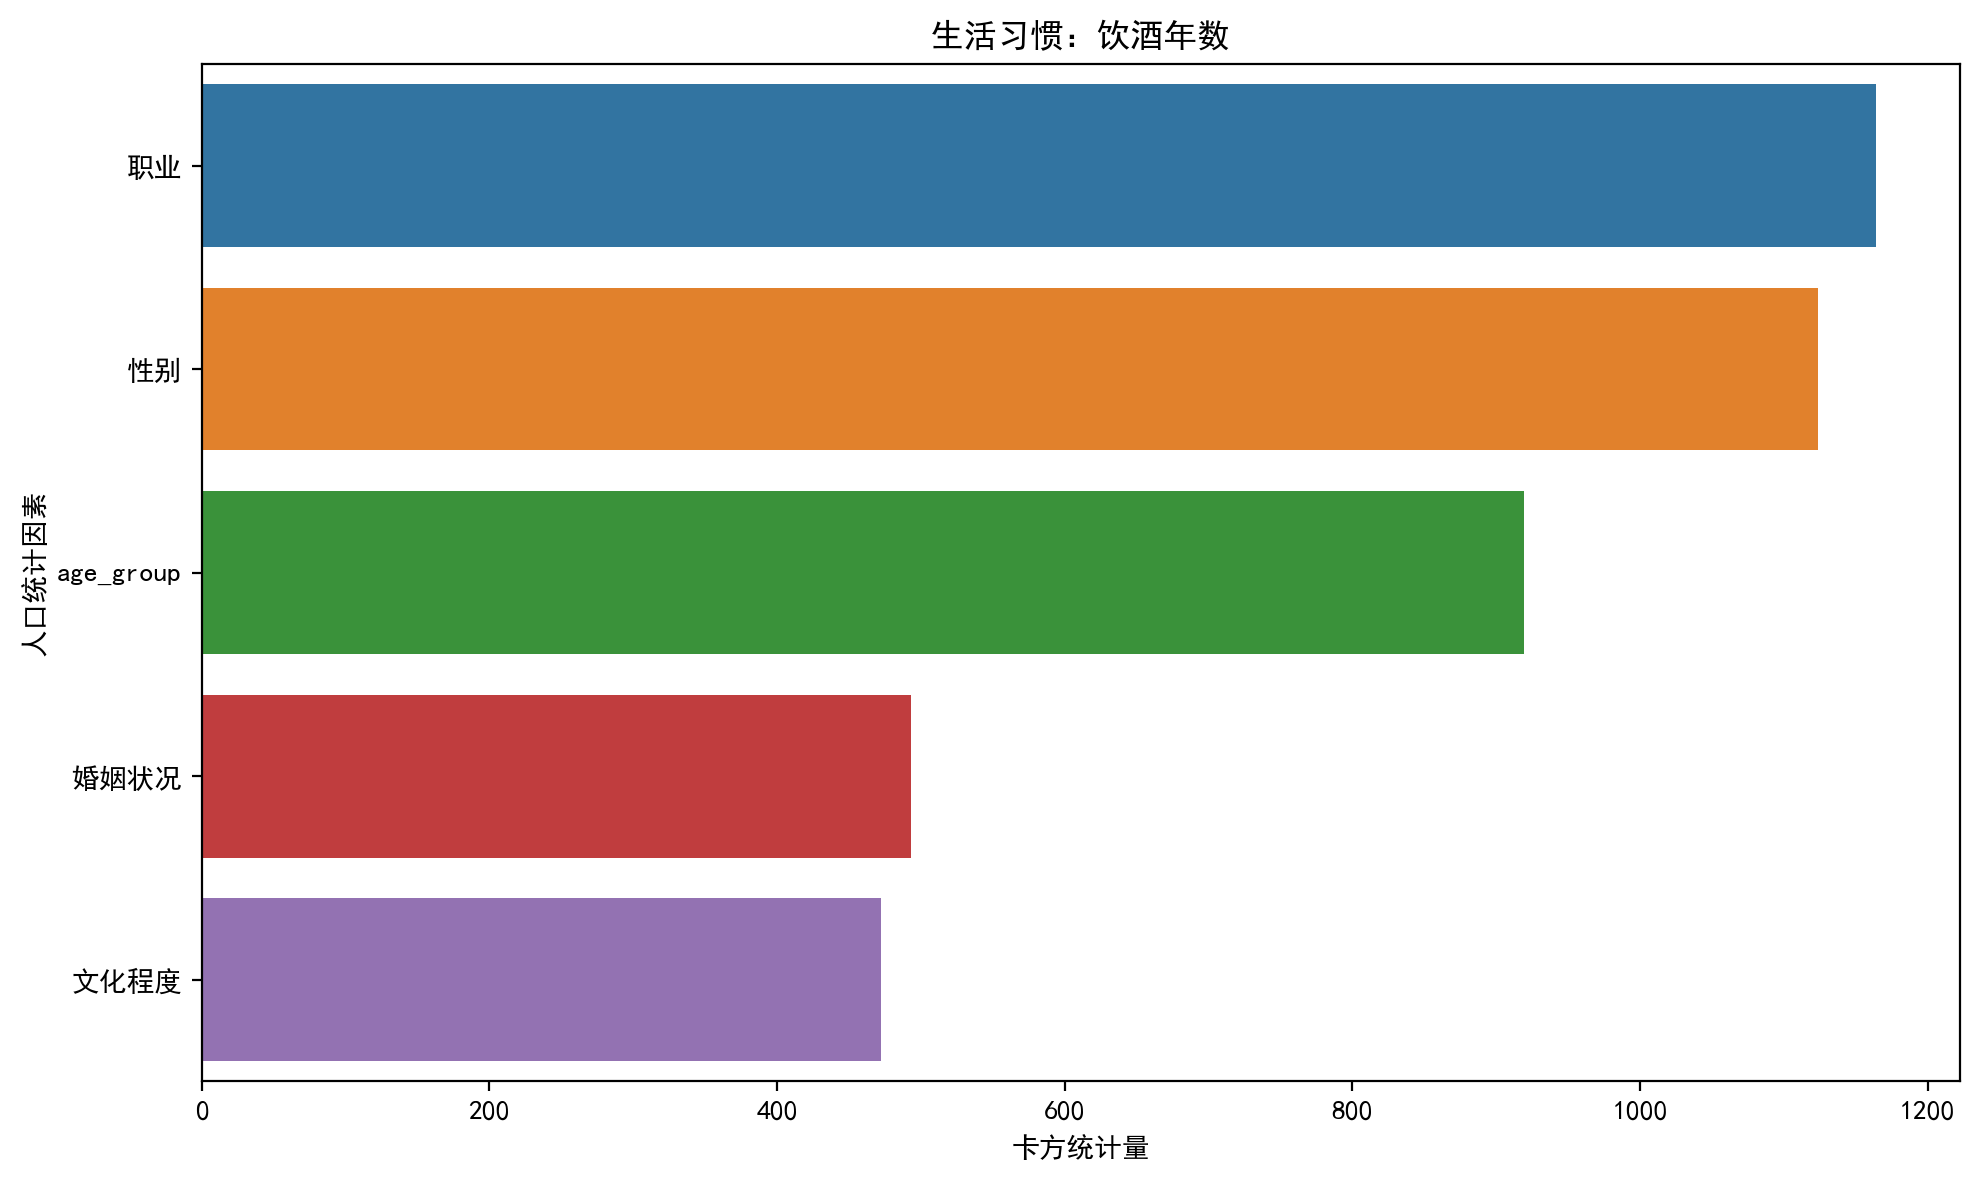

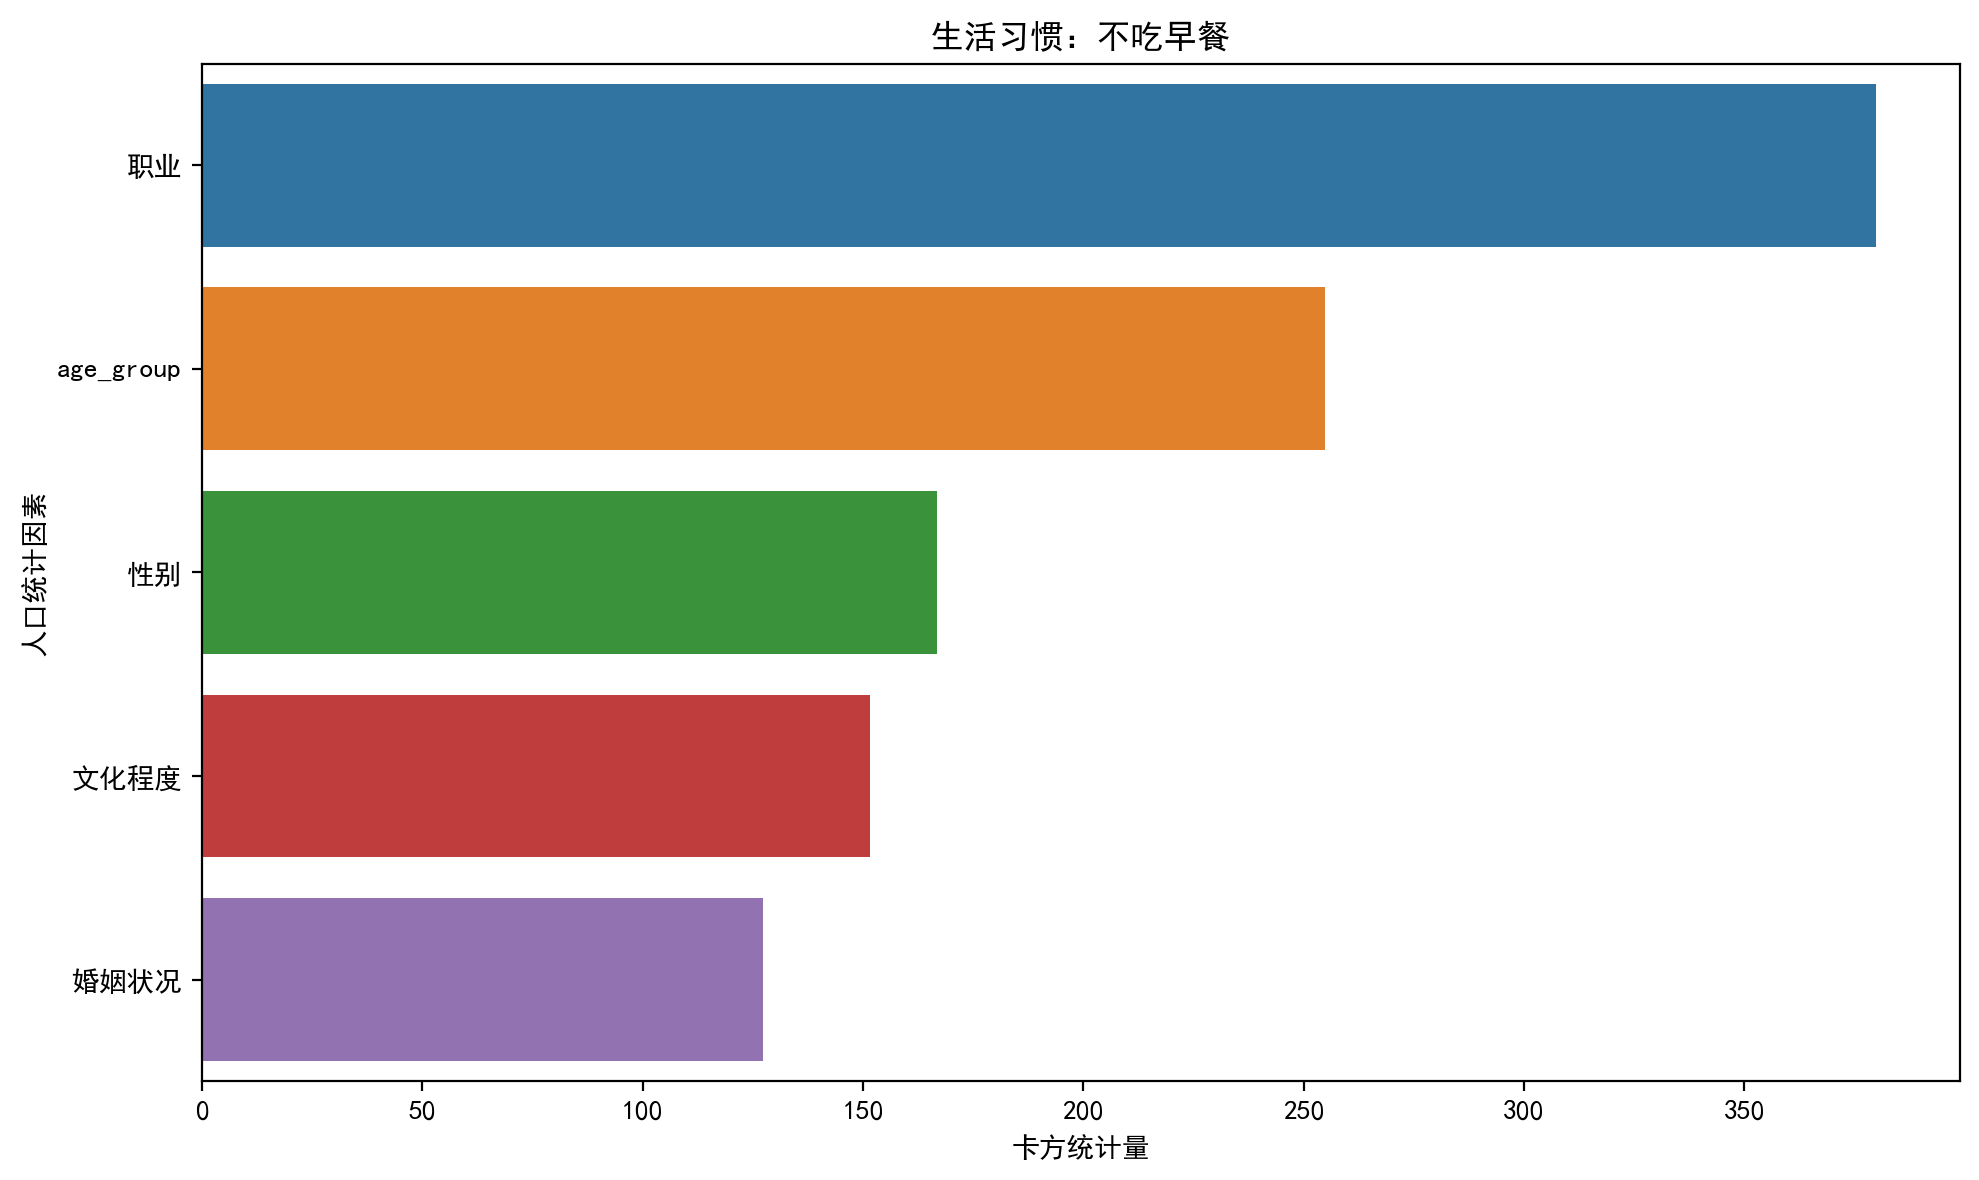

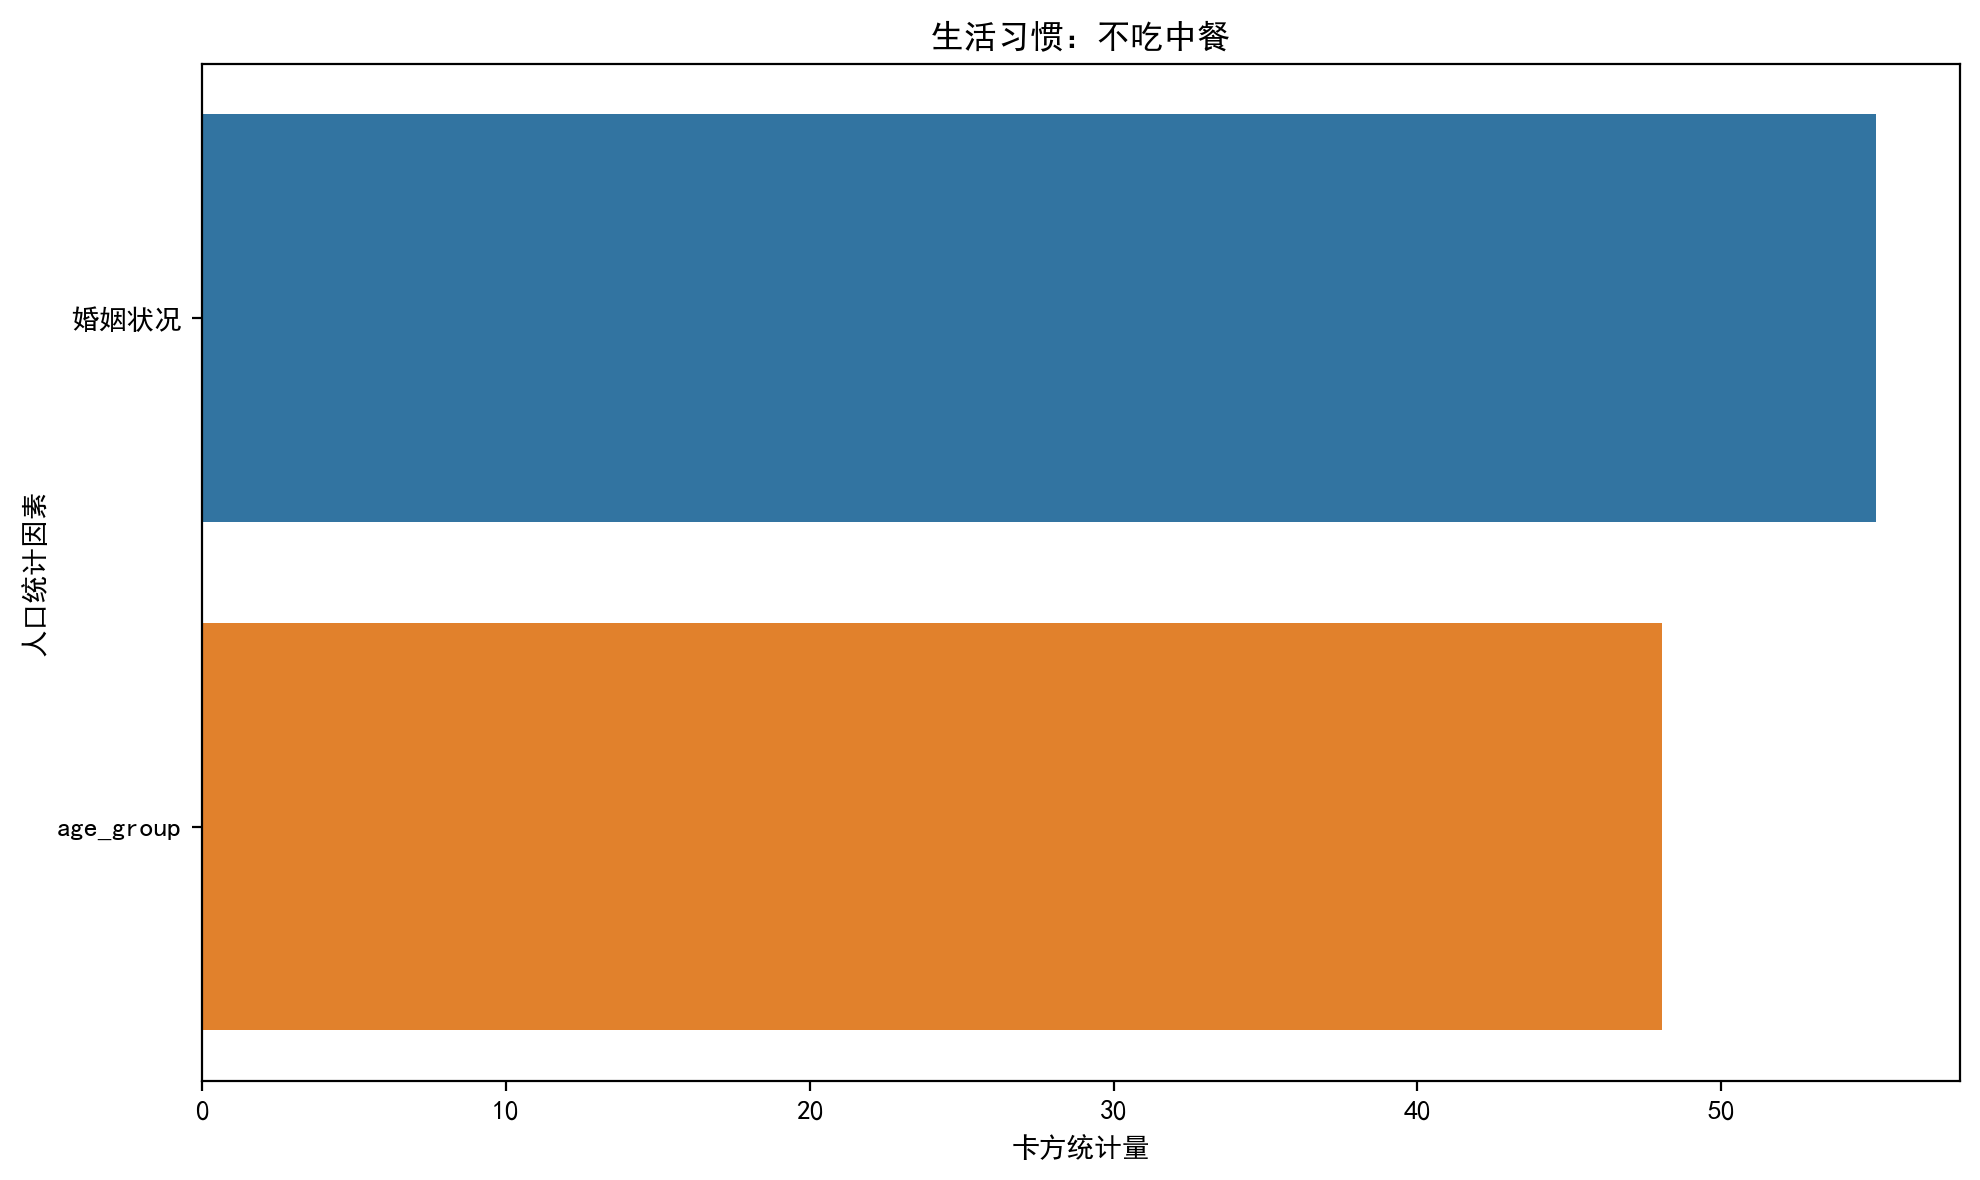

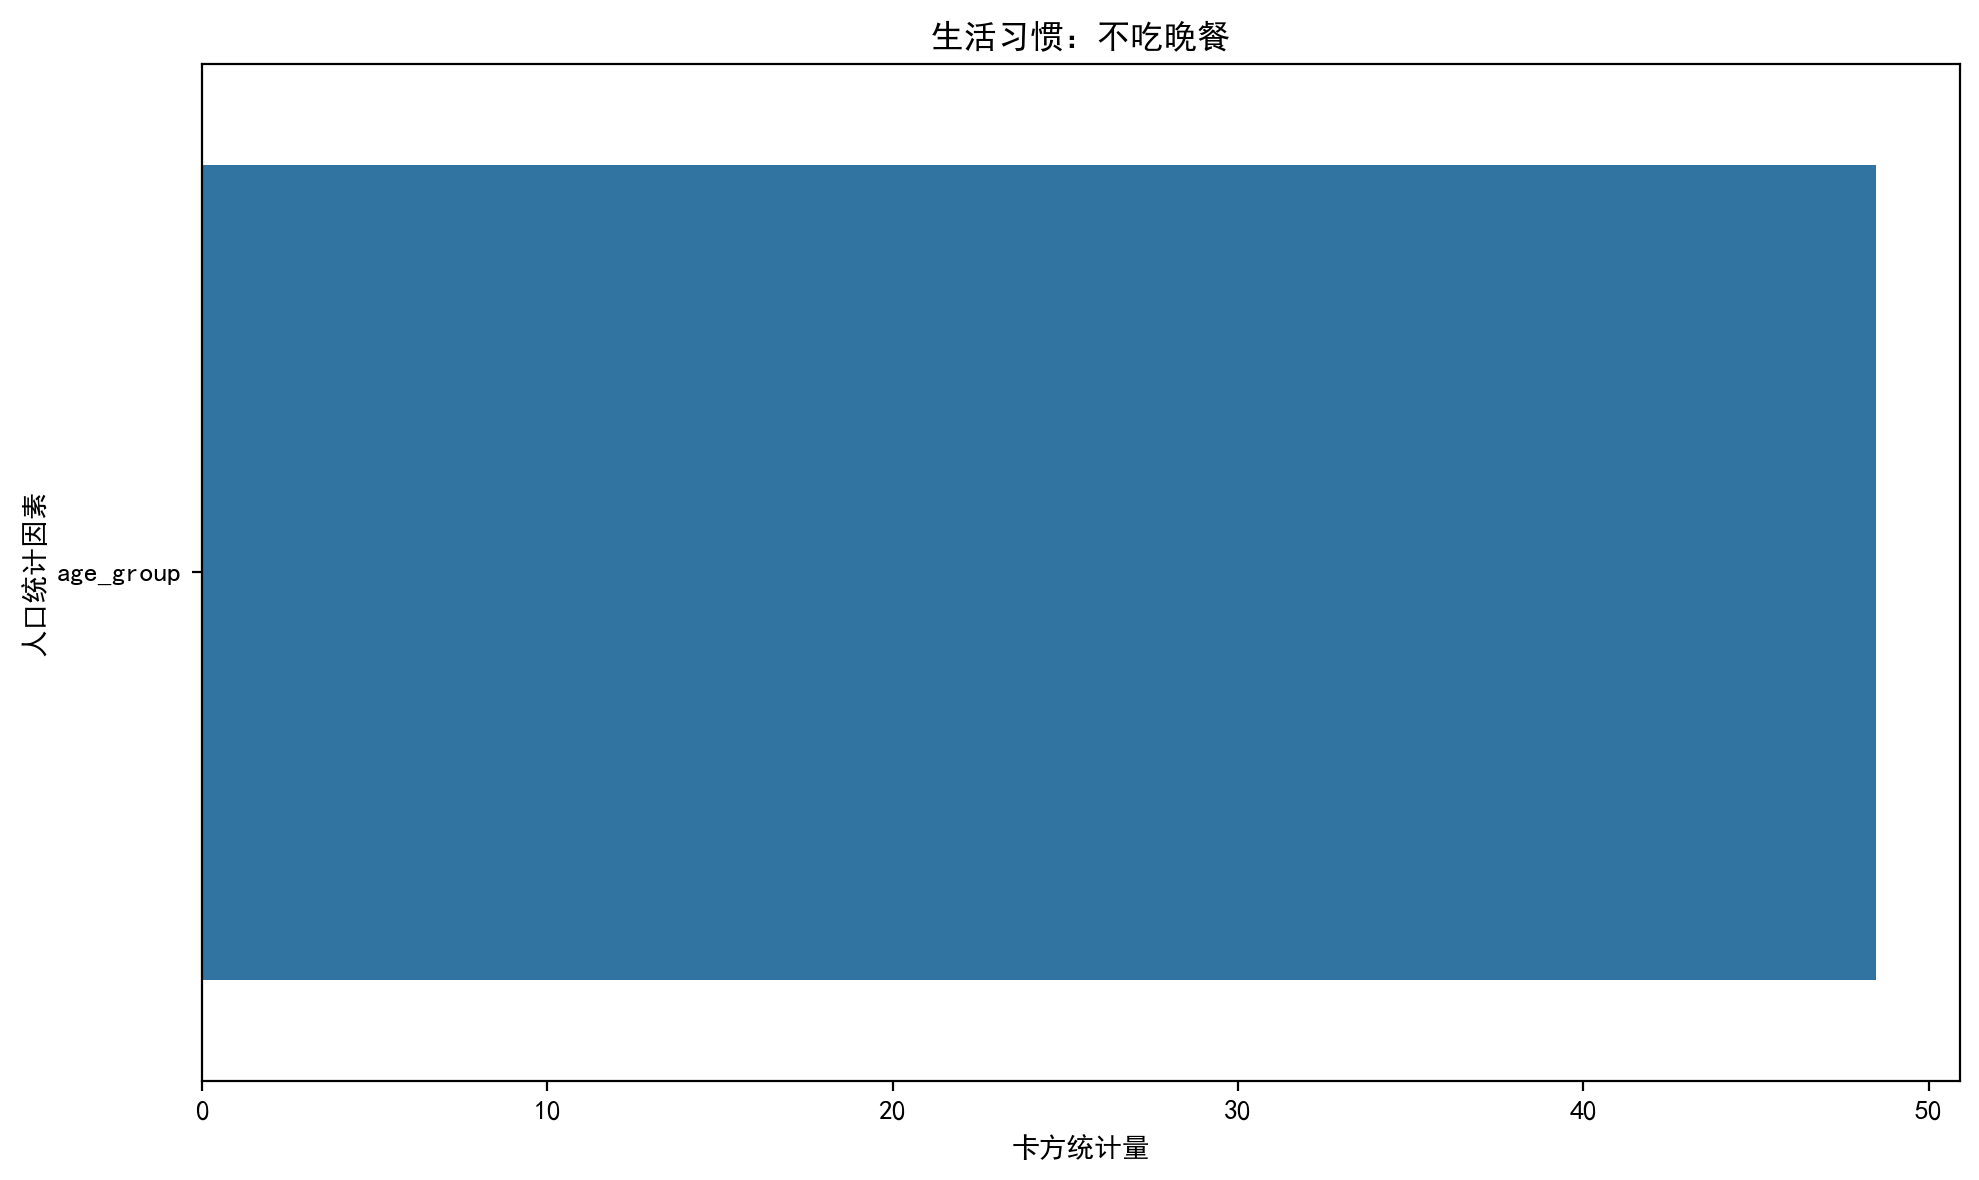

In [41]:
plt.figure(figsize=(10,6),dpi = 200)
for i,var in enumerate(subset_lifestyle["variable1"].unique(),start = 1):
    ##plt.subplot(n_subplots,1,i)
    data_to_plot = subset_lifestyle[subset_lifestyle["variable1"] == var]
    if data_to_plot.empty:
        pass
    else:
        plt.figure(figsize=(10,6),dpi = 200)
        sns.barplot(data = data_to_plot,x = "chi2",y ="variable2")  # 保存图片 注意 在show()之前  不然show会重新创建新的 图片
        plt.xlabel("卡方统计量")
        plt.ylabel("人口统计因素")
        plt.title(f"生活习惯：{var}")
        plt.tight_layout()
        plt.show()